<a href="https://colab.research.google.com/github/Amir-h055/Image-Procccessing/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 5.4 MB/s 


In [ ]:
#Connecting to GitHub
import os
import glob
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2

%tensorflow_version 2.x 
# TensorFlow and tf.keras
import tensorflow as tf
import seaborn as sns
from fastai.vision import *
from numpy.ma.core import size
from fastai.vision.data import ImageDataBunch
from fastai.vision.transform import get_transforms
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

import keras_tuner as kt
from keras_tuner import RandomSearch

from kerastuner.engine.hyperparameters import HyperParameters
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ='/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data'
train_directory = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train'
test_directory = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/test'

In [ ]:
SIZE = 140
BATCH_SIZE = 64
TARGET_SIZE = (SIZE,SIZE)
EPOCH_NUM = 10

In [ ]:
categories_dict = {
  0: "COVID19",
  1: "NORMAL",
  2: "PNEUMONIA",
  
}

In [ ]:
image_gen = keras.preprocessing.image.ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True
                               )
test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train = image_gen.flow_from_directory(train_directory)

Found 5144 images belonging to 3 classes.


In [ ]:
train.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

[Text(0, 0.5, 'Number of Images'),
 Text(0.5, 0, 'Class'),
 Text(0.5, 1.0, 'Inital Dataset')]

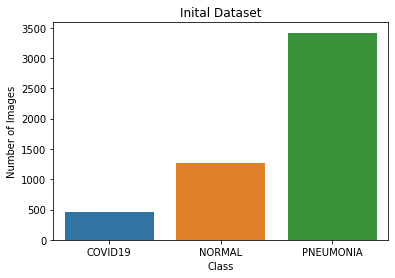

In [ ]:
image_labels = []
for  label in train.classes:
  image_labels.append(categories_dict[label])

df = pd.DataFrame(image_labels)
sns.countplot(x=0, data= df).set(Title='Inital Dataset', xlabel='Class', ylabel='Number of Images')

In [ ]:

tfms = get_transforms (do_flip=True, max_rotate=10.0);
dataTrain = ImageDataBunch.from_folder(path, train='train', size=2000);

/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:461: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


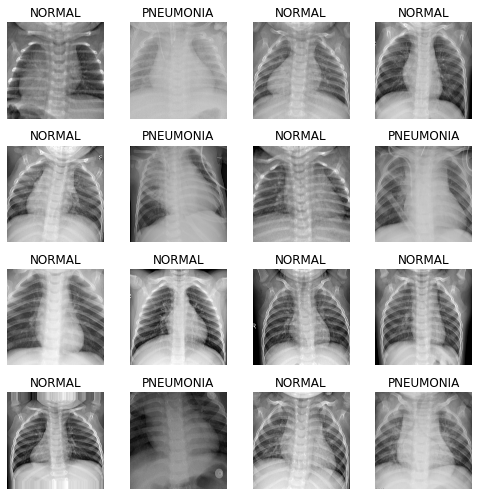

In [ ]:
dataTrain.show_batch(rows=4, figsize=(7,7))

<h1>Balancing the dataset by augmenting the training images for COVID19 and NORMAL</h1>

In [ ]:
aug_image_path = {
  0: '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train/COVID19',
  1: '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train/NORMAL',  
}
aug_image_prefix = {
  0: 'COVID19_AUG',
  1: 'NORMAL_AUG',  
}

number_of_aug_img = 0
for i, label in enumerate(train.classes):
  if label == 0 or label == 1:
    if label == 0:
      aug_image_counter = 7
    else:
      aug_image_counter = 2

    img = cv2.imread(train.filepaths[i])
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x.reshape((1,) + x.shape)

    counter = 0
    for batch in image_gen.flow(x, batch_size= aug_image_counter, save_to_dir=aug_image_path[label], save_prefix= f'{aug_image_prefix[label]}_{i}', save_format="jpg"):
      number_of_aug_img += 1
      counter += 1
      if(number_of_aug_img%200==0): print(number_of_aug_img,"Augmented Images")

      if(counter >= aug_image_counter):
        break



200 Augmented Images
400 Augmented Images
600 Augmented Images
800 Augmented Images
1000 Augmented Images
1200 Augmented Images
1400 Augmented Images
1600 Augmented Images
1800 Augmented Images
2000 Augmented Images
2200 Augmented Images
2400 Augmented Images
2600 Augmented Images
2800 Augmented Images
3000 Augmented Images
3200 Augmented Images
3400 Augmented Images
3600 Augmented Images
3800 Augmented Images
4000 Augmented Images
4200 Augmented Images
4400 Augmented Images
4600 Augmented Images
4800 Augmented Images
5000 Augmented Images
5200 Augmented Images
5400 Augmented Images
5600 Augmented Images


----------------------------------------

-------------------------------------------------------------

In [ ]:
image_gen = keras.preprocessing.image.ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True
                               )
test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
train = image_gen.flow_from_directory(train_directory)

Found 10895 images belonging to 3 classes.


[Text(0, 0.5, 'Number of Images'),
 Text(0.5, 0, 'Class'),
 Text(0.5, 1.0, 'Inital Dataset')]

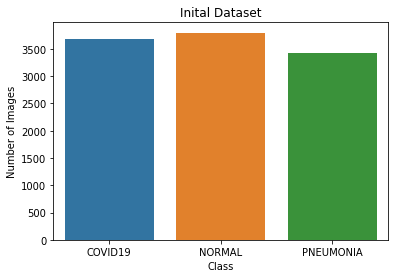

In [ ]:
image_labels = []
for  label in train.classes:
  image_labels.append(categories_dict[label])

df = pd.DataFrame(image_labels)
sns.countplot(x=0, data= df).set(Title='Inital Dataset', xlabel='Class', ylabel='Number of Images')

In [ ]:
#train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#        rescale=1./255)
#test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
#train_balanced = train_datagen.flow_from_directory(
#        train_directory,
#        target_size=(64, 64),
#        batch_size=32)

Found 10153 images belonging to 3 classes.


In [ ]:
#TARGET_SIZE = (64, 64)

In [ ]:
#ls '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train/COVID19'

In [ ]:
#train_balanced = image_gen.flow_from_directory(
#      train_directory, 
#      target_size= TARGET_SIZE,
#      color_mode='grayscale',
#      batch_size=BATCH_SIZE
#      )

Found 10895 images belonging to 3 classes.


In [ ]:
#test_dataset = train_datagen.flow_from_directory(
#      test_directory, 
#      target_size= TARGET_SIZE,
#      color_mode='grayscale',
#      batch_size=BATCH_SIZE
#      )
train_balanced = image_gen.flow_from_directory(
      train_directory, 
      target_size= TARGET_SIZE,
      color_mode='grayscale',
      batch_size=10895
      )

Found 10895 images belonging to 3 classes.


In [ ]:
X_train = []
y_train = []
X_train, y_train = next(train_balanced)

In [ ]:
X_train.shape, y_train.shape

((10895, 140, 140, 1), (10895, 3))

In [ ]:
from tqdm import tqdm

In [ ]:
len(train_balanced)

1

In [ ]:
#X_train = []
#y_train = []
#for X, y in tqdm(train_balanced, total=len(train_balanced)):
#  print("\nx\n")
#  print(X)
#  print("\ny\n")
#  print(y)
#  X_train.append(X)
#  y_train.append(y)

  1%|          | 1/171 [00:02<08:03,  2.84s/it]


x

[[[[3.803922e-01]
   [3.803922e-01]
   [3.803922e-01]
   [3.803922e-01]
   ...
   [8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]]

  [[3.803922e-01]
   [3.803922e-01]
   [3.803922e-01]
   [3.803922e-01]
   ...
   [8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]]

  [[3.803922e-01]
   [3.803922e-01]
   [3.803922e-01]
   [3.803922e-01]
   ...
   [8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]]

  [[3.803922e-01]
   [3.803922e-01]
   [3.803922e-01]
   [3.803922e-01]
   ...
   [8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]]

  ...

  [[8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]
   ...
   [5.882353e-02]
   [5.882353e-02]
   [5.882353e-02]
   [5.882353e-02]]

  [[8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]
   ...
   [5.882353e-02]
   [5.882353e-02]
   [5.882353e-02]
   [5.882353e-02]]

  [[8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]

  1%|          | 2/171 [00:05<07:20,  2.60s/it]


x

[[[[0.035294]
   [0.035294]
   [0.035294]
   [0.035294]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.036724]
   [0.036721]
   [0.036718]
   [0.036715]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.040684]
   [0.040681]
   [0.040678]
   [0.040675]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.049164]
   [0.049153]
   [0.049142]
   [0.049131]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.033713]
   [0.03371 ]
   [0.033707]
   [0.033705]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.035294]
   [0.035294]
   [0.035294]
   [0.035294]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.035294]
   [0.035294]
   [0.035294]
   [0.035294]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.035294]
   [0.035294]
   [0.035294]
   [0.035294]]]


 [[[0.402384]
   [0

  2%|▏         | 3/171 [00:07<07:02,  2.51s/it]


x

[[[[6.666667e-02]
   [6.866559e-02]
   [8.484970e-02]
   [1.220853e-01]
   ...
   [9.190341e-02]
   [7.150761e-02]
   [5.402033e-02]
   [5.098040e-02]]

  [[6.666667e-02]
   [6.866559e-02]
   [8.484970e-02]
   [1.220853e-01]
   ...
   [9.190341e-02]
   [7.150761e-02]
   [5.402033e-02]
   [5.098040e-02]]

  [[6.666667e-02]
   [6.866559e-02]
   [8.484970e-02]
   [1.220853e-01]
   ...
   [9.190341e-02]
   [7.150761e-02]
   [5.402033e-02]
   [5.098040e-02]]

  [[6.666667e-02]
   [6.866559e-02]
   [8.484970e-02]
   [1.220853e-01]
   ...
   [9.190341e-02]
   [7.150761e-02]
   [5.402033e-02]
   [5.098040e-02]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

  2%|▏         | 4/171 [00:10<07:07,  2.56s/it]


x

[[[[0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   ...
   [0.047059]
   [0.047059]
   [0.049839]
   [0.053898]]

  [[0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   ...
   [0.047059]
   [0.047059]
   [0.049839]
   [0.053898]]

  [[0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   ...
   [0.047059]
   [0.047059]
   [0.049839]
   [0.053898]]

  [[0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   ...
   [0.047059]
   [0.047059]
   [0.049839]
   [0.053898]]

  ...

  [[0.52085 ]
   [0.508973]
   [0.537974]
   [0.579395]
   ...
   [0.7267  ]
   [0.737255]
   [0.717791]
   [0.703441]]

  [[0.52085 ]
   [0.508973]
   [0.537974]
   [0.579395]
   ...
   [0.7267  ]
   [0.737255]
   [0.717791]
   [0.703441]]

  [[0.52085 ]
   [0.508973]
   [0.537974]
   [0.579395]
   ...
   [0.7267  ]
   [0.737255]
   [0.717791]
   [0.703441]]

  [[0.52085 ]
   [0.508973]
   [0.537974]
   [0.579395]
   ...
   [0.7267  ]
   [0.737255]
   [0.717791]
   [0.703441]]]


 [[[0.15177 ]
   [0

  3%|▎         | 5/171 [00:13<07:12,  2.61s/it]


x

[[[[0.376364]
   [0.376359]
   [0.376354]
   [0.388942]
   ...
   [0.49297 ]
   [0.47761 ]
   [0.477629]
   [0.477649]]

  [[0.372949]
   [0.372944]
   [0.37294 ]
   [0.377109]
   ...
   [0.505754]
   [0.492341]
   [0.49238 ]
   [0.492419]]

  [[0.420779]
   [0.420857]
   [0.420935]
   [0.419258]
   ...
   [0.541434]
   [0.519659]
   [0.519698]
   [0.519737]]

  [[0.450339]
   [0.450368]
   [0.450398]
   [0.449277]
   ...
   [0.544562]
   [0.524745]
   [0.52475 ]
   [0.524754]]

  ...

  [[0.737255]
   [0.737255]
   [0.737255]
   [0.73902 ]
   ...
   [0.825601]
   [0.789169]
   [0.789179]
   [0.789189]]

  [[0.741012]
   [0.741027]
   [0.741042]
   [0.738974]
   ...
   [0.828079]
   [0.795999]
   [0.796009]
   [0.796018]]

  [[0.749765]
   [0.74977 ]
   [0.749775]
   [0.744584]
   ...
   [0.826514]
   [0.8     ]
   [0.8     ]
   [0.8     ]]

  [[0.752464]
   [0.752454]
   [0.752444]
   [0.752226]
   ...
   [0.825358]
   [0.8     ]
   [0.8     ]
   [0.8     ]]]


 [[[0.356647]
   [0

  4%|▎         | 6/171 [00:15<07:23,  2.68s/it]


x

[[[[0.305882]
   [0.305882]
   [0.361264]
   [0.594621]
   ...
   [0.259685]
   [0.303744]
   [0.309804]
   [0.309804]]

  [[0.305882]
   [0.305882]
   [0.361264]
   [0.594621]
   ...
   [0.259685]
   [0.303744]
   [0.309804]
   [0.309804]]

  [[0.305882]
   [0.305882]
   [0.361264]
   [0.594621]
   ...
   [0.259685]
   [0.303744]
   [0.309804]
   [0.309804]]

  [[0.305882]
   [0.305882]
   [0.361264]
   [0.594621]
   ...
   [0.259685]
   [0.303744]
   [0.309804]
   [0.309804]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.240435]
   [0

  4%|▍         | 7/171 [00:18<06:55,  2.53s/it]


x

[[[[8.627451e-02]
   [8.627451e-02]
   [8.627451e-02]
   [8.627451e-02]
   ...
   [1.254902e-01]
   [1.254902e-01]
   [1.254902e-01]
   [1.254902e-01]]

  [[8.627451e-02]
   [8.627451e-02]
   [8.627451e-02]
   [8.627451e-02]
   ...
   [1.254902e-01]
   [1.254902e-01]
   [1.254902e-01]
   [1.254902e-01]]

  [[8.627451e-02]
   [8.627451e-02]
   [8.627451e-02]
   [8.627451e-02]
   ...
   [1.254902e-01]
   [1.254902e-01]
   [1.254902e-01]
   [1.254902e-01]]

  [[8.101862e-02]
   [8.096809e-02]
   [8.091757e-02]
   [8.086704e-02]
   ...
   [1.206394e-01]
   [1.206192e-01]
   [1.205990e-01]
   [1.205788e-01]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

  5%|▍         | 8/171 [00:20<06:25,  2.37s/it]


x

[[[[1.138383e-01]
   [1.670719e-01]
   [2.152180e-01]
   [2.460552e-01]
   ...
   [7.682625e-01]
   [6.732460e-01]
   [6.602900e-01]
   [6.406090e-01]]

  [[1.080393e-01]
   [1.622323e-01]
   [2.110811e-01]
   [2.351886e-01]
   ...
   [6.995808e-01]
   [6.595380e-01]
   [6.626567e-01]
   [6.563326e-01]]

  [[1.060397e-01]
   [1.529140e-01]
   [1.973353e-01]
   [2.207578e-01]
   ...
   [6.682676e-01]
   [6.573857e-01]
   [6.657943e-01]
   [6.909255e-01]]

  [[1.017679e-01]
   [1.407100e-01]
   [1.821538e-01]
   [2.105384e-01]
   ...
   [6.185901e-01]
   [6.340800e-01]
   [6.497406e-01]
   [6.769140e-01]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

  5%|▌         | 9/171 [00:22<06:10,  2.29s/it]


x

[[[[0.26719 ]
   [0.267203]
   [0.267216]
   [0.26723 ]
   ...
   [0.179652]
   [0.179625]
   [0.179599]
   [0.179572]]

  [[0.269081]
   [0.269041]
   [0.269001]
   [0.268961]
   ...
   [0.178781]
   [0.178794]
   [0.178807]
   [0.178821]]

  [[0.256415]
   [0.256349]
   [0.256282]
   [0.256216]
   ...
   [0.166656]
   [0.166576]
   [0.166496]
   [0.166416]]

  [[0.238755]
   [0.238741]
   [0.238728]
   [0.238715]
   ...
   [0.150057]
   [0.150017]
   [0.149977]
   [0.149937]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.254902]
   [0

  6%|▌         | 10/171 [00:24<06:20,  2.36s/it]


x

[[[[4.799883e-01]
   [4.809850e-01]
   [4.870488e-01]
   [4.848189e-01]
   ...
   [3.694476e-01]
   [3.536049e-01]
   [3.386599e-01]
   [3.248538e-01]]

  [[4.858420e-01]
   [4.948347e-01]
   [4.954844e-01]
   [4.991098e-01]
   ...
   [3.779987e-01]
   [3.648755e-01]
   [3.413576e-01]
   [3.129798e-01]]

  [[4.910806e-01]
   [5.055227e-01]
   [5.177324e-01]
   [5.187395e-01]
   ...
   [3.808904e-01]
   [3.699025e-01]
   [3.524945e-01]
   [3.139907e-01]]

  [[4.980235e-01]
   [5.112055e-01]
   [5.191261e-01]
   [5.107965e-01]
   ...
   [3.748926e-01]
   [3.658623e-01]
   [3.509303e-01]
   [3.164938e-01]]

  ...

  [[3.143567e-01]
   [3.702741e-01]
   [4.758969e-01]
   [5.825458e-01]
   ...
   [6.561087e-02]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[3.122271e-01]
   [3.783790e-01]
   [4.909764e-01]
   [5.637369e-01]
   ...
   [6.900054e-02]
   [0.000000e+00]
   [0.000000e+00]
   [1.101140e-03]]

  [[3.086651e-01]
   [3.845402e-01]
   [5.052431e-01]
   [5.312974e-01]

  6%|▋         | 11/171 [00:26<06:08,  2.30s/it]


x

[[[[3.111711e-01]
   [3.073970e-01]
   [3.013635e-01]
   [3.043751e-01]
   ...
   [2.002876e-01]
   [2.078358e-01]
   [2.153839e-01]
   [2.245942e-01]]

  [[3.111711e-01]
   [3.073970e-01]
   [3.013635e-01]
   [3.043751e-01]
   ...
   [2.002876e-01]
   [2.078358e-01]
   [2.153839e-01]
   [2.245942e-01]]

  [[3.154202e-01]
   [3.119088e-01]
   [3.102251e-01]
   [3.138481e-01]
   ...
   [1.992111e-01]
   [2.078358e-01]
   [2.153839e-01]
   [2.245942e-01]]

  [[3.291644e-01]
   [3.355541e-01]
   [3.390814e-01]
   [3.414409e-01]
   ...
   [2.155078e-01]
   [2.237669e-01]
   [2.302198e-01]
   [2.381667e-01]]

  ...

  [[1.237631e-02]
   [1.309913e-02]
   [4.105908e-02]
   [8.144214e-02]
   ...
   [6.147277e-01]
   [5.942408e-01]
   [4.095937e-01]
   [2.466676e-01]]

  [[1.313187e-02]
   [9.669431e-03]
   [3.743697e-02]
   [7.571921e-02]
   ...
   [6.347355e-01]
   [5.938353e-01]
   [4.158446e-01]
   [2.507577e-01]]

  [[1.313187e-02]
   [6.950854e-03]
   [3.555378e-02]
   [7.571921e-02]

  7%|▋         | 12/171 [00:29<06:29,  2.45s/it]


x

[[[[4.029919e-01]
   [4.071036e-01]
   [4.262420e-01]
   [4.332193e-01]
   ...
   [3.164743e-01]
   [3.211639e-01]
   [3.444140e-01]
   [3.491038e-01]]

  [[4.029919e-01]
   [4.071036e-01]
   [4.262420e-01]
   [4.332193e-01]
   ...
   [3.164743e-01]
   [3.211639e-01]
   [3.444140e-01]
   [3.491038e-01]]

  [[4.029919e-01]
   [4.071036e-01]
   [4.262420e-01]
   [4.332193e-01]
   ...
   [3.164743e-01]
   [3.211639e-01]
   [3.444140e-01]
   [3.491038e-01]]

  [[4.029919e-01]
   [4.071036e-01]
   [4.262420e-01]
   [4.332193e-01]
   ...
   [3.164743e-01]
   [3.211639e-01]
   [3.444140e-01]
   [3.491038e-01]]

  ...

  [[6.700305e-01]
   [6.960444e-01]
   [6.993324e-01]
   [7.063384e-01]
   ...
   [6.920800e-01]
   [6.790733e-01]
   [6.708163e-01]
   [6.550283e-01]]

  [[6.700305e-01]
   [6.960444e-01]
   [6.993324e-01]
   [7.063384e-01]
   ...
   [6.920800e-01]
   [6.790733e-01]
   [6.708163e-01]
   [6.550283e-01]]

  [[6.700305e-01]
   [6.960444e-01]
   [6.993324e-01]
   [7.063384e-01]

  8%|▊         | 13/171 [00:31<06:13,  2.36s/it]


x

[[[[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [6.278929e-04]
   [9.581789e-04]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [5.629387e-04]
   [1.255318e-02]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  ...

  [[3.830640e-01]
   [4.496050e-01]
   [5.060534e-01]
   [5.423061e-01]
   ...
   [7.205639e-01]
   [7.044628e-01]
   [6.764376e-01]
   [6.302227e-01]]

  [[3.794963e-01]
   [4.449568e-01]
   [5.066388e-01]
   [5.448801e-01]
   ...
   [7.301627e-01]
   [7.175890e-01]
   [6.881293e-01]
   [6.427033e-01]]

  [[3.729286e-01]
   [4.371293e-01]
   [4.892712e-01]
   [5.387325e-01]

  8%|▊         | 14/171 [00:34<06:13,  2.38s/it]


x

[[[[3.137255e-02]
   [3.137255e-02]
   [3.137255e-02]
   [3.137255e-02]
   ...
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]]

  [[3.137255e-02]
   [3.137255e-02]
   [3.137255e-02]
   [3.137255e-02]
   ...
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]]

  [[3.137255e-02]
   [3.137255e-02]
   [3.137255e-02]
   [3.137255e-02]
   ...
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]]

  [[3.137255e-02]
   [3.137255e-02]
   [3.137255e-02]
   [3.137255e-02]
   ...
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]]

  ...

  [[9.921569e-01]
   [9.921569e-01]
   [9.921569e-01]
   [9.921569e-01]
   ...
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]]

  [[9.921569e-01]
   [9.921569e-01]
   [9.921569e-01]
   [9.921569e-01]
   ...
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]]

  [[9.921569e-01]
   [9.921569e-01]
   [9.921569e-01]
   [9.921569e-01]

  9%|▉         | 15/171 [00:36<06:15,  2.40s/it]


x

[[[[0.911406]
   [0.91069 ]
   [0.909974]
   [0.90812 ]
   ...
   [0.718107]
   [0.719821]
   [0.746918]
   [0.839266]]

  [[0.575286]
   [0.573414]
   [0.571542]
   [0.567314]
   ...
   [0.237915]
   [0.250274]
   [0.329188]
   [0.571612]]

  [[0.066586]
   [0.066807]
   [0.066609]
   [0.06641 ]
   ...
   [0.011725]
   [0.028115]
   [0.129924]
   [0.44717 ]]

  [[0.00544 ]
   [0.008407]
   [0.008429]
   [0.008451]
   ...
   [0.001824]
   [0.014246]
   [0.112074]
   [0.436666]]

  ...

  [[0.207158]
   [0.307795]
   [0.409841]
   [0.447388]
   ...
   [0.010777]
   [0.025865]
   [0.118837]
   [0.453559]]

  [[0.213348]
   [0.303062]
   [0.399239]
   [0.452079]
   ...
   [0.020112]
   [0.033906]
   [0.133031]
   [0.471819]]

  [[0.360911]
   [0.430517]
   [0.507523]
   [0.552661]
   ...
   [0.430876]
   [0.43149 ]
   [0.481178]
   [0.690379]]

  [[0.701388]
   [0.735733]
   [0.7738  ]
   [0.794313]
   ...
   [0.891844]
   [0.883292]
   [0.878866]
   [0.9187  ]]]


 [[[0.12549 ]
   [0

  9%|▉         | 16/171 [00:39<06:16,  2.43s/it]


x

[[[[0.294118]
   [0.294118]
   [0.294118]
   [0.294118]
   ...
   [0.082353]
   [0.082353]
   [0.082353]
   [0.082353]]

  [[0.294118]
   [0.294118]
   [0.294118]
   [0.294118]
   ...
   [0.082353]
   [0.082353]
   [0.082353]
   [0.082353]]

  [[0.294118]
   [0.294118]
   [0.294118]
   [0.294118]
   ...
   [0.082353]
   [0.082353]
   [0.082353]
   [0.082353]]

  [[0.294118]
   [0.294118]
   [0.294118]
   [0.294118]
   ...
   [0.082353]
   [0.082353]
   [0.082353]
   [0.082353]]

  ...

  [[0.164706]
   [0.164706]
   [0.164706]
   [0.164706]
   ...
   [0.85098 ]
   [0.85098 ]
   [0.85098 ]
   [0.85098 ]]

  [[0.164706]
   [0.164706]
   [0.164706]
   [0.164706]
   ...
   [0.85098 ]
   [0.85098 ]
   [0.85098 ]
   [0.85098 ]]

  [[0.164706]
   [0.164706]
   [0.164706]
   [0.164706]
   ...
   [0.85098 ]
   [0.85098 ]
   [0.85098 ]
   [0.85098 ]]

  [[0.164706]
   [0.164706]
   [0.164706]
   [0.164706]
   ...
   [0.85098 ]
   [0.85098 ]
   [0.85098 ]
   [0.85098 ]]]


 [[[0.780392]
   [0

 10%|▉         | 17/171 [00:41<06:16,  2.45s/it]


x

[[[[0.431867]
   [0.425376]
   [0.431874]
   [0.454529]
   ...
   [0.319189]
   [0.654996]
   [0.864598]
   [0.876119]]

  [[0.443436]
   [0.441343]
   [0.433918]
   [0.426311]
   ...
   [0.314942]
   [0.647893]
   [0.856673]
   [0.869497]]

  [[0.45466 ]
   [0.456823]
   [0.460721]
   [0.44827 ]
   ...
   [0.311322]
   [0.644288]
   [0.853425]
   [0.867693]]

  [[0.427665]
   [0.427629]
   [0.449877]
   [0.461391]
   ...
   [0.312796]
   [0.63989 ]
   [0.847935]
   [0.865784]]

  ...

  [[0.06528 ]
   [0.064781]
   [0.063855]
   [0.06231 ]
   ...
   [0.28163 ]
   [0.432319]
   [0.524809]
   [0.534212]]

  [[0.056722]
   [0.058429]
   [0.055474]
   [0.052504]
   ...
   [0.273833]
   [0.437185]
   [0.541787]
   [0.556374]]

  [[0.057848]
   [0.058408]
   [0.054256]
   [0.050473]
   ...
   [0.283678]
   [0.425933]
   [0.520516]
   [0.533358]]

  [[0.058824]
   [0.058824]
   [0.05175 ]
   [0.049245]
   ...
   [0.286138]
   [0.42979 ]
   [0.526426]
   [0.539215]]]


 [[[0.      ]
   [0

 11%|█         | 18/171 [00:43<05:59,  2.35s/it]


x

[[[[4.745725e-01]
   [4.417705e-01]
   [4.212491e-01]
   [3.313287e-01]
   ...
   [4.004376e-01]
   [3.732758e-01]
   [1.432509e-01]
   [9.397037e-02]]

  [[5.008017e-01]
   [4.423012e-01]
   [3.775483e-01]
   [3.465235e-01]
   ...
   [3.827845e-01]
   [2.633511e-01]
   [6.769542e-02]
   [7.689975e-02]]

  [[5.122954e-01]
   [4.523134e-01]
   [3.682656e-01]
   [3.493908e-01]
   ...
   [3.511634e-01]
   [2.182564e-01]
   [6.729375e-02]
   [7.689970e-02]]

  [[4.683503e-01]
   [3.986374e-01]
   [3.265483e-01]
   [3.443579e-01]
   ...
   [2.535452e-01]
   [1.000068e-01]
   [5.915643e-02]
   [5.856294e-02]]

  ...

  [[6.934972e-01]
   [6.963050e-01]
   [6.625270e-01]
   [7.468407e-01]
   ...
   [7.183838e-01]
   [7.047858e-01]
   [6.941068e-01]
   [6.782269e-01]]

  [[6.990035e-01]
   [7.027217e-01]
   [7.316238e-01]
   [7.612641e-01]
   ...
   [7.188082e-01]
   [7.088547e-01]
   [7.005186e-01]
   [6.615698e-01]]

  [[7.088930e-01]
   [7.199930e-01]
   [7.765717e-01]
   [7.554132e-01]

 11%|█         | 19/171 [00:45<05:47,  2.29s/it]


x

[[[[8.235294e-02]
   [8.347808e-02]
   [9.203308e-02]
   [1.026229e-01]
   ...
   [1.338959e-01]
   [1.265158e-01]
   [1.047390e-01]
   [1.019608e-01]]

  [[8.235294e-02]
   [8.347808e-02]
   [9.203308e-02]
   [1.026229e-01]
   ...
   [1.338959e-01]
   [1.265158e-01]
   [1.047390e-01]
   [1.019608e-01]]

  [[8.235294e-02]
   [8.347808e-02]
   [9.203308e-02]
   [1.026229e-01]
   ...
   [1.338959e-01]
   [1.265158e-01]
   [1.047390e-01]
   [1.019608e-01]]

  [[8.235294e-02]
   [8.347808e-02]
   [9.203308e-02]
   [1.026229e-01]
   ...
   [1.338959e-01]
   [1.265158e-01]
   [1.047390e-01]
   [1.019608e-01]]

  ...

  [[6.666667e-01]
   [6.936699e-01]
   [8.371444e-01]
   [7.345556e-01]
   ...
   [8.358567e-01]
   [8.318854e-01]
   [8.348311e-01]
   [8.352942e-01]]

  [[6.666667e-01]
   [6.936699e-01]
   [8.371444e-01]
   [7.345556e-01]
   ...
   [8.358567e-01]
   [8.318854e-01]
   [8.348311e-01]
   [8.352942e-01]]

  [[6.666667e-01]
   [6.936699e-01]
   [8.371444e-01]
   [7.345556e-01]

 12%|█▏        | 20/171 [00:48<05:41,  2.26s/it]


x

[[[[1.555518e-01]
   [1.556194e-01]
   [1.328756e-01]
   [1.294118e-01]
   ...
   [5.007210e-01]
   [4.962080e-01]
   [4.928983e-01]
   [4.928597e-01]]

  [[1.376430e-01]
   [1.376817e-01]
   [1.280546e-01]
   [1.265966e-01]
   ...
   [5.115505e-01]
   [5.128167e-01]
   [5.321945e-01]
   [5.320014e-01]]

  [[1.630321e-01]
   [1.629259e-01]
   [1.257569e-01]
   [1.225126e-01]
   ...
   [5.245614e-01]
   [5.250316e-01]
   [5.612482e-01]
   [5.613834e-01]]

  [[1.483587e-01]
   [1.484649e-01]
   [1.195218e-01]
   [1.163552e-01]
   ...
   [5.346509e-01]
   [5.275469e-01]
   [5.254902e-01]
   [5.254902e-01]]

  ...

  [[2.343498e-01]
   [2.343402e-01]
   [2.325991e-01]
   [2.340941e-01]
   ...
   [2.496355e-01]
   [1.803131e-01]
   [1.882353e-01]
   [1.882353e-01]]

  [[2.352941e-01]
   [2.352941e-01]
   [2.318895e-01]
   [2.323618e-01]
   ...
   [2.730606e-01]
   [1.784220e-01]
   [1.882353e-01]
   [1.882353e-01]]

  [[2.352941e-01]
   [2.352941e-01]
   [2.342071e-01]
   [2.340323e-01]

 12%|█▏        | 21/171 [00:50<05:46,  2.31s/it]


x

[[[[0.254902]
   [0.254902]
   [0.254902]
   [0.254902]
   ...
   [0.266667]
   [0.266667]
   [0.266667]
   [0.266667]]

  [[0.254902]
   [0.254902]
   [0.254902]
   [0.254902]
   ...
   [0.266667]
   [0.266667]
   [0.266667]
   [0.266667]]

  [[0.254902]
   [0.254902]
   [0.254902]
   [0.254902]
   ...
   [0.266667]
   [0.266667]
   [0.266667]
   [0.266667]]

  [[0.254902]
   [0.254902]
   [0.254902]
   [0.254902]
   ...
   [0.266667]
   [0.266667]
   [0.266667]
   [0.266667]]

  ...

  [[0.043137]
   [0.043137]
   [0.043137]
   [0.043137]
   ...
   [0.180392]
   [0.180392]
   [0.180392]
   [0.180392]]

  [[0.043137]
   [0.043137]
   [0.043137]
   [0.043137]
   ...
   [0.180392]
   [0.180392]
   [0.180392]
   [0.180392]]

  [[0.043137]
   [0.043137]
   [0.043137]
   [0.043137]
   ...
   [0.180392]
   [0.180392]
   [0.180392]
   [0.180392]]

  [[0.043137]
   [0.043137]
   [0.043137]
   [0.043137]
   ...
   [0.180392]
   [0.180392]
   [0.180392]
   [0.180392]]]


 [[[0.657094]
   [0

 13%|█▎        | 22/171 [00:52<05:36,  2.26s/it]


x

[[[[1.791214e-01]
   [2.241563e-01]
   [2.517468e-01]
   [2.519297e-01]
   ...
   [3.379521e-03]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[1.791214e-01]
   [2.241563e-01]
   [2.517468e-01]
   [2.519297e-01]
   ...
   [3.379521e-03]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[1.791214e-01]
   [2.241563e-01]
   [2.517468e-01]
   [2.519297e-01]
   ...
   [3.379521e-03]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[1.791214e-01]
   [2.241563e-01]
   [2.517468e-01]
   [2.519297e-01]
   ...
   [3.379521e-03]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  ...

  [[6.641845e-03]
   [3.921569e-03]
   [3.921569e-03]
   [2.944635e-03]
   ...
   [1.126507e-03]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[6.641845e-03]
   [3.921569e-03]
   [3.921569e-03]
   [2.944635e-03]
   ...
   [1.126507e-03]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[6.641845e-03]
   [3.921569e-03]
   [3.921569e-03]
   [2.944635e-03]

 13%|█▎        | 23/171 [00:55<05:43,  2.32s/it]


x

[[[[0.380392]
   [0.380392]
   [0.380392]
   [0.380392]
   ...
   [0.282353]
   [0.282353]
   [0.282353]
   [0.282353]]

  [[0.378597]
   [0.378601]
   [0.378606]
   [0.37861 ]
   ...
   [0.278802]
   [0.278816]
   [0.278829]
   [0.278843]]

  [[0.378301]
   [0.378296]
   [0.378292]
   [0.378288]
   ...
   [0.26937 ]
   [0.269374]
   [0.269379]
   [0.269383]]

  [[0.374796]
   [0.374809]
   [0.374823]
   [0.374836]
   ...
   [0.26792 ]
   [0.267916]
   [0.267911]
   [0.267907]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.260754]
   [0.260759]
   [0.260763]
   [0.260768]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.266926]
   [0.266908]
   [0.26689 ]
   [0.266872]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.266267]
   [0.266285]
   [0.266303]
   [0.266321]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.258824]
   [0.258824]
   [0.258824]
   [0.258824]]]


 [[[0.422573]
   [0

 14%|█▍        | 24/171 [00:57<05:44,  2.34s/it]


x

[[[[0.582961]
   [0.617153]
   [0.429283]
   [0.185324]
   ...
   [0.152472]
   [0.147051]
   [0.138234]
   [0.123659]]

  [[0.383272]
   [0.595839]
   [0.42321 ]
   [0.183337]
   ...
   [0.150214]
   [0.145778]
   [0.1373  ]
   [0.119975]]

  [[0.588333]
   [0.46746 ]
   [0.236636]
   [0.375858]
   ...
   [0.148165]
   [0.143918]
   [0.135938]
   [0.11764 ]]

  [[0.627478]
   [0.454185]
   [0.218275]
   [0.419328]
   ...
   [0.149256]
   [0.142655]
   [0.133491]
   [0.120357]]

  ...

  [[0.136568]
   [0.145426]
   [0.140282]
   [0.133026]
   ...
   [0.111448]
   [0.106964]
   [0.108219]
   [0.118421]]

  [[0.136558]
   [0.146857]
   [0.142064]
   [0.131628]
   ...
   [0.113725]
   [0.109257]
   [0.109323]
   [0.120712]]

  [[0.135098]
   [0.145096]
   [0.142067]
   [0.13162 ]
   ...
   [0.113725]
   [0.109257]
   [0.1103  ]
   [0.12165 ]]

  [[0.130214]
   [0.136987]
   [0.13931 ]
   [0.13162 ]
   ...
   [0.112837]
   [0.108173]
   [0.109554]
   [0.120359]]]


 [[[0.226223]
   [0

 15%|█▍        | 25/171 [00:59<05:33,  2.29s/it]


x

[[[[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.002721]
   [0.00272 ]
   [0.002718]
   [0.002717]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.048373]
   [0.048346]
   [0.048319]
   [0.048292]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  ...

  [[0.091078]
   [0.091095]
   [0.091112]
   [0.091129]
   ...
   [0.003149]
   [0.003152]
   [0.003155]
   [0.003158]]

  [[0.080987]
   [0.080983]
   [0.080979]
   [0.080974]
   ...
   [0.001965]
   [0.001964]
   [0.001962]
   [0.001961]]

  [[0.077388]
   [0.077395]
   [0.077402]
   [0.077409]
   ...
   [0.002338]
   [0.00234 ]
   [0.002341]
   [0.002342]]

  [[0.058294]
   [0.058302]
   [0.058311]
   [0.058319]
   ...
   [0.002403]
   [0.0024  ]
   [0.002398]
   [0.002395]]]


 [[[0.043137]
   [0

 15%|█▌        | 26/171 [01:02<05:38,  2.33s/it]


x

[[[[0.318308]
   [0.318268]
   [0.318228]
   [0.318188]
   ...
   [0.066099]
   [0.066072]
   [0.066046]
   [0.066019]]

  [[0.308855]
   [0.308815]
   [0.308775]
   [0.308735]
   ...
   [0.059797]
   [0.05977 ]
   [0.059743]
   [0.059717]]

  [[0.301961]
   [0.301961]
   [0.301961]
   [0.301961]
   ...
   [0.048165]
   [0.048112]
   [0.048059]
   [0.048005]]

  [[0.301629]
   [0.301576]
   [0.301523]
   [0.30147 ]
   ...
   [0.046926]
   [0.046952]
   [0.046979]
   [0.047005]]

  ...

  [[0.612185]
   [0.612171]
   [0.612158]
   [0.612145]
   ...
   [0.058824]
   [0.058824]
   [0.058824]
   [0.058824]]

  [[0.625421]
   [0.625488]
   [0.625554]
   [0.625621]
   ...
   [0.058824]
   [0.058824]
   [0.058824]
   [0.058824]]

  [[0.631373]
   [0.631373]
   [0.631373]
   [0.631373]
   ...
   [0.058824]
   [0.058824]
   [0.058824]
   [0.058824]]

  [[0.633753]
   [0.63378 ]
   [0.633807]
   [0.633833]
   ...
   [0.058824]
   [0.058824]
   [0.058824]
   [0.058824]]]


 [[[0.347867]
   [0

 16%|█▌        | 27/171 [01:05<05:57,  2.48s/it]


x

[[[[4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   ...
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]]

  [[4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   ...
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]]

  [[4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   ...
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]]

  [[4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   ...
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 16%|█▋        | 28/171 [01:07<05:51,  2.46s/it]


x

[[[[0.011765]
   [0.011765]
   [0.011765]
   [0.011765]
   ...
   [0.023529]
   [0.023529]
   [0.023529]
   [0.023529]]

  [[0.011765]
   [0.011765]
   [0.011765]
   [0.011765]
   ...
   [0.023529]
   [0.023529]
   [0.023529]
   [0.023529]]

  [[0.011765]
   [0.011765]
   [0.011765]
   [0.011765]
   ...
   [0.023529]
   [0.023529]
   [0.023529]
   [0.023529]]

  [[0.011765]
   [0.011765]
   [0.011765]
   [0.011765]
   ...
   [0.023529]
   [0.023529]
   [0.023529]
   [0.023529]]

  ...

  [[0.011765]
   [0.011765]
   [0.011765]
   [0.011765]
   ...
   [0.019608]
   [0.019608]
   [0.019608]
   [0.019608]]

  [[0.011765]
   [0.011765]
   [0.011765]
   [0.011765]
   ...
   [0.019608]
   [0.019608]
   [0.019608]
   [0.019608]]

  [[0.011765]
   [0.011765]
   [0.011765]
   [0.011765]
   ...
   [0.019608]
   [0.019608]
   [0.019608]
   [0.019608]]

  [[0.011765]
   [0.011765]
   [0.011765]
   [0.011765]
   ...
   [0.019608]
   [0.019608]
   [0.019608]
   [0.019608]]]


 [[[0.090196]
   [0

 17%|█▋        | 29/171 [01:09<05:49,  2.46s/it]


x

[[[[8.509805e-01]
   [8.444806e-01]
   [8.326379e-01]
   [8.252324e-01]
   ...
   [2.482939e-01]
   [2.317322e-01]
   [2.093816e-01]
   [1.882353e-01]]

  [[8.509805e-01]
   [8.444806e-01]
   [8.326379e-01]
   [8.252324e-01]
   ...
   [2.482939e-01]
   [2.317322e-01]
   [2.093816e-01]
   [1.882353e-01]]

  [[8.509805e-01]
   [8.444806e-01]
   [8.326379e-01]
   [8.252324e-01]
   ...
   [2.482939e-01]
   [2.317322e-01]
   [2.093816e-01]
   [1.882353e-01]]

  [[8.509805e-01]
   [8.444806e-01]
   [8.326379e-01]
   [8.252324e-01]
   ...
   [2.482939e-01]
   [2.317322e-01]
   [2.093816e-01]
   [1.882353e-01]]

  ...

  [[3.254902e-01]
   [2.453251e-01]
   [1.496954e-01]
   [1.077412e-01]
   ...
   [1.955585e-01]
   [1.572399e-01]
   [1.312187e-01]
   [1.333333e-01]]

  [[3.254902e-01]
   [2.453251e-01]
   [1.496954e-01]
   [1.077412e-01]
   ...
   [1.955585e-01]
   [1.572399e-01]
   [1.312187e-01]
   [1.333333e-01]]

  [[3.254902e-01]
   [2.453251e-01]
   [1.496954e-01]
   [1.077412e-01]

 18%|█▊        | 30/171 [01:12<05:40,  2.42s/it]


x

[[[[0.387912]
   [0.377272]
   [0.352482]
   [0.338621]
   ...
   [0.553796]
   [0.511987]
   [0.507136]
   [0.521569]]

  [[0.387912]
   [0.377272]
   [0.352482]
   [0.338621]
   ...
   [0.553796]
   [0.511987]
   [0.507136]
   [0.521569]]

  [[0.387912]
   [0.377272]
   [0.352482]
   [0.338621]
   ...
   [0.553796]
   [0.511987]
   [0.507136]
   [0.521569]]

  [[0.387912]
   [0.377272]
   [0.352482]
   [0.338621]
   ...
   [0.553796]
   [0.511987]
   [0.507136]
   [0.521569]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.024592]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.024592]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.024592]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.024592]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.529412]
   [0

 18%|█▊        | 31/171 [01:14<05:50,  2.50s/it]


x

[[[[0.26202 ]
   [0.262042]
   [0.262063]
   [0.262085]
   ...
   [0.499238]
   [0.499339]
   [0.49944 ]
   [0.499541]]

  [[0.272564]
   [0.272578]
   [0.272593]
   [0.272607]
   ...
   [0.556988]
   [0.557104]
   [0.557219]
   [0.557335]]

  [[0.277521]
   [0.277514]
   [0.277507]
   [0.2775  ]
   ...
   [0.573108]
   [0.57305 ]
   [0.572993]
   [0.572935]]

  [[0.277839]
   [0.277868]
   [0.277897]
   [0.277925]
   ...
   [0.538731]
   [0.538659]
   [0.538587]
   [0.538515]]

  ...

  [[0.098039]
   [0.098039]
   [0.098039]
   [0.098039]
   ...
   [0.07451 ]
   [0.07451 ]
   [0.07451 ]
   [0.07451 ]]

  [[0.098039]
   [0.098039]
   [0.098039]
   [0.098039]
   ...
   [0.07451 ]
   [0.07451 ]
   [0.07451 ]
   [0.07451 ]]

  [[0.098039]
   [0.098039]
   [0.098039]
   [0.098039]
   ...
   [0.07451 ]
   [0.07451 ]
   [0.07451 ]
   [0.07451 ]]

  [[0.098039]
   [0.098039]
   [0.098039]
   [0.098039]
   ...
   [0.07451 ]
   [0.07451 ]
   [0.07451 ]
   [0.07451 ]]]


 [[[0.003922]
   [0

 19%|█▊        | 32/171 [01:17<05:41,  2.46s/it]


x

[[[[0.105882]
   [0.179392]
   [0.377428]
   [0.311765]
   ...
   [0.451985]
   [0.368045]
   [0.299085]
   [0.286275]]

  [[0.078631]
   [0.159277]
   [0.385279]
   [0.322119]
   ...
   [0.458436]
   [0.375935]
   [0.309888]
   [0.297764]]

  [[0.079052]
   [0.211196]
   [0.595027]
   [0.327814]
   ...
   [0.47658 ]
   [0.421585]
   [0.335131]
   [0.314163]]

  [[0.424133]
   [0.543031]
   [0.885415]
   [0.56134 ]
   ...
   [0.494767]
   [0.46785 ]
   [0.367543]
   [0.339643]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.334477]
   [0.14174 ]
   [0.013902]
   [0.004473]]

  [[0.172912]
   [0.173232]
   [0.173552]
   [0.174421]
   ...
   [0.499894]
   [0.420751]
   [0.385339]
   [0.385873]]

  [[0.423518]
   [0.423821]
   [0.424124]
   [0.424447]
   ...
   [0.559693]
   [0.543316]
   [0.548175]
   [0.551316]]

  [[0.564706]
   [0.564706]
   [0.564706]
   [0.563791]
   ...
   [0.572549]
   [0.563663]
   [0.569804]
   [0.572549]]]


 [[[0.403922]
   [0

 19%|█▉        | 33/171 [01:19<05:21,  2.33s/it]


x

[[[[0.002289]
   [0.08852 ]
   [0.213826]
   [0.268208]
   ...
   [0.187061]
   [0.196704]
   [0.219119]
   [0.234546]]

  [[0.002289]
   [0.08852 ]
   [0.213826]
   [0.268208]
   ...
   [0.187061]
   [0.196704]
   [0.219119]
   [0.234546]]

  [[0.002289]
   [0.08852 ]
   [0.213826]
   [0.268208]
   ...
   [0.187061]
   [0.196704]
   [0.219119]
   [0.234546]]

  [[0.001993]
   [0.087295]
   [0.212465]
   [0.268165]
   ...
   [0.187061]
   [0.196704]
   [0.219119]
   [0.234546]]

  ...

  [[0.504586]
   [0.506111]
   [0.500344]
   [0.510994]
   ...
   [0.084728]
   [0.014489]
   [0.      ]
   [0.006587]]

  [[0.504586]
   [0.506111]
   [0.500344]
   [0.510994]
   ...
   [0.086154]
   [0.014833]
   [0.      ]
   [0.007095]]

  [[0.504586]
   [0.506111]
   [0.500344]
   [0.510994]
   ...
   [0.086154]
   [0.014833]
   [0.      ]
   [0.007095]]

  [[0.504586]
   [0.506111]
   [0.500344]
   [0.510994]
   ...
   [0.086154]
   [0.014833]
   [0.      ]
   [0.007095]]]


 [[[0.192157]
   [0

 20%|█▉        | 34/171 [01:21<05:23,  2.36s/it]


x

[[[[0.373224]
   [0.373275]
   [0.373325]
   [0.373376]
   ...
   [1.      ]
   [1.      ]
   [1.      ]
   [1.      ]]

  [[0.394167]
   [0.394281]
   [0.394394]
   [0.394507]
   ...
   [1.      ]
   [1.      ]
   [1.      ]
   [1.      ]]

  [[0.413823]
   [0.413798]
   [0.413773]
   [0.413748]
   ...
   [1.      ]
   [1.      ]
   [1.      ]
   [1.      ]]

  [[0.422139]
   [0.422681]
   [0.423222]
   [0.423764]
   ...
   [1.      ]
   [1.      ]
   [1.      ]
   [1.      ]]

  ...

  [[0.027451]
   [0.027451]
   [0.027451]
   [0.027451]
   ...
   [1.      ]
   [1.      ]
   [1.      ]
   [1.      ]]

  [[0.027451]
   [0.027451]
   [0.027451]
   [0.027451]
   ...
   [1.      ]
   [1.      ]
   [1.      ]
   [1.      ]]

  [[0.027451]
   [0.027451]
   [0.027451]
   [0.027451]
   ...
   [1.      ]
   [1.      ]
   [1.      ]
   [1.      ]]

  [[0.027451]
   [0.027451]
   [0.027451]
   [0.027451]
   ...
   [1.      ]
   [1.      ]
   [1.      ]
   [1.      ]]]


 [[[0.      ]
   [0

 20%|██        | 35/171 [01:26<06:46,  2.99s/it]


x

[[[[0.398367]
   [0.384346]
   [0.368432]
   [0.351078]
   ...
   [0.520292]
   [0.496575]
   [0.519353]
   [0.527185]]

  [[0.421667]
   [0.401459]
   [0.391357]
   [0.384114]
   ...
   [0.536401]
   [0.526502]
   [0.557375]
   [0.547588]]

  [[0.437296]
   [0.417141]
   [0.417704]
   [0.415315]
   ...
   [0.537103]
   [0.538176]
   [0.578537]
   [0.568604]]

  [[0.446806]
   [0.446228]
   [0.454121]
   [0.438805]
   ...
   [0.543192]
   [0.553743]
   [0.560215]
   [0.578279]]

  ...

  [[0.307748]
   [0.347711]
   [0.407811]
   [0.46951 ]
   ...
   [0.593053]
   [0.566647]
   [0.524842]
   [0.444997]]

  [[0.322575]
   [0.418841]
   [0.460733]
   [0.454847]
   ...
   [0.545334]
   [0.587063]
   [0.56417 ]
   [0.471867]]

  [[0.318859]
   [0.425931]
   [0.480648]
   [0.450645]
   ...
   [0.514434]
   [0.505507]
   [0.53892 ]
   [0.495867]]

  [[0.403366]
   [0.472928]
   [0.468878]
   [0.43611 ]
   ...
   [0.523415]
   [0.493919]
   [0.554164]
   [0.527709]]]


 [[[0.298039]
   [0

 21%|██        | 36/171 [01:28<06:26,  2.86s/it]


x

[[[[3.683431e-01]
   [2.290868e-01]
   [2.559233e-01]
   [2.655497e-01]
   ...
   [3.445697e-01]
   [4.416712e-01]
   [4.905149e-01]
   [5.246013e-01]]

  [[4.518015e-01]
   [5.429391e-01]
   [3.022227e-01]
   [2.972562e-01]
   ...
   [3.540201e-01]
   [4.239700e-01]
   [4.596239e-01]
   [4.810506e-01]]

  [[4.865897e-01]
   [6.233171e-01]
   [2.547367e-01]
   [3.113159e-01]
   ...
   [4.057011e-01]
   [4.957991e-01]
   [5.226458e-01]
   [5.370345e-01]]

  [[5.397101e-01]
   [5.972661e-01]
   [2.379765e-01]
   [2.805144e-01]
   ...
   [4.380216e-01]
   [4.799826e-01]
   [5.167739e-01]
   [5.820923e-01]]

  ...

  [[9.836502e-02]
   [1.209191e-01]
   [2.479839e-01]
   [2.543929e-01]
   ...
   [5.178919e-01]
   [4.041693e-01]
   [2.911098e-01]
   [2.637340e-01]]

  [[1.042650e-01]
   [1.198646e-01]
   [2.434179e-01]
   [2.437849e-01]
   ...
   [5.349145e-01]
   [4.158000e-01]
   [2.895675e-01]
   [2.573061e-01]]

  [[1.063407e-01]
   [1.215008e-01]
   [2.404101e-01]
   [2.494769e-01]

 22%|██▏       | 37/171 [01:31<06:11,  2.78s/it]


x

[[[[0.466667]
   [0.466667]
   [0.466667]
   [0.466667]
   ...
   [0.164706]
   [0.164706]
   [0.164706]
   [0.164706]]

  [[0.466667]
   [0.466667]
   [0.466667]
   [0.466667]
   ...
   [0.164706]
   [0.164706]
   [0.164706]
   [0.164706]]

  [[0.466667]
   [0.466667]
   [0.466667]
   [0.466667]
   ...
   [0.164706]
   [0.164706]
   [0.164706]
   [0.164706]]

  [[0.466667]
   [0.466667]
   [0.466667]
   [0.466667]
   ...
   [0.164706]
   [0.164706]
   [0.164706]
   [0.164706]]

  ...

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.003922]
   [0

 22%|██▏       | 38/171 [01:34<06:43,  3.03s/it]


x

[[[[0.262849]
   [0.340955]
   [0.785422]
   [0.301667]
   ...
   [0.436927]
   [0.471966]
   [0.474523]
   [0.463952]]

  [[0.262849]
   [0.340955]
   [0.785422]
   [0.301667]
   ...
   [0.436927]
   [0.471966]
   [0.474523]
   [0.463952]]

  [[0.262849]
   [0.340955]
   [0.785422]
   [0.301667]
   ...
   [0.436927]
   [0.471966]
   [0.474523]
   [0.463952]]

  [[0.370851]
   [0.521322]
   [0.753284]
   [0.311792]
   ...
   [0.438516]
   [0.467859]
   [0.474218]
   [0.469424]]

  ...

  [[0.104241]
   [0.184995]
   [0.199882]
   [0.235126]
   ...
   [0.394679]
   [0.372304]
   [0.350838]
   [0.310062]]

  [[0.089986]
   [0.165121]
   [0.207329]
   [0.246553]
   ...
   [0.432203]
   [0.370536]
   [0.340062]
   [0.317947]]

  [[0.089986]
   [0.165121]
   [0.207329]
   [0.246553]
   ...
   [0.432203]
   [0.370536]
   [0.340062]
   [0.317947]]

  [[0.089986]
   [0.165121]
   [0.207329]
   [0.246553]
   ...
   [0.432203]
   [0.370536]
   [0.340062]
   [0.317947]]]


 [[[0.157831]
   [0

 23%|██▎       | 39/171 [01:37<06:13,  2.83s/it]


x

[[[[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 23%|██▎       | 40/171 [01:40<06:22,  2.92s/it]


x

[[[[0.380392]
   [0.380392]
   [0.380392]
   [0.357584]
   ...
   [0.27179 ]
   [0.266667]
   [0.266667]
   [0.266667]]

  [[0.380392]
   [0.380392]
   [0.380392]
   [0.357584]
   ...
   [0.27179 ]
   [0.266667]
   [0.266667]
   [0.266667]]

  [[0.380392]
   [0.380392]
   [0.380392]
   [0.357584]
   ...
   [0.27179 ]
   [0.266667]
   [0.266667]
   [0.266667]]

  [[0.380392]
   [0.380392]
   [0.380392]
   [0.357584]
   ...
   [0.27179 ]
   [0.266667]
   [0.266667]
   [0.266667]]

  ...

  [[0.870588]
   [0.870588]
   [0.870588]
   [0.868307]
   ...
   [0.878431]
   [0.878431]
   [0.878431]
   [0.878431]]

  [[0.870588]
   [0.870588]
   [0.870588]
   [0.868307]
   ...
   [0.878431]
   [0.878431]
   [0.878431]
   [0.878431]]

  [[0.870588]
   [0.870588]
   [0.870588]
   [0.868307]
   ...
   [0.878431]
   [0.878431]
   [0.878431]
   [0.878431]]

  [[0.870588]
   [0.870588]
   [0.870588]
   [0.868307]
   ...
   [0.878431]
   [0.878431]
   [0.878431]
   [0.878431]]]


 [[[0.039216]
   [0

 24%|██▍       | 41/171 [01:43<06:13,  2.88s/it]


x

[[[[2.078432e-01]
   [2.078432e-01]
   [2.078432e-01]
   [2.078432e-01]
   ...
   [3.843138e-01]
   [3.843138e-01]
   [3.843138e-01]
   [3.843138e-01]]

  [[2.078432e-01]
   [2.078432e-01]
   [2.078432e-01]
   [2.078432e-01]
   ...
   [3.843138e-01]
   [3.843138e-01]
   [3.843138e-01]
   [3.843138e-01]]

  [[2.078432e-01]
   [2.078432e-01]
   [2.078432e-01]
   [2.078432e-01]
   ...
   [3.843138e-01]
   [3.843138e-01]
   [3.843138e-01]
   [3.843138e-01]]

  [[2.078432e-01]
   [2.078432e-01]
   [2.078432e-01]
   [2.078432e-01]
   ...
   [3.843138e-01]
   [3.843138e-01]
   [3.843138e-01]
   [3.843138e-01]]

  ...

  [[7.843138e-02]
   [7.843138e-02]
   [7.843138e-02]
   [7.843138e-02]
   ...
   [5.882353e-02]
   [5.882353e-02]
   [5.882353e-02]
   [5.882353e-02]]

  [[7.843138e-02]
   [7.843138e-02]
   [7.843138e-02]
   [7.843138e-02]
   ...
   [5.882353e-02]
   [5.882353e-02]
   [5.882353e-02]
   [5.882353e-02]]

  [[7.843138e-02]
   [7.843138e-02]
   [7.843138e-02]
   [7.843138e-02]

 25%|██▍       | 42/171 [01:45<05:51,  2.73s/it]


x

[[[[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  ...

  [[0.294118]
   [0.294118]
   [0.294118]
   [0.294118]
   ...
   [0.639216]
   [0.639216]
   [0.639216]
   [0.639216]]

  [[0.294118]
   [0.294118]
   [0.294118]
   [0.294118]
   ...
   [0.639216]
   [0.639216]
   [0.639216]
   [0.639216]]

  [[0.294118]
   [0.294118]
   [0.294118]
   [0.294118]
   ...
   [0.639216]
   [0.639216]
   [0.639216]
   [0.639216]]

  [[0.294118]
   [0.294118]
   [0.294118]
   [0.294118]
   ...
   [0.639216]
   [0.639216]
   [0.639216]
   [0.639216]]]


 [[[0.282353]
   [0

 25%|██▌       | 43/171 [01:47<05:23,  2.53s/it]


x

[[[[0.050564]
   [0.050609]
   [0.050654]
   [0.050699]
   ...
   [0.455909]
   [0.455855]
   [0.455801]
   [0.455747]]

  [[0.033976]
   [0.034021]
   [0.034066]
   [0.034111]
   ...
   [0.458389]
   [0.458407]
   [0.458425]
   [0.458443]]

  [[0.031373]
   [0.031373]
   [0.031373]
   [0.031373]
   ...
   [0.464346]
   [0.464292]
   [0.464238]
   [0.464184]]

  [[0.026987]
   [0.027005]
   [0.027023]
   [0.027041]
   ...
   [0.50074 ]
   [0.500533]
   [0.500327]
   [0.50012 ]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.160325]
   [0

 26%|██▌       | 44/171 [01:49<05:14,  2.48s/it]


x

[[[[0.490196]
   [0.490196]
   [0.490196]
   [0.490196]
   ...
   [0.282353]
   [0.282353]
   [0.282353]
   [0.282353]]

  [[0.490196]
   [0.490196]
   [0.490196]
   [0.490196]
   ...
   [0.282353]
   [0.282353]
   [0.282353]
   [0.282353]]

  [[0.490196]
   [0.490196]
   [0.490196]
   [0.490196]
   ...
   [0.282353]
   [0.282353]
   [0.282353]
   [0.282353]]

  [[0.490196]
   [0.490196]
   [0.490196]
   [0.490196]
   ...
   [0.282353]
   [0.282353]
   [0.282353]
   [0.282353]]

  ...

  [[0.694118]
   [0.694118]
   [0.694118]
   [0.694118]
   ...
   [0.694118]
   [0.694118]
   [0.694118]
   [0.694118]]

  [[0.694118]
   [0.694118]
   [0.694118]
   [0.694118]
   ...
   [0.694118]
   [0.694118]
   [0.694118]
   [0.694118]]

  [[0.694118]
   [0.694118]
   [0.694118]
   [0.694118]
   ...
   [0.694118]
   [0.694118]
   [0.694118]
   [0.694118]]

  [[0.694118]
   [0.694118]
   [0.694118]
   [0.694118]
   ...
   [0.694118]
   [0.694118]
   [0.694118]
   [0.694118]]]


 [[[0.378626]
   [0

 26%|██▋       | 45/171 [01:52<05:08,  2.45s/it]


x

[[[[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.003922]
   [0.003922]
   [0.003922]
   [0.003922]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.003922]
   [0.003922]
   [0.003922]
   [0.003922]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.003922]
   [0.003922]
   [0.003922]
   [0.003922]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.003922]
   [0.003922]
   [0.003922]
   [0.003922]]

  ...

  [[0.159291]
   [0.19691 ]
   [0.248922]
   [0.288397]
   ...
   [0.730732]
   [0.708777]
   [0.681984]
   [0.652378]]

  [[0.159291]
   [0.19691 ]
   [0.248922]
   [0.288397]
   ...
   [0.730732]
   [0.708777]
   [0.681984]
   [0.652378]]

  [[0.159291]
   [0.19691 ]
   [0.248922]
   [0.288397]
   ...
   [0.730732]
   [0.708777]
   [0.681984]
   [0.652378]]

  [[0.159291]
   [0.19691 ]
   [0.248922]
   [0.288397]
   ...
   [0.730732]
   [0.708777]
   [0.681984]
   [0.652378]]]


 [[[0.454902]
   [0

 27%|██▋       | 46/171 [01:54<05:10,  2.48s/it]


x

[[[[0.509804]
   [0.556384]
   [0.585843]
   [0.572278]
   ...
   [0.566939]
   [0.431455]
   [0.416733]
   [0.430418]]

  [[0.509804]
   [0.556384]
   [0.585843]
   [0.572278]
   ...
   [0.566939]
   [0.431455]
   [0.416733]
   [0.430418]]

  [[0.509804]
   [0.556384]
   [0.585843]
   [0.572278]
   ...
   [0.566939]
   [0.431455]
   [0.416733]
   [0.430418]]

  [[0.509804]
   [0.556384]
   [0.585843]
   [0.572278]
   ...
   [0.566939]
   [0.431455]
   [0.416733]
   [0.430418]]

  ...

  [[0.      ]
   [0.072458]
   [0.140694]
   [0.205766]
   ...
   [0.109642]
   [0.008816]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.072458]
   [0.140694]
   [0.205766]
   ...
   [0.109642]
   [0.008816]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.072458]
   [0.140694]
   [0.205766]
   ...
   [0.109642]
   [0.008816]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.072458]
   [0.140694]
   [0.205766]
   ...
   [0.109642]
   [0.008816]
   [0.      ]
   [0.      ]]]


 [[[0.399227]
   [0

 27%|██▋       | 47/171 [01:57<05:10,  2.50s/it]


x

[[[[0.201852]
   [0.195386]
   [0.207717]
   [0.21326 ]
   ...
   [0.637566]
   [0.791977]
   [0.78166 ]
   [0.764958]]

  [[0.210431]
   [0.211638]
   [0.218921]
   [0.219566]
   ...
   [0.654893]
   [0.785202]
   [0.752695]
   [0.687357]]

  [[0.212721]
   [0.217147]
   [0.22876 ]
   [0.234916]
   ...
   [0.642496]
   [0.724665]
   [0.69806 ]
   [0.530753]]

  [[0.230876]
   [0.234864]
   [0.233912]
   [0.239793]
   ...
   [0.631745]
   [0.627571]
   [0.634424]
   [0.531513]]

  ...

  [[0.109804]
   [0.106287]
   [0.102708]
   [0.096298]
   ...
   [0.194099]
   [0.041019]
   [0.057533]
   [0.06872 ]]

  [[0.109853]
   [0.106287]
   [0.102708]
   [0.096298]
   ...
   [0.202745]
   [0.094036]
   [0.058195]
   [0.06528 ]]

  [[0.109866]
   [0.106287]
   [0.102708]
   [0.094259]
   ...
   [0.216462]
   [0.138769]
   [0.055074]
   [0.063784]]

  [[0.109866]
   [0.106287]
   [0.102708]
   [0.093467]
   ...
   [0.221781]
   [0.170566]
   [0.056028]
   [0.063553]]]


 [[[0.317647]
   [0

 28%|██▊       | 48/171 [02:00<05:11,  2.53s/it]


x

[[[[0.172549]
   [0.172549]
   [0.172549]
   [0.172549]
   ...
   [0.07451 ]
   [0.07451 ]
   [0.07451 ]
   [0.07451 ]]

  [[0.173299]
   [0.17331 ]
   [0.173321]
   [0.173332]
   ...
   [0.072283]
   [0.072273]
   [0.072262]
   [0.072251]]

  [[0.182568]
   [0.182807]
   [0.183045]
   [0.183284]
   ...
   [0.072341]
   [0.072352]
   [0.072363]
   [0.072374]]

  [[0.258432]
   [0.258671]
   [0.258909]
   [0.259148]
   ...
   [0.091149]
   [0.09129 ]
   [0.091431]
   [0.091572]]

  ...

  [[0.086575]
   [0.086347]
   [0.086119]
   [0.085891]
   ...
   [0.082353]
   [0.082353]
   [0.082353]
   [0.082353]]

  [[0.078431]
   [0.078431]
   [0.078431]
   [0.078431]
   ...
   [0.082968]
   [0.082979]
   [0.08299 ]
   [0.083001]]

  [[0.078431]
   [0.078431]
   [0.078431]
   [0.078431]
   ...
   [0.085991]
   [0.085969]
   [0.085948]
   [0.085926]]

  [[0.078431]
   [0.078431]
   [0.078431]
   [0.078431]
   ...
   [0.079094]
   [0.079072]
   [0.079051]
   [0.079029]]]


 [[[0.393715]
   [0

 29%|██▊       | 49/171 [02:02<05:16,  2.59s/it]


x

[[[[0.427873]
   [0.427935]
   [0.427996]
   [0.428058]
   ...
   [0.187547]
   [0.187588]
   [0.187629]
   [0.18767 ]]

  [[0.405709]
   [0.405723]
   [0.405737]
   [0.40575 ]
   ...
   [0.168071]
   [0.168098]
   [0.168125]
   [0.168153]]

  [[0.402627]
   [0.402586]
   [0.402545]
   [0.402504]
   ...
   [0.154901]
   [0.154928]
   [0.154955]
   [0.154983]]

  [[0.422381]
   [0.42234 ]
   [0.422299]
   [0.422259]
   ...
   [0.102495]
   [0.102618]
   [0.102741]
   [0.102864]]

  ...

  [[0.213567]
   [0.21354 ]
   [0.213512]
   [0.213485]
   ...
   [0.244091]
   [0.244105]
   [0.244119]
   [0.244132]]

  [[0.224955]
   [0.224934]
   [0.224914]
   [0.224893]
   ...
   [0.238361]
   [0.238368]
   [0.238375]
   [0.238382]]

  [[0.232526]
   [0.232519]
   [0.232512]
   [0.232505]
   ...
   [0.236872]
   [0.236825]
   [0.236777]
   [0.236729]]

  [[0.235818]
   [0.235811]
   [0.235805]
   [0.235798]
   ...
   [0.25992 ]
   [0.259872]
   [0.259824]
   [0.259776]]]


 [[[0.      ]
   [0

 29%|██▉       | 50/171 [02:05<05:00,  2.49s/it]


x

[[[[6.919249e-01]
   [5.914704e-01]
   [3.957937e-01]
   [2.106824e-01]
   ...
   [2.645463e-01]
   [2.812885e-01]
   [2.801636e-01]
   [2.757845e-01]]

  [[6.964527e-01]
   [3.819013e-01]
   [2.393115e-01]
   [2.277126e-01]
   ...
   [2.632251e-01]
   [2.432908e-01]
   [2.561472e-01]
   [2.645597e-01]]

  [[3.705812e-01]
   [4.204655e-01]
   [3.939770e-01]
   [2.371275e-01]
   ...
   [2.629273e-01]
   [2.651144e-01]
   [2.616761e-01]
   [2.644279e-01]]

  [[3.130672e-01]
   [5.287893e-01]
   [4.802682e-01]
   [2.410371e-01]
   ...
   [2.545794e-01]
   [2.661508e-01]
   [2.564448e-01]
   [2.606412e-01]]

  ...

  [[1.979603e-01]
   [2.064704e-01]
   [2.198046e-01]
   [2.343165e-01]
   ...
   [4.330788e-01]
   [4.194013e-01]
   [3.194393e-01]
   [2.637400e-01]]

  [[1.971015e-01]
   [2.066147e-01]
   [2.238680e-01]
   [2.369993e-01]
   ...
   [4.120085e-01]
   [4.101032e-01]
   [3.229358e-01]
   [2.687409e-01]]

  [[1.985597e-01]
   [2.045062e-01]
   [2.135643e-01]
   [2.272727e-01]

 30%|██▉       | 51/171 [02:08<05:21,  2.68s/it]


x

[[[[0.293347]
   [0.24885 ]
   [0.223705]
   [0.22946 ]
   ...
   [0.241842]
   [0.237969]
   [0.253046]
   [0.237079]]

  [[0.293347]
   [0.24885 ]
   [0.223705]
   [0.22946 ]
   ...
   [0.241842]
   [0.237969]
   [0.253046]
   [0.237079]]

  [[0.293347]
   [0.24885 ]
   [0.223705]
   [0.22946 ]
   ...
   [0.241842]
   [0.237969]
   [0.253046]
   [0.237079]]

  [[0.293347]
   [0.24885 ]
   [0.223705]
   [0.22946 ]
   ...
   [0.241842]
   [0.237969]
   [0.253046]
   [0.237079]]

  ...

  [[0.391386]
   [0.418083]
   [0.468735]
   [0.487934]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.391386]
   [0.418083]
   [0.468735]
   [0.487934]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.391386]
   [0.418083]
   [0.468735]
   [0.487934]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.391386]
   [0.418083]
   [0.468735]
   [0.487934]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.061099]
   [0

 30%|███       | 52/171 [02:10<05:09,  2.60s/it]


x

[[[[0.098039]
   [0.098039]
   [0.098039]
   [0.098039]
   ...
   [0.439216]
   [0.439216]
   [0.439216]
   [0.439216]]

  [[0.098039]
   [0.098039]
   [0.098039]
   [0.098039]
   ...
   [0.439216]
   [0.439216]
   [0.439216]
   [0.439216]]

  [[0.098039]
   [0.098039]
   [0.098039]
   [0.098039]
   ...
   [0.439216]
   [0.439216]
   [0.439216]
   [0.439216]]

  [[0.098039]
   [0.098039]
   [0.098039]
   [0.098039]
   ...
   [0.439216]
   [0.439216]
   [0.439216]
   [0.439216]]

  ...

  [[0.047059]
   [0.047059]
   [0.047059]
   [0.047059]
   ...
   [0.780392]
   [0.780392]
   [0.780392]
   [0.780392]]

  [[0.047059]
   [0.047059]
   [0.047059]
   [0.047059]
   ...
   [0.780392]
   [0.780392]
   [0.780392]
   [0.780392]]

  [[0.047059]
   [0.047059]
   [0.047059]
   [0.047059]
   ...
   [0.780392]
   [0.780392]
   [0.780392]
   [0.780392]]

  [[0.047059]
   [0.047059]
   [0.047059]
   [0.047059]
   ...
   [0.780392]
   [0.780392]
   [0.780392]
   [0.780392]]]


 [[[0.513785]
   [0

 31%|███       | 53/171 [02:13<05:22,  2.73s/it]


x

[[[[1.966903e-01]
   [2.169565e-01]
   [2.153047e-01]
   [2.217353e-01]
   ...
   [2.131269e-01]
   [2.298394e-01]
   [2.276637e-01]
   [2.372402e-01]]

  [[1.974763e-01]
   [2.021699e-01]
   [2.048986e-01]
   [2.129727e-01]
   ...
   [2.327681e-01]
   [2.238766e-01]
   [2.265397e-01]
   [2.388912e-01]]

  [[1.934963e-01]
   [1.938830e-01]
   [2.041774e-01]
   [2.113124e-01]
   ...
   [2.249149e-01]
   [2.266793e-01]
   [2.174534e-01]
   [2.259540e-01]]

  [[1.812925e-01]
   [1.984825e-01]
   [2.087580e-01]
   [2.128724e-01]
   ...
   [2.390811e-01]
   [2.243593e-01]
   [2.250208e-01]
   [2.269450e-01]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [4.898874e-01]
   [4.767281e-01]
   [4.471793e-01]
   [4.104935e-01]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [5.004512e-01]
   [4.754181e-01]
   [4.450699e-01]
   [4.082583e-01]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 32%|███▏      | 54/171 [02:15<05:02,  2.59s/it]


x

[[[[0.187652]
   [0.188235]
   [0.187934]
   [0.185785]
   ...
   [0.178775]
   [0.187776]
   [0.188447]
   [0.188484]]

  [[0.194783]
   [0.187292]
   [0.184874]
   [0.18376 ]
   ...
   [0.198303]
   [0.192432]
   [0.194931]
   [0.195885]]

  [[0.211793]
   [0.195028]
   [0.180129]
   [0.176249]
   ...
   [0.189643]
   [0.192005]
   [0.186982]
   [0.189273]]

  [[0.198232]
   [0.18593 ]
   [0.178436]
   [0.17889 ]
   ...
   [0.190266]
   [0.20156 ]
   [0.178605]
   [0.193944]]

  ...

  [[0.165388]
   [0.288177]
   [0.324528]
   [0.289156]
   ...
   [0.351658]
   [0.194053]
   [0.170551]
   [0.161791]]

  [[0.171257]
   [0.307892]
   [0.338083]
   [0.274144]
   ...
   [0.338335]
   [0.19539 ]
   [0.168404]
   [0.160871]]

  [[0.163154]
   [0.287244]
   [0.345769]
   [0.312792]
   ...
   [0.317744]
   [0.209802]
   [0.170629]
   [0.157162]]

  [[0.165189]
   [0.266959]
   [0.339975]
   [0.338499]
   ...
   [0.288109]
   [0.197177]
   [0.189031]
   [0.167748]]]


 [[[0.413258]
   [0

 32%|███▏      | 55/171 [02:18<04:55,  2.55s/it]


x

[[[[0.191659]
   [0.191666]
   [0.191673]
   [0.191679]
   ...
   [0.47451 ]
   [0.47451 ]
   [0.47451 ]
   [0.47451 ]]

  [[0.192909]
   [0.192794]
   [0.192679]
   [0.192564]
   ...
   [0.481066]
   [0.481052]
   [0.481039]
   [0.481025]]

  [[0.25511 ]
   [0.255083]
   [0.255056]
   [0.255029]
   ...
   [0.482353]
   [0.482353]
   [0.482353]
   [0.482353]]

  [[0.269905]
   [0.269878]
   [0.269851]
   [0.269824]
   ...
   [0.473856]
   [0.473876]
   [0.473897]
   [0.473917]]

  ...

  [[0.258823]
   [0.258857]
   [0.258891]
   [0.258924]
   ...
   [0.439216]
   [0.439216]
   [0.439216]
   [0.439216]]

  [[0.251097]
   [0.251076]
   [0.251056]
   [0.251036]
   ...
   [0.439216]
   [0.439216]
   [0.439216]
   [0.439216]]

  [[0.259947]
   [0.25994 ]
   [0.259933]
   [0.259926]
   ...
   [0.439625]
   [0.439611]
   [0.439598]
   [0.439584]]

  [[0.263645]
   [0.263639]
   [0.263632]
   [0.263625]
   ...
   [0.447022]
   [0.447009]
   [0.446995]
   [0.446982]]]


 [[[0.266303]
   [0

 33%|███▎      | 56/171 [02:20<04:45,  2.48s/it]


x

[[[[6.524920e-01]
   [6.369724e-01]
   [6.241080e-01]
   [6.327438e-01]
   ...
   [7.714189e-01]
   [8.042896e-01]
   [8.137366e-01]
   [8.042989e-01]]

  [[6.524920e-01]
   [6.369724e-01]
   [6.241080e-01]
   [6.327438e-01]
   ...
   [7.714189e-01]
   [8.042896e-01]
   [8.137366e-01]
   [8.042989e-01]]

  [[6.524920e-01]
   [6.369724e-01]
   [6.241080e-01]
   [6.327438e-01]
   ...
   [7.714189e-01]
   [8.042896e-01]
   [8.137366e-01]
   [8.042989e-01]]

  [[6.524920e-01]
   [6.369724e-01]
   [6.241080e-01]
   [6.327438e-01]
   ...
   [7.714189e-01]
   [8.042896e-01]
   [8.137366e-01]
   [8.042989e-01]]

  ...

  [[8.377041e-01]
   [8.554671e-01]
   [8.811958e-01]
   [8.577814e-01]
   ...
   [9.109256e-01]
   [9.071487e-01]
   [9.000330e-01]
   [8.928733e-01]]

  [[8.377041e-01]
   [8.554671e-01]
   [8.811958e-01]
   [8.577814e-01]
   ...
   [9.109256e-01]
   [9.071487e-01]
   [9.000330e-01]
   [8.928733e-01]]

  [[8.377041e-01]
   [8.554671e-01]
   [8.811958e-01]
   [8.577814e-01]

 33%|███▎      | 57/171 [02:22<04:32,  2.39s/it]


x

[[[[0.242271]
   [0.242316]
   [0.24236 ]
   [0.242404]
   ...
   [0.391124]
   [0.391115]
   [0.391106]
   [0.391098]]

  [[0.229727]
   [0.229691]
   [0.229656]
   [0.22962 ]
   ...
   [0.392057]
   [0.39211 ]
   [0.392163]
   [0.392216]]

  [[0.218581]
   [0.218554]
   [0.218527]
   [0.218501]
   ...
   [0.411765]
   [0.411765]
   [0.411765]
   [0.411765]]

  [[0.202881]
   [0.202837]
   [0.202792]
   [0.202748]
   ...
   [0.411765]
   [0.411765]
   [0.411765]
   [0.411765]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.544907]
   [0

 34%|███▍      | 58/171 [02:25<04:26,  2.36s/it]


x

[[[[0.259001]
   [0.262142]
   [0.250061]
   [0.237871]
   ...
   [0.160977]
   [0.163732]
   [0.17337 ]
   [0.180392]]

  [[0.259001]
   [0.262142]
   [0.250061]
   [0.237871]
   ...
   [0.160977]
   [0.163732]
   [0.17337 ]
   [0.180392]]

  [[0.259001]
   [0.262142]
   [0.250061]
   [0.237871]
   ...
   [0.160977]
   [0.163732]
   [0.17337 ]
   [0.180392]]

  [[0.259001]
   [0.262142]
   [0.250061]
   [0.237871]
   ...
   [0.160977]
   [0.163732]
   [0.17337 ]
   [0.180392]]

  ...

  [[0.827451]
   [0.827451]
   [0.814767]
   [0.818376]
   ...
   [0.773128]
   [0.74897 ]
   [0.76717 ]
   [0.782696]]

  [[0.827451]
   [0.827451]
   [0.814767]
   [0.818376]
   ...
   [0.773128]
   [0.74897 ]
   [0.76717 ]
   [0.782696]]

  [[0.827451]
   [0.827451]
   [0.814767]
   [0.818376]
   ...
   [0.773128]
   [0.74897 ]
   [0.76717 ]
   [0.782696]]

  [[0.827451]
   [0.827451]
   [0.814767]
   [0.818376]
   ...
   [0.773128]
   [0.74897 ]
   [0.76717 ]
   [0.782696]]]


 [[[0.192157]
   [0

 35%|███▍      | 59/171 [02:27<04:33,  2.44s/it]


x

[[[[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [1.362590e-03]
   [1.368848e-03]
   [1.375106e-03]
   [1.381364e-03]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [3.921569e-03]
   [3.921569e-03]
   [3.921569e-03]
   [3.921569e-03]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [4.144630e-03]
   [4.150888e-03]
   [4.157146e-03]
   [4.163404e-03]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [7.496435e-03]
   [7.502693e-03]
   [7.508951e-03]
   [7.515209e-03]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 35%|███▌      | 60/171 [02:30<04:43,  2.56s/it]


x

[[[[0.390937]
   [0.428143]
   [0.427203]
   [0.446294]
   ...
   [0.470933]
   [0.492514]
   [0.476421]
   [0.468837]]

  [[0.390937]
   [0.428143]
   [0.427203]
   [0.446294]
   ...
   [0.470933]
   [0.492514]
   [0.476421]
   [0.468837]]

  [[0.390937]
   [0.428143]
   [0.427203]
   [0.446294]
   ...
   [0.470933]
   [0.492514]
   [0.476421]
   [0.468837]]

  [[0.390937]
   [0.428143]
   [0.427203]
   [0.446294]
   ...
   [0.470933]
   [0.492514]
   [0.476421]
   [0.468837]]

  ...

  [[0.569687]
   [0.58864 ]
   [0.619778]
   [0.648305]
   ...
   [0.427279]
   [0.423702]
   [0.504171]
   [0.377571]]

  [[0.569687]
   [0.58864 ]
   [0.619778]
   [0.648305]
   ...
   [0.427279]
   [0.423702]
   [0.504171]
   [0.377571]]

  [[0.569687]
   [0.58864 ]
   [0.619778]
   [0.648305]
   ...
   [0.427279]
   [0.423702]
   [0.504171]
   [0.377571]]

  [[0.569687]
   [0.58864 ]
   [0.619778]
   [0.648305]
   ...
   [0.427279]
   [0.423702]
   [0.504171]
   [0.377571]]]


 [[[0.15541 ]
   [0

 36%|███▌      | 61/171 [02:32<04:21,  2.38s/it]


x

[[[[0.423475]
   [0.415416]
   [0.460505]
   [0.320469]
   ...
   [0.269099]
   [0.253687]
   [0.275029]
   [0.292208]]

  [[0.4478  ]
   [0.479764]
   [0.612294]
   [0.337336]
   ...
   [0.257649]
   [0.277486]
   [0.281932]
   [0.29914 ]]

  [[0.697977]
   [0.699858]
   [0.669149]
   [0.37726 ]
   ...
   [0.282188]
   [0.306853]
   [0.325338]
   [0.315103]]

  [[0.74618 ]
   [0.738796]
   [0.674352]
   [0.347866]
   ...
   [0.28705 ]
   [0.322427]
   [0.329308]
   [0.316483]]

  ...

  [[0.480731]
   [0.335169]
   [0.345132]
   [0.44618 ]
   ...
   [0.192007]
   [0.146996]
   [0.048543]
   [0.056756]]

  [[0.476617]
   [0.339462]
   [0.353382]
   [0.4341  ]
   ...
   [0.192636]
   [0.145824]
   [0.050181]
   [0.059823]]

  [[0.47233 ]
   [0.351696]
   [0.391312]
   [0.449636]
   ...
   [0.188171]
   [0.142367]
   [0.052338]
   [0.06391 ]]

  [[0.449839]
   [0.353461]
   [0.425413]
   [0.486203]
   ...
   [0.183293]
   [0.137511]
   [0.051727]
   [0.062908]]]


 [[[0.309718]
   [0

 36%|███▋      | 62/171 [02:34<04:20,  2.39s/it]


x

[[[[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[4.603268e-01]
   [4.593318e-01]
   [4.583367e-01]
   [4.573417e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[7.037351e-01]
   [7.044793e-01]
   [7.052235e-01]
   [7.059677e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[2.340029e-01]
   [2.340113e-01]
   [2.340196e-01]
   [2.340280e-01]
   ...
   [8.471390e-04]
   [8.011496e-04]
   [7.551602e-04]
   [7.091707e-04]]

  ...

  [[2.237537e-01]
   [2.237663e-01]
   [2.237788e-01]
   [2.237913e-01]
   ...
   [3.581290e-01]
   [3.581457e-01]
   [3.581625e-01]
   [3.581792e-01]]

  [[2.039231e-01]
   [2.040067e-01]
   [2.040903e-01]
   [2.041739e-01]
   ...
   [3.450980e-01]
   [3.450980e-01]
   [3.450980e-01]
   [3.450980e-01]]

  [[1.383771e-01]
   [1.384607e-01]
   [1.385443e-01]
   [1.386279e-01]

 37%|███▋      | 63/171 [02:37<04:25,  2.46s/it]


x

[[[[0.456421]
   [0.350958]
   [0.344075]
   [0.343357]
   ...
   [0.453393]
   [0.44517 ]
   [0.458168]
   [0.48195 ]]

  [[0.573537]
   [0.410168]
   [0.336364]
   [0.343672]
   ...
   [0.464455]
   [0.463707]
   [0.459524]
   [0.470783]]

  [[0.572232]
   [0.554456]
   [0.352185]
   [0.349594]
   ...
   [0.474494]
   [0.475557]
   [0.464001]
   [0.468801]]

  [[0.541849]
   [0.584628]
   [0.422815]
   [0.394283]
   ...
   [0.502126]
   [0.49903 ]
   [0.473906]
   [0.472935]]

  ...

  [[0.34248 ]
   [0.427676]
   [0.475068]
   [0.515616]
   ...
   [0.602535]
   [0.586036]
   [0.56625 ]
   [0.548619]]

  [[0.352501]
   [0.417357]
   [0.462678]
   [0.512799]
   ...
   [0.60149 ]
   [0.585109]
   [0.571341]
   [0.554846]]

  [[0.335712]
   [0.407621]
   [0.46137 ]
   [0.504381]
   ...
   [0.604712]
   [0.593808]
   [0.578756]
   [0.560342]]

  [[0.347131]
   [0.435503]
   [0.437922]
   [0.481567]
   ...
   [0.612885]
   [0.601375]
   [0.583753]
   [0.560974]]]


 [[[0.489713]
   [0

 37%|███▋      | 64/171 [02:39<04:15,  2.39s/it]


x

[[[[2.941177e-01]
   [2.941177e-01]
   [2.941177e-01]
   [2.941177e-01]
   ...
   [1.762544e-01]
   [1.762471e-01]
   [1.762397e-01]
   [1.762324e-01]]

  [[3.005129e-01]
   [3.004983e-01]
   [3.004836e-01]
   [3.004689e-01]
   ...
   [1.847913e-01]
   [1.847766e-01]
   [1.847619e-01]
   [1.847472e-01]]

  [[3.064204e-01]
   [3.064350e-01]
   [3.064497e-01]
   [3.064644e-01]
   ...
   [2.012812e-01]
   [2.012262e-01]
   [2.011711e-01]
   [2.011161e-01]]

  [[2.945825e-01]
   [2.945642e-01]
   [2.945459e-01]
   [2.945275e-01]
   ...
   [2.488109e-01]
   [2.487559e-01]
   [2.487009e-01]
   [2.486458e-01]]

  ...

  [[8.244336e-02]
   [8.245071e-02]
   [8.245804e-02]
   [8.246538e-02]
   ...
   [3.921569e-02]
   [3.921569e-02]
   [3.921569e-02]
   [3.921569e-02]]

  [[7.843138e-02]
   [7.843138e-02]
   [7.843138e-02]
   [7.843138e-02]
   ...
   [3.855208e-02]
   [3.855575e-02]
   [3.855942e-02]
   [3.856309e-02]]

  [[7.802164e-02]
   [7.802530e-02]
   [7.802898e-02]
   [7.803265e-02]

 38%|███▊      | 65/171 [02:42<04:28,  2.54s/it]


x

[[[[4.901961e-01]
   [4.901961e-01]
   [4.901961e-01]
   [4.901961e-01]
   ...
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]]

  [[4.901961e-01]
   [4.901961e-01]
   [4.901961e-01]
   [4.901961e-01]
   ...
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]]

  [[4.901961e-01]
   [4.901961e-01]
   [4.901961e-01]
   [4.901961e-01]
   ...
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]]

  [[4.901961e-01]
   [4.901961e-01]
   [4.901961e-01]
   [4.901961e-01]
   ...
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 39%|███▊      | 66/171 [02:45<04:26,  2.54s/it]


x

[[[[3.042201e-01]
   [3.043331e-01]
   [3.051518e-01]
   [3.089802e-01]
   ...
   [4.134276e-04]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[2.946257e-01]
   [2.952635e-01]
   [2.984279e-01]
   [3.001674e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[3.176643e-01]
   [3.154127e-01]
   [3.161187e-01]
   [3.168124e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[3.205145e-01]
   [3.188940e-01]
   [3.172235e-01]
   [3.197657e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 39%|███▉      | 67/171 [02:47<04:24,  2.54s/it]


x

[[[[1.176471e-01]
   [1.176471e-01]
   [1.176471e-01]
   [1.176471e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[1.176471e-01]
   [1.176471e-01]
   [1.176471e-01]
   [1.176471e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[1.176471e-01]
   [1.176471e-01]
   [1.176471e-01]
   [1.176471e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[1.176471e-01]
   [1.176471e-01]
   [1.176471e-01]
   [1.176471e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  ...

  [[3.647059e-01]
   [3.647059e-01]
   [3.647059e-01]
   [3.647059e-01]
   ...
   [6.666667e-02]
   [6.666667e-02]
   [6.666667e-02]
   [6.666667e-02]]

  [[3.647059e-01]
   [3.647059e-01]
   [3.647059e-01]
   [3.647059e-01]
   ...
   [6.666667e-02]
   [6.666667e-02]
   [6.666667e-02]
   [6.666667e-02]]

  [[3.647059e-01]
   [3.647059e-01]
   [3.647059e-01]
   [3.647059e-01]

 40%|███▉      | 68/171 [02:50<04:17,  2.50s/it]


x

[[[[1.557011e-01]
   [1.557348e-01]
   [1.557685e-01]
   [1.558022e-01]
   ...
   [1.924898e-01]
   [1.924673e-01]
   [1.924448e-01]
   [1.924223e-01]]

  [[1.728910e-01]
   [1.729584e-01]
   [1.730258e-01]
   [1.730932e-01]
   ...
   [2.063399e-01]
   [2.063848e-01]
   [2.064297e-01]
   [2.064747e-01]]

  [[1.662298e-01]
   [1.661174e-01]
   [1.660051e-01]
   [1.658927e-01]
   ...
   [1.611340e-01]
   [1.609767e-01]
   [1.608194e-01]
   [1.606621e-01]]

  [[1.626872e-01]
   [1.628108e-01]
   [1.629343e-01]
   [1.630579e-01]
   ...
   [1.967189e-01]
   [1.968763e-01]
   [1.970335e-01]
   [1.971908e-01]]

  ...

  [[1.185927e-01]
   [1.184916e-01]
   [1.183905e-01]
   [1.182894e-01]
   ...
   [1.198799e-01]
   [1.199698e-01]
   [1.200597e-01]
   [1.201496e-01]]

  [[9.411766e-02]
   [9.411766e-02]
   [9.411766e-02]
   [9.411766e-02]
   ...
   [1.294118e-01]
   [1.294118e-01]
   [1.294118e-01]
   [1.294118e-01]]

  [[9.411766e-02]
   [9.411766e-02]
   [9.411766e-02]
   [9.411766e-02]

 40%|████      | 69/171 [02:52<04:02,  2.38s/it]


x

[[[[0.082353]
   [0.082353]
   [0.082353]
   [0.082353]
   ...
   [0.184314]
   [0.184314]
   [0.184314]
   [0.184314]]

  [[0.082353]
   [0.082353]
   [0.082353]
   [0.082353]
   ...
   [0.184314]
   [0.184314]
   [0.184314]
   [0.184314]]

  [[0.082353]
   [0.082353]
   [0.082353]
   [0.082353]
   ...
   [0.184314]
   [0.184314]
   [0.184314]
   [0.184314]]

  [[0.082353]
   [0.082353]
   [0.082353]
   [0.082353]
   ...
   [0.184314]
   [0.184314]
   [0.184314]
   [0.184314]]

  ...

  [[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.011765]
   [0.011765]
   [0.011765]
   [0.011765]]

  [[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.011765]
   [0.011765]
   [0.011765]
   [0.011765]]

  [[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.011765]
   [0.011765]
   [0.011765]
   [0.011765]]

  [[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.011765]
   [0.011765]
   [0.011765]
   [0.011765]]]


 [[[0.63099 ]
   [0

 41%|████      | 70/171 [02:54<03:52,  2.30s/it]


x

[[[[0.041243]
   [0.035294]
   [0.035294]
   [0.035294]
   ...
   [0.007843]
   [0.004869]
   [0.006253]
   [0.006156]]

  [[0.041243]
   [0.035294]
   [0.035294]
   [0.035294]
   ...
   [0.007843]
   [0.004869]
   [0.006253]
   [0.006156]]

  [[0.041243]
   [0.035294]
   [0.035294]
   [0.035294]
   ...
   [0.007843]
   [0.004869]
   [0.006253]
   [0.006156]]

  [[0.041243]
   [0.035294]
   [0.035294]
   [0.035294]
   ...
   [0.007843]
   [0.004869]
   [0.006253]
   [0.006156]]

  ...

  [[0.789038]
   [0.718557]
   [0.728391]
   [0.747039]
   ...
   [0.616596]
   [0.591889]
   [0.570327]
   [0.552347]]

  [[0.789038]
   [0.718557]
   [0.728391]
   [0.747039]
   ...
   [0.616596]
   [0.591889]
   [0.570327]
   [0.552347]]

  [[0.789038]
   [0.718557]
   [0.728391]
   [0.747039]
   ...
   [0.616596]
   [0.591889]
   [0.570327]
   [0.552347]]

  [[0.789038]
   [0.718557]
   [0.728391]
   [0.747039]
   ...
   [0.616596]
   [0.591889]
   [0.570327]
   [0.552347]]]


 [[[0.512274]
   [0

 42%|████▏     | 71/171 [02:57<04:00,  2.40s/it]


x

[[[[0.113725]
   [0.113725]
   [0.113725]
   [0.113725]
   ...
   [0.380392]
   [0.380392]
   [0.380392]
   [0.380392]]

  [[0.113725]
   [0.113725]
   [0.113725]
   [0.113725]
   ...
   [0.380392]
   [0.380392]
   [0.380392]
   [0.380392]]

  [[0.113725]
   [0.113725]
   [0.113725]
   [0.113725]
   ...
   [0.380392]
   [0.380392]
   [0.380392]
   [0.380392]]

  [[0.113725]
   [0.113725]
   [0.113725]
   [0.113725]
   ...
   [0.380392]
   [0.380392]
   [0.380392]
   [0.380392]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.608775]
   [0

 42%|████▏     | 72/171 [02:59<03:59,  2.42s/it]


x

[[[[4.774757e-01]
   [4.773822e-01]
   [4.772887e-01]
   [4.771952e-01]
   ...
   [3.844568e-01]
   [3.842075e-01]
   [3.839581e-01]
   [3.837088e-01]]

  [[4.782438e-01]
   [4.782906e-01]
   [4.783373e-01]
   [4.783841e-01]
   ...
   [3.365053e-01]
   [3.364897e-01]
   [3.364741e-01]
   [3.364585e-01]]

  [[4.963333e-01]
   [4.964269e-01]
   [4.965203e-01]
   [4.966138e-01]
   ...
   [3.343891e-01]
   [3.344202e-01]
   [3.344514e-01]
   [3.344826e-01]]

  [[5.164237e-01]
   [5.165016e-01]
   [5.165795e-01]
   [5.166574e-01]
   ...
   [3.387281e-01]
   [3.386034e-01]
   [3.384788e-01]
   [3.383541e-01]]

  ...

  [[5.098040e-02]
   [5.098040e-02]
   [5.098040e-02]
   [5.098040e-02]
   ...
   [2.178996e-03]
   [2.194579e-03]
   [2.210163e-03]
   [2.225747e-03]]

  [[5.098040e-02]
   [5.098040e-02]
   [5.098040e-02]
   [5.098040e-02]
   ...
   [1.964374e-03]
   [1.948791e-03]
   [1.933207e-03]
   [1.917624e-03]]

  [[4.390519e-02]
   [4.387402e-02]
   [4.384285e-02]
   [4.381169e-02]

 43%|████▎     | 73/171 [03:01<03:54,  2.39s/it]


x

[[[[4.626417e-01]
   [4.622783e-01]
   [4.588686e-01]
   [4.516094e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[5.168312e-01]
   [5.166683e-01]
   [5.151829e-01]
   [5.114678e-01]
   ...
   [9.479690e-04]
   [9.354382e-04]
   [9.229073e-04]
   [9.103764e-04]]

  [[5.085838e-01]
   [5.087342e-01]
   [5.081908e-01]
   [5.055796e-01]
   ...
   [3.563304e-03]
   [3.575835e-03]
   [3.588366e-03]
   [3.600896e-03]]

  [[3.036525e-01]
   [3.052063e-01]
   [3.064107e-01]
   [3.074028e-01]
   ...
   [2.314390e-04]
   [2.439698e-04]
   [2.565007e-04]
   [2.690316e-04]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [2.745098e-02]
   [2.745098e-02]
   [2.745098e-02]
   [2.745098e-02]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [2.745098e-02]
   [2.745098e-02]
   [2.745098e-02]
   [2.745098e-02]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 43%|████▎     | 74/171 [03:04<03:45,  2.32s/it]


x

[[[[0.129412]
   [0.129412]
   [0.129412]
   [0.129412]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.129412]
   [0.129412]
   [0.129412]
   [0.129412]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.132651]
   [0.132605]
   [0.132559]
   [0.132512]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.149324]
   [0.149315]
   [0.149306]
   [0.149296]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  ...

  [[0.407797]
   [0.407862]
   [0.407927]
   [0.407992]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.392157]
   [0.392157]
   [0.392157]
   [0.392157]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.392157]
   [0.392157]
   [0.392157]
   [0.392157]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.392157]
   [0.392157]
   [0.392157]
   [0.392157]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.230206]
   [0

 44%|████▍     | 75/171 [03:06<03:52,  2.42s/it]


x

[[[[0.09305 ]
   [0.102787]
   [0.103777]
   [0.095849]
   ...
   [0.632019]
   [0.65611 ]
   [0.655479]
   [0.638803]]

  [[0.09305 ]
   [0.102787]
   [0.103777]
   [0.095849]
   ...
   [0.632019]
   [0.65611 ]
   [0.655479]
   [0.638803]]

  [[0.09305 ]
   [0.102787]
   [0.103777]
   [0.095849]
   ...
   [0.632019]
   [0.65611 ]
   [0.655479]
   [0.638803]]

  [[0.09305 ]
   [0.102787]
   [0.103777]
   [0.095849]
   ...
   [0.632019]
   [0.65611 ]
   [0.655479]
   [0.638803]]

  ...

  [[0.117647]
   [0.117647]
   [0.116244]
   [0.109227]
   ...
   [0.12549 ]
   [0.12549 ]
   [0.12549 ]
   [0.12549 ]]

  [[0.117647]
   [0.117647]
   [0.116244]
   [0.109227]
   ...
   [0.12549 ]
   [0.12549 ]
   [0.12549 ]
   [0.12549 ]]

  [[0.117647]
   [0.117647]
   [0.116244]
   [0.109227]
   ...
   [0.12549 ]
   [0.12549 ]
   [0.12549 ]
   [0.12549 ]]

  [[0.117647]
   [0.117647]
   [0.116244]
   [0.109227]
   ...
   [0.12549 ]
   [0.12549 ]
   [0.12549 ]
   [0.12549 ]]]


 [[[0.273748]
   [0

 44%|████▍     | 76/171 [03:09<03:48,  2.40s/it]


x

[[[[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.068907]
   [0.068904]
   [0.068901]
   [0.068898]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.065062]
   [0.065059]
   [0.065056]
   [0.065052]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.062745]
   [0.062745]
   [0.062745]
   [0.062745]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.061293]
   [0.06129 ]
   [0.061287]
   [0.061284]]

  ...

  [[0.133348]
   [0.133358]
   [0.133367]
   [0.133377]
   ...
   [0.019608]
   [0.019608]
   [0.019608]
   [0.019608]]

  [[0.142341]
   [0.142347]
   [0.142354]
   [0.14236 ]
   ...
   [0.019608]
   [0.019608]
   [0.019608]
   [0.019608]]

  [[0.150031]
   [0.150038]
   [0.150044]
   [0.150051]
   ...
   [0.005062]
   [0.005046]
   [0.00503 ]
   [0.005013]]

  [[0.157722]
   [0.157728]
   [0.157735]
   [0.157741]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.2     ]
   [0

 45%|████▌     | 77/171 [03:11<03:38,  2.32s/it]


x

[[[[0.307537]
   [0.317204]
   [0.349276]
   [0.395059]
   ...
   [0.264406]
   [0.249199]
   [0.209104]
   [0.191279]]

  [[0.317496]
   [0.335445]
   [0.379767]
   [0.401572]
   ...
   [0.296547]
   [0.273598]
   [0.240338]
   [0.227606]]

  [[0.343673]
   [0.363152]
   [0.409443]
   [0.418776]
   ...
   [0.323399]
   [0.302115]
   [0.273727]
   [0.26322 ]]

  [[0.379999]
   [0.390156]
   [0.414304]
   [0.426206]
   ...
   [0.353762]
   [0.314777]
   [0.284981]
   [0.27775 ]]

  ...

  [[0.701961]
   [0.706753]
   [0.721287]
   [0.733659]
   ...
   [0.5287  ]
   [0.503455]
   [0.490289]
   [0.488736]]

  [[0.704248]
   [0.707724]
   [0.721127]
   [0.734825]
   ...
   [0.539037]
   [0.520591]
   [0.504678]
   [0.501634]]

  [[0.721906]
   [0.723108]
   [0.728252]
   [0.736286]
   ...
   [0.529235]
   [0.502335]
   [0.495639]
   [0.497964]]

  [[0.729171]
   [0.729208]
   [0.731884]
   [0.742395]
   ...
   [0.513265]
   [0.498066]
   [0.49165 ]
   [0.490699]]]


 [[[0.170688]
   [0

 46%|████▌     | 78/171 [03:13<03:39,  2.36s/it]


x

[[[[0.32549 ]
   [0.311085]
   [0.327834]
   [0.379962]
   ...
   [0.494836]
   [0.454272]
   [0.392708]
   [0.270588]]

  [[0.32549 ]
   [0.311085]
   [0.327834]
   [0.379962]
   ...
   [0.494836]
   [0.454272]
   [0.392708]
   [0.270588]]

  [[0.32549 ]
   [0.311085]
   [0.327834]
   [0.379962]
   ...
   [0.494836]
   [0.454272]
   [0.392708]
   [0.270588]]

  [[0.32549 ]
   [0.311085]
   [0.327834]
   [0.379962]
   ...
   [0.494836]
   [0.454272]
   [0.392708]
   [0.270588]]

  ...

  [[0.52549 ]
   [0.593914]
   [0.643272]
   [0.621784]
   ...
   [0.70396 ]
   [0.680403]
   [0.642332]
   [0.462745]]

  [[0.52549 ]
   [0.593914]
   [0.643272]
   [0.621784]
   ...
   [0.70396 ]
   [0.680403]
   [0.642332]
   [0.462745]]

  [[0.52549 ]
   [0.593914]
   [0.643272]
   [0.621784]
   ...
   [0.70396 ]
   [0.680403]
   [0.642332]
   [0.462745]]

  [[0.52549 ]
   [0.593914]
   [0.643272]
   [0.621784]
   ...
   [0.70396 ]
   [0.680403]
   [0.642332]
   [0.462745]]]


 [[[0.101961]
   [0

 46%|████▌     | 79/171 [03:16<03:40,  2.39s/it]


x

[[[[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  ...

  [[3.529412e-02]
   [3.529412e-02]
   [3.529412e-02]
   [3.529412e-02]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[3.529412e-02]
   [3.529412e-02]
   [3.529412e-02]
   [3.529412e-02]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[3.529412e-02]
   [3.529412e-02]
   [3.529412e-02]
   [3.529412e-02]

 47%|████▋     | 80/171 [03:18<03:48,  2.51s/it]


x

[[[[0.162559]
   [0.162476]
   [0.158974]
   [0.156044]
   ...
   [0.047689]
   [0.069315]
   [0.076999]
   [0.076857]]

  [[0.134754]
   [0.134761]
   [0.139663]
   [0.153538]
   ...
   [0.082526]
   [0.042456]
   [0.03321 ]
   [0.033171]]

  [[0.137255]
   [0.137255]
   [0.14035 ]
   [0.152858]
   ...
   [0.130824]
   [0.08479 ]
   [0.072866]
   [0.073021]]

  [[0.140919]
   [0.140944]
   [0.144351]
   [0.165113]
   ...
   [0.147531]
   [0.131162]
   [0.126663]
   [0.126695]]

  ...

  [[0.135917]
   [0.135904]
   [0.13629 ]
   [0.137255]
   ...
   [0.126683]
   [0.116541]
   [0.111827]
   [0.111795]]

  [[0.133333]
   [0.133333]
   [0.133781]
   [0.137146]
   ...
   [0.126368]
   [0.115477]
   [0.109804]
   [0.109804]]

  [[0.133333]
   [0.133333]
   [0.134584]
   [0.139318]
   ...
   [0.125411]
   [0.114752]
   [0.109804]
   [0.109804]]

  [[0.131461]
   [0.131455]
   [0.133191]
   [0.139199]
   ...
   [0.127425]
   [0.11871 ]
   [0.115323]
   [0.115336]]]


 [[[0.136103]
   [0

 47%|████▋     | 81/171 [03:20<03:34,  2.38s/it]


x

[[[[0.041765]
   [0.030015]
   [0.085488]
   [0.053643]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.034405]
   [0.02353 ]
   [0.062743]
   [0.066136]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.010868]
   [0.023529]
   [0.062743]
   [0.049324]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.007843]
   [0.020605]
   [0.062743]
   [0.04415 ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.070956]
   [0.092328]
   [0.00213 ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.071342]
   [0.109891]
   [0.00235 ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.071799]
   [0.136382]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.084878]
   [0.14509 ]
   [0.004529]
   [0.      ]]]


 [[[0.364049]
   [0

 48%|████▊     | 82/171 [03:23<03:26,  2.32s/it]


x

[[[[5.953857e-01]
   [6.135949e-01]
   [6.234558e-01]
   [6.211138e-01]
   ...
   [6.373957e-01]
   [6.412578e-01]
   [6.290503e-01]
   [6.362633e-01]]

  [[8.000444e-01]
   [7.424755e-01]
   [7.145236e-01]
   [6.461016e-01]
   ...
   [6.479139e-01]
   [6.425326e-01]
   [6.393120e-01]
   [6.623143e-01]]

  [[8.520201e-01]
   [7.802883e-01]
   [7.258463e-01]
   [7.169601e-01]
   ...
   [7.000402e-01]
   [6.847642e-01]
   [6.666689e-01]
   [6.766294e-01]]

  [[8.259196e-01]
   [8.242027e-01]
   [7.707133e-01]
   [7.299225e-01]
   ...
   [7.774104e-01]
   [7.739472e-01]
   [7.659470e-01]
   [7.528105e-01]]

  ...

  [[7.935543e-01]
   [7.813619e-01]
   [7.570460e-01]
   [7.317340e-01]
   ...
   [5.899714e-01]
   [5.841453e-01]
   [5.909256e-01]
   [5.855882e-01]]

  [[7.809776e-01]
   [7.651904e-01]
   [7.592919e-01]
   [7.404509e-01]
   ...
   [5.958455e-01]
   [5.956213e-01]
   [5.842572e-01]
   [5.745327e-01]]

  [[7.709787e-01]
   [7.589124e-01]
   [7.510325e-01]
   [7.490224e-01]

 49%|████▊     | 83/171 [03:25<03:27,  2.36s/it]


x

[[[[0.541176]
   [0.541176]
   [0.541176]
   [0.541176]
   ...
   [0.54902 ]
   [0.54902 ]
   [0.54902 ]
   [0.54902 ]]

  [[0.541176]
   [0.541176]
   [0.541176]
   [0.541176]
   ...
   [0.54902 ]
   [0.54902 ]
   [0.54902 ]
   [0.54902 ]]

  [[0.541176]
   [0.541176]
   [0.541176]
   [0.541176]
   ...
   [0.54902 ]
   [0.54902 ]
   [0.54902 ]
   [0.54902 ]]

  [[0.541176]
   [0.541176]
   [0.541176]
   [0.541176]
   ...
   [0.54902 ]
   [0.54902 ]
   [0.54902 ]
   [0.54902 ]]

  ...

  [[0.015686]
   [0.015686]
   [0.015686]
   [0.015686]
   ...
   [0.533333]
   [0.533333]
   [0.533333]
   [0.533333]]

  [[0.015686]
   [0.015686]
   [0.015686]
   [0.015686]
   ...
   [0.533333]
   [0.533333]
   [0.533333]
   [0.533333]]

  [[0.015686]
   [0.015686]
   [0.015686]
   [0.015686]
   ...
   [0.533333]
   [0.533333]
   [0.533333]
   [0.533333]]

  [[0.015686]
   [0.015686]
   [0.015686]
   [0.015686]
   ...
   [0.533333]
   [0.533333]
   [0.533333]
   [0.533333]]]


 [[[0.      ]
   [0

 49%|████▉     | 84/171 [03:28<03:27,  2.39s/it]


x

[[[[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.228106]
   [0

 50%|████▉     | 85/171 [03:30<03:21,  2.34s/it]


x

[[[[4.863428e-01]
   [5.417398e-01]
   [6.401726e-01]
   [3.632142e-01]
   ...
   [3.204589e-01]
   [3.092452e-01]
   [2.940081e-01]
   [2.601583e-01]]

  [[4.685903e-01]
   [4.701740e-01]
   [6.794246e-01]
   [3.998156e-01]
   ...
   [3.145226e-01]
   [3.065932e-01]
   [2.892705e-01]
   [2.553601e-01]]

  [[4.657951e-01]
   [4.648228e-01]
   [5.564120e-01]
   [5.708694e-01]
   ...
   [3.021828e-01]
   [2.980978e-01]
   [2.813821e-01]
   [2.499175e-01]]

  [[4.573993e-01]
   [4.596824e-01]
   [4.708869e-01]
   [6.418836e-01]
   ...
   [3.111290e-01]
   [2.988338e-01]
   [2.849951e-01]
   [2.428159e-01]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [5.786250e-01]
   [5.697837e-01]
   [5.277913e-01]
   [5.565117e-01]]

  [[0.000000e+00]
   [4.762567e-04]
   [6.848494e-03]
   [5.585997e-04]
   ...
   [5.788733e-01]
   [5.702185e-01]
   [5.307174e-01]
   [5.497626e-01]]

  [[0.000000e+00]
   [3.261219e-04]
   [4.663043e-03]
   [3.781922e-04]

 50%|█████     | 86/171 [03:32<03:22,  2.39s/it]


x

[[[[0.388235]
   [0.388235]
   [0.388235]
   [0.388235]
   ...
   [0.388235]
   [0.388235]
   [0.388235]
   [0.358902]]

  [[0.388235]
   [0.388235]
   [0.388235]
   [0.388235]
   ...
   [0.388235]
   [0.388235]
   [0.388235]
   [0.358902]]

  [[0.388235]
   [0.388235]
   [0.388235]
   [0.388235]
   ...
   [0.388235]
   [0.388235]
   [0.388235]
   [0.358902]]

  [[0.388235]
   [0.388235]
   [0.388235]
   [0.388235]
   ...
   [0.388235]
   [0.388235]
   [0.388235]
   [0.358902]]

  ...

  [[0.786047]
   [0.812497]
   [0.823289]
   [0.821029]
   ...
   [0.871076]
   [0.859567]
   [0.844142]
   [0.824804]]

  [[0.786047]
   [0.812497]
   [0.823289]
   [0.821029]
   ...
   [0.871076]
   [0.859567]
   [0.844142]
   [0.824804]]

  [[0.786047]
   [0.812497]
   [0.823289]
   [0.821029]
   ...
   [0.871076]
   [0.859567]
   [0.844142]
   [0.824804]]

  [[0.786047]
   [0.812497]
   [0.823289]
   [0.821029]
   ...
   [0.871076]
   [0.859567]
   [0.844142]
   [0.824804]]]


 [[[0.333183]
   [0

 51%|█████     | 87/171 [03:35<03:19,  2.37s/it]


x

[[[[1.336643e-02]
   [1.341275e-02]
   [1.345907e-02]
   [1.350539e-02]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[3.494982e-03]
   [3.513508e-03]
   [3.532035e-03]
   [3.550562e-03]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[3.062493e-03]
   [3.043966e-03]
   [3.025439e-03]
   [3.006913e-03]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[6.066308e-03]
   [6.084835e-03]
   [6.103361e-03]
   [6.121888e-03]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 51%|█████▏    | 88/171 [03:37<03:19,  2.41s/it]


x

[[[[0.019608]
   [0.019608]
   [0.019608]
   [0.019608]
   ...
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]]

  [[0.019608]
   [0.019608]
   [0.019608]
   [0.019608]
   ...
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]]

  [[0.019608]
   [0.019608]
   [0.019608]
   [0.019608]
   ...
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]]

  [[0.019608]
   [0.019608]
   [0.019608]
   [0.019608]
   ...
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]]

  ...

  [[0.023529]
   [0.023529]
   [0.023529]
   [0.023529]
   ...
   [0.031373]
   [0.031373]
   [0.031373]
   [0.031373]]

  [[0.023529]
   [0.023529]
   [0.023529]
   [0.023529]
   ...
   [0.031373]
   [0.031373]
   [0.031373]
   [0.031373]]

  [[0.023529]
   [0.023529]
   [0.023529]
   [0.023529]
   ...
   [0.031373]
   [0.031373]
   [0.031373]
   [0.031373]]

  [[0.023529]
   [0.023529]
   [0.023529]
   [0.023529]
   ...
   [0.031373]
   [0.031373]
   [0.031373]
   [0.031373]]]


 [[[0.      ]
   [0

 52%|█████▏    | 89/171 [03:40<03:20,  2.44s/it]


x

[[[[7.261226e-01]
   [7.215661e-01]
   [7.275693e-01]
   [7.227169e-01]
   ...
   [4.539801e-01]
   [4.390375e-01]
   [4.163571e-01]
   [4.049680e-01]]

  [[6.917670e-01]
   [6.810980e-01]
   [6.778439e-01]
   [6.867087e-01]
   ...
   [4.438304e-01]
   [4.356013e-01]
   [4.196344e-01]
   [4.149589e-01]]

  [[6.942306e-01]
   [6.344804e-01]
   [6.092386e-01]
   [6.213542e-01]
   ...
   [4.398443e-01]
   [4.259477e-01]
   [4.135969e-01]
   [4.005641e-01]]

  [[7.681905e-01]
   [6.303242e-01]
   [5.772140e-01]
   [5.947547e-01]
   ...
   [4.443177e-01]
   [4.288393e-01]
   [4.146476e-01]
   [3.966937e-01]]

  ...

  [[1.347157e-02]
   [3.982494e-02]
   [5.857484e-02]
   [9.364320e-02]
   ...
   [7.466680e-01]
   [7.389177e-01]
   [7.342265e-01]
   [7.303361e-01]]

  [[8.227804e-03]
   [2.965652e-02]
   [4.520842e-02]
   [7.815953e-02]
   ...
   [7.531708e-01]
   [7.454316e-01]
   [7.374094e-01]
   [7.331972e-01]]

  [[5.301337e-03]
   [2.334007e-02]
   [3.633058e-02]
   [6.060897e-02]

 53%|█████▎    | 90/171 [03:42<03:20,  2.48s/it]


x

[[[[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.007843]
   [0.007843]
   [0.007843]
   [0.007843]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.007843]
   [0.007843]
   [0.007843]
   [0.007843]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.007843]
   [0.007843]
   [0.007843]
   [0.007843]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.007843]
   [0.007843]
   [0.007843]
   [0.007843]]

  ...

  [[0.580066]
   [0.602226]
   [0.61171 ]
   [0.608477]
   ...
   [0.26628 ]
   [0.253623]
   [0.261991]
   [0.27816 ]]

  [[0.580066]
   [0.602226]
   [0.61171 ]
   [0.608477]
   ...
   [0.26628 ]
   [0.253623]
   [0.261991]
   [0.27816 ]]

  [[0.580066]
   [0.602226]
   [0.61171 ]
   [0.608477]
   ...
   [0.26628 ]
   [0.253623]
   [0.261991]
   [0.27816 ]]

  [[0.580066]
   [0.602226]
   [0.61171 ]
   [0.608477]
   ...
   [0.26628 ]
   [0.253623]
   [0.261991]
   [0.27816 ]]]


 [[[0.425786]
   [0

 53%|█████▎    | 91/171 [03:45<03:33,  2.66s/it]


x

[[[[0.000000e+00]
   [0.000000e+00]
   [9.389085e-04]
   [8.385983e-03]
   ...
   [3.630220e-01]
   [3.316516e-01]
   [2.675469e-01]
   [2.171831e-01]]

  [[0.000000e+00]
   [2.601540e-04]
   [2.112123e-03]
   [9.002017e-03]
   ...
   [3.603536e-01]
   [3.230135e-01]
   [2.752337e-01]
   [2.237175e-01]]

  [[0.000000e+00]
   [1.626397e-03]
   [8.178463e-03]
   [1.213898e-02]
   ...
   [3.582206e-01]
   [3.069281e-01]
   [2.802435e-01]
   [2.343295e-01]]

  [[0.000000e+00]
   [1.660679e-03]
   [8.312592e-03]
   [1.228659e-02]
   ...
   [3.493560e-01]
   [2.874495e-01]
   [2.615207e-01]
   [2.341156e-01]]

  ...

  [[9.197345e-02]
   [1.518954e-01]
   [2.789998e-01]
   [5.603831e-01]
   ...
   [1.045242e-01]
   [6.382184e-02]
   [2.017743e-02]
   [0.000000e+00]]

  [[9.930690e-02]
   [1.629853e-01]
   [2.946239e-01]
   [5.623223e-01]
   ...
   [1.103614e-01]
   [6.852585e-02]
   [2.253754e-02]
   [0.000000e+00]]

  [[1.047794e-01]
   [1.627960e-01]
   [2.801739e-01]
   [5.368693e-01]

 54%|█████▍    | 92/171 [03:48<03:22,  2.57s/it]


x

[[[[0.286275]
   [0.286275]
   [0.286275]
   [0.286275]
   ...
   [0.545098]
   [0.545098]
   [0.545098]
   [0.545098]]

  [[0.286275]
   [0.286275]
   [0.286275]
   [0.286275]
   ...
   [0.545098]
   [0.545098]
   [0.545098]
   [0.545098]]

  [[0.286275]
   [0.286275]
   [0.286275]
   [0.286275]
   ...
   [0.545098]
   [0.545098]
   [0.545098]
   [0.545098]]

  [[0.286275]
   [0.286275]
   [0.286275]
   [0.286275]
   ...
   [0.545098]
   [0.545098]
   [0.545098]
   [0.545098]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.      ]
   [0

 54%|█████▍    | 93/171 [03:50<03:15,  2.50s/it]


x

[[[[0.81259 ]
   [0.835193]
   [0.831463]
   [0.796751]
   ...
   [0.198855]
   [0.125459]
   [0.289851]
   [0.720615]]

  [[0.81259 ]
   [0.835193]
   [0.831463]
   [0.796751]
   ...
   [0.198855]
   [0.125459]
   [0.289851]
   [0.720615]]

  [[0.81259 ]
   [0.835193]
   [0.831463]
   [0.796751]
   ...
   [0.198855]
   [0.125459]
   [0.289851]
   [0.720615]]

  [[0.81259 ]
   [0.835193]
   [0.831463]
   [0.796751]
   ...
   [0.198855]
   [0.125459]
   [0.289851]
   [0.720615]]

  ...

  [[0.063076]
   [0.18761 ]
   [0.277135]
   [0.413575]
   ...
   [0.05483 ]
   [0.058452]
   [0.058824]
   [0.058824]]

  [[0.064525]
   [0.190071]
   [0.277248]
   [0.416709]
   ...
   [0.05483 ]
   [0.058452]
   [0.058824]
   [0.058824]]

  [[0.064525]
   [0.190071]
   [0.277248]
   [0.416709]
   ...
   [0.05483 ]
   [0.058452]
   [0.058824]
   [0.058824]]

  [[0.064525]
   [0.190071]
   [0.277248]
   [0.416709]
   ...
   [0.05483 ]
   [0.058452]
   [0.058824]
   [0.058824]]]


 [[[0.004625]
   [0

 55%|█████▍    | 94/171 [03:52<03:11,  2.48s/it]


x

[[[[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.157544]
   [0.157534]
   [0.157524]
   [0.157513]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.156863]
   [0.156863]
   [0.156863]
   [0.156863]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.156863]
   [0.156863]
   [0.156863]
   [0.156863]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.156863]
   [0.156863]
   [0.156863]
   [0.156863]]

  ...

  [[0.755733]
   [0.755723]
   [0.755712]
   [0.755702]
   ...
   [0.82606 ]
   [0.826071]
   [0.826081]
   [0.826091]]

  [[0.751903]
   [0.751893]
   [0.751882]
   [0.751872]
   ...
   [0.834768]
   [0.834799]
   [0.83483 ]
   [0.834861]]

  [[0.74902 ]
   [0.74902 ]
   [0.74902 ]
   [0.74902 ]
   ...
   [0.839216]
   [0.839216]
   [0.839216]
   [0.839216]]

  [[0.74902 ]
   [0.74902 ]
   [0.74902 ]
   [0.74902 ]
   ...
   [0.83696 ]
   [0.83695 ]
   [0.836939]
   [0.836929]]]


 [[[0.      ]
   [0

 56%|█████▌    | 95/171 [03:55<03:04,  2.43s/it]


x

[[[[0.452849]
   [0.496552]
   [0.492636]
   [0.480693]
   ...
   [0.469529]
   [0.395335]
   [0.37315 ]
   [0.371329]]

  [[0.452849]
   [0.496552]
   [0.492636]
   [0.480693]
   ...
   [0.469529]
   [0.395335]
   [0.37315 ]
   [0.371329]]

  [[0.452849]
   [0.496552]
   [0.492636]
   [0.480693]
   ...
   [0.469529]
   [0.395335]
   [0.37315 ]
   [0.371329]]

  [[0.452849]
   [0.496552]
   [0.492636]
   [0.480693]
   ...
   [0.469529]
   [0.395335]
   [0.37315 ]
   [0.371329]]

  ...

  [[0.001238]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.607349]
   [0.566295]
   [0.523544]
   [0.517385]]

  [[0.001238]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.607349]
   [0.566295]
   [0.523544]
   [0.517385]]

  [[0.001238]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.607349]
   [0.566295]
   [0.523544]
   [0.517385]]

  [[0.001238]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.607349]
   [0.566295]
   [0.523544]
   [0.517385]]]


 [[[0.266886]
   [0

 56%|█████▌    | 96/171 [03:57<02:57,  2.37s/it]


x

[[[[0.376471]
   [0.376471]
   [0.373689]
   [0.354426]
   ...
   [0.326488]
   [0.318776]
   [0.317647]
   [0.317647]]

  [[0.376471]
   [0.376471]
   [0.373689]
   [0.354426]
   ...
   [0.326488]
   [0.318776]
   [0.317647]
   [0.317647]]

  [[0.376471]
   [0.376471]
   [0.372385]
   [0.350344]
   ...
   [0.326488]
   [0.318776]
   [0.317647]
   [0.317647]]

  [[0.365228]
   [0.365199]
   [0.361869]
   [0.34223 ]
   ...
   [0.334138]
   [0.323712]
   [0.321487]
   [0.321494]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.003922]
   [0.015092]
   [0.019608]
   [0.019608]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.001028]
   ...
   [0.003922]
   [0.015092]
   [0.019608]
   [0.019608]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.001028]
   ...
   [0.003922]
   [0.015092]
   [0.019608]
   [0.019608]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.001028]
   ...
   [0.003922]
   [0.015092]
   [0.019608]
   [0.019608]]]


 [[[0.400534]
   [0

 57%|█████▋    | 97/171 [03:59<02:52,  2.33s/it]


x

[[[[1.192163e-01]
   [1.549957e-01]
   [1.825133e-01]
   [1.933780e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [2.571347e-03]
   [1.070414e-02]]

  [[1.192163e-01]
   [1.549957e-01]
   [1.825133e-01]
   [1.933780e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [2.571347e-03]
   [1.070414e-02]]

  [[1.341205e-01]
   [1.638900e-01]
   [1.891195e-01]
   [1.990564e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [1.957508e-03]
   [8.146292e-03]]

  [[2.018248e-01]
   [2.103935e-01]
   [2.287991e-01]
   [2.375763e-01]
   ...
   [1.884175e-02]
   [1.637961e-02]
   [7.402054e-03]
   [1.319785e-03]]

  ...

  [[5.816917e-01]
   [6.321288e-01]
   [6.529257e-01]
   [6.157343e-01]
   ...
   [2.694680e-01]
   [1.983408e-01]
   [6.035622e-02]
   [0.000000e+00]]

  [[5.900803e-01]
   [6.546667e-01]
   [6.696123e-01]
   [6.196505e-01]
   ...
   [2.599278e-01]
   [1.596108e-01]
   [4.334879e-02]
   [0.000000e+00]]

  [[5.995731e-01]
   [6.649039e-01]
   [6.720680e-01]
   [6.192206e-01]

 57%|█████▋    | 98/171 [04:01<02:47,  2.29s/it]


x

[[[[0.583187]
   [0.526672]
   [0.504418]
   [0.477608]
   ...
   [0.230542]
   [0.228714]
   [0.222997]
   [0.214222]]

  [[0.583187]
   [0.526672]
   [0.504418]
   [0.477608]
   ...
   [0.230542]
   [0.228714]
   [0.222997]
   [0.214222]]

  [[0.583187]
   [0.526672]
   [0.504418]
   [0.477608]
   ...
   [0.230542]
   [0.228714]
   [0.222997]
   [0.214222]]

  [[0.583187]
   [0.526672]
   [0.504418]
   [0.477608]
   ...
   [0.230542]
   [0.228714]
   [0.222997]
   [0.214222]]

  ...

  [[0.082158]
   [0.165407]
   [0.218144]
   [0.228613]
   ...
   [0.148189]
   [0.151678]
   [0.152941]
   [0.154736]]

  [[0.082158]
   [0.165407]
   [0.218144]
   [0.228613]
   ...
   [0.148189]
   [0.151678]
   [0.152941]
   [0.154736]]

  [[0.082158]
   [0.165407]
   [0.218144]
   [0.228613]
   ...
   [0.148189]
   [0.151678]
   [0.152941]
   [0.154736]]

  [[0.082158]
   [0.165407]
   [0.218144]
   [0.228613]
   ...
   [0.148189]
   [0.151678]
   [0.152941]
   [0.154736]]]


 [[[0.058824]
   [0

 58%|█████▊    | 99/171 [04:04<02:45,  2.30s/it]


x

[[[[0.620046]
   [0.5955  ]
   [0.606403]
   [0.602952]
   ...
   [0.607843]
   [0.606331]
   [0.596541]
   [0.621749]]

  [[0.620046]
   [0.5955  ]
   [0.606403]
   [0.602952]
   ...
   [0.607843]
   [0.606331]
   [0.596541]
   [0.621749]]

  [[0.620046]
   [0.5955  ]
   [0.606403]
   [0.602952]
   ...
   [0.607843]
   [0.606331]
   [0.596541]
   [0.621749]]

  [[0.620046]
   [0.5955  ]
   [0.606403]
   [0.602952]
   ...
   [0.607843]
   [0.606331]
   [0.596541]
   [0.621749]]

  ...

  [[0.082688]
   [0.028276]
   [0.032812]
   [0.053382]
   ...
   [0.027451]
   [0.028963]
   [0.022516]
   [0.088474]]

  [[0.082688]
   [0.028276]
   [0.032812]
   [0.053382]
   ...
   [0.027451]
   [0.028963]
   [0.022516]
   [0.088474]]

  [[0.082688]
   [0.028276]
   [0.032812]
   [0.053382]
   ...
   [0.027451]
   [0.028963]
   [0.022516]
   [0.088474]]

  [[0.082688]
   [0.028276]
   [0.032812]
   [0.053382]
   ...
   [0.027451]
   [0.028963]
   [0.022516]
   [0.088474]]]


 [[[0.639736]
   [0

 58%|█████▊    | 100/171 [04:06<02:53,  2.44s/it]


x

[[[[0.704606]
   [0.714469]
   [0.689378]
   [0.623737]
   ...
   [0.341504]
   [0.255727]
   [0.206606]
   [0.270221]]

  [[0.687564]
   [0.701781]
   [0.670609]
   [0.611261]
   ...
   [0.156681]
   [0.208792]
   [0.227761]
   [0.250907]]

  [[0.666741]
   [0.673419]
   [0.626332]
   [0.620528]
   ...
   [0.127077]
   [0.208957]
   [0.25583 ]
   [0.24321 ]]

  [[0.649274]
   [0.632672]
   [0.600607]
   [0.625953]
   ...
   [0.120644]
   [0.179498]
   [0.197529]
   [0.206016]]

  ...

  [[0.064218]
   [0.057212]
   [0.050207]
   [0.043201]
   ...
   [0.128455]
   [0.038322]
   [0.018638]
   [0.036953]]

  [[0.063315]
   [0.059124]
   [0.050207]
   [0.043201]
   ...
   [0.141684]
   [0.042383]
   [0.016736]
   [0.035601]]

  [[0.064141]
   [0.060328]
   [0.050006]
   [0.041184]
   ...
   [0.155532]
   [0.047497]
   [0.015951]
   [0.034892]]

  [[0.065442]
   [0.060328]
   [0.04982 ]
   [0.039311]
   ...
   [0.16384 ]
   [0.050759]
   [0.015951]
   [0.034892]]]


 [[[0.517647]
   [0

 59%|█████▉    | 101/171 [04:09<02:49,  2.42s/it]


x

[[[[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.011765]
   [0.011765]
   [0.011765]
   [0.011765]]

  [[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.011765]
   [0.011765]
   [0.011765]
   [0.011765]]

  [[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.011765]
   [0.011765]
   [0.011765]
   [0.011765]]

  [[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.011765]
   [0.011765]
   [0.011765]
   [0.011765]]

  ...

  [[0.035294]
   [0.035294]
   [0.035294]
   [0.035294]
   ...
   [0.501961]
   [0.501961]
   [0.501961]
   [0.501961]]

  [[0.035294]
   [0.035294]
   [0.035294]
   [0.035294]
   ...
   [0.501961]
   [0.501961]
   [0.501961]
   [0.501961]]

  [[0.035294]
   [0.035294]
   [0.035294]
   [0.035294]
   ...
   [0.501961]
   [0.501961]
   [0.501961]
   [0.501961]]

  [[0.035294]
   [0.035294]
   [0.035294]
   [0.035294]
   ...
   [0.501961]
   [0.501961]
   [0.501961]
   [0.501961]]]


 [[[0.531079]
   [0

 60%|█████▉    | 102/171 [04:11<02:47,  2.43s/it]


x

[[[[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.555045]
   [0.555067]
   [0.555088]
   [0.555109]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.573658]
   [0.573626]
   [0.573593]
   [0.573561]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.569451]
   [0.569461]
   [0.569472]
   [0.569483]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.568627]
   [0.568627]
   [0.568627]
   [0.568627]]]


 [[[0.783144]
   [0

 60%|██████    | 103/171 [04:13<02:40,  2.36s/it]


x

[[[[0.776825]
   [0.776805]
   [0.776785]
   [0.776766]
   ...
   [0.278815]
   [0.279382]
   [0.27995 ]
   [0.280517]]

  [[0.79432 ]
   [0.79437 ]
   [0.79442 ]
   [0.79447 ]
   ...
   [0.40824 ]
   [0.407971]
   [0.407702]
   [0.407434]]

  [[0.208634]
   [0.206912]
   [0.20519 ]
   [0.203468]
   ...
   [0.321963]
   [0.321873]
   [0.321783]
   [0.321694]]

  [[0.120868]
   [0.120878]
   [0.120888]
   [0.120898]
   ...
   [0.267329]
   [0.266921]
   [0.266513]
   [0.266105]]

  ...

  [[0.164351]
   [0.164361]
   [0.164371]
   [0.164381]
   ...
   [0.23437 ]
   [0.2344  ]
   [0.23443 ]
   [0.234459]]

  [[0.171491]
   [0.171511]
   [0.171531]
   [0.171551]
   ...
   [0.239838]
   [0.239798]
   [0.239758]
   [0.239719]]

  [[0.175767]
   [0.175777]
   [0.175787]
   [0.175797]
   ...
   [0.228752]
   [0.228772]
   [0.228792]
   [0.228812]]

  [[0.173426]
   [0.173417]
   [0.173407]
   [0.173397]
   ...
   [0.23577 ]
   [0.23578 ]
   [0.23579 ]
   [0.2358  ]]]


 [[[0.068288]
   [0

 61%|██████    | 104/171 [04:16<02:40,  2.40s/it]


x

[[[[0.654902]
   [0.654902]
   [0.654902]
   [0.654902]
   ...
   [0.654902]
   [0.654902]
   [0.654902]
   [0.654902]]

  [[0.654902]
   [0.654902]
   [0.654902]
   [0.654902]
   ...
   [0.654902]
   [0.654902]
   [0.654902]
   [0.654902]]

  [[0.654902]
   [0.654902]
   [0.654902]
   [0.654902]
   ...
   [0.654902]
   [0.654902]
   [0.654902]
   [0.654902]]

  [[0.654902]
   [0.654902]
   [0.654902]
   [0.654902]
   ...
   [0.654902]
   [0.654902]
   [0.654902]
   [0.654902]]

  ...

  [[0.62629 ]
   [0.618821]
   [0.593801]
   [0.583638]
   ...
   [0.736723]
   [0.733392]
   [0.710426]
   [0.697837]]

  [[0.62629 ]
   [0.618821]
   [0.593801]
   [0.583638]
   ...
   [0.736723]
   [0.733392]
   [0.710426]
   [0.697837]]

  [[0.62629 ]
   [0.618821]
   [0.593801]
   [0.583638]
   ...
   [0.736723]
   [0.733392]
   [0.710426]
   [0.697837]]

  [[0.62629 ]
   [0.618821]
   [0.593801]
   [0.583638]
   ...
   [0.736723]
   [0.733392]
   [0.710426]
   [0.697837]]]


 [[[0.125391]
   [0

 61%|██████▏   | 105/171 [04:18<02:34,  2.33s/it]


x

[[[[3.808124e-01]
   [6.326509e-01]
   [6.470704e-01]
   [5.831352e-01]
   ...
   [4.431373e-01]
   [4.431373e-01]
   [4.285163e-01]
   [4.079909e-01]]

  [[3.808124e-01]
   [6.326509e-01]
   [6.470704e-01]
   [5.831352e-01]
   ...
   [4.431373e-01]
   [4.431373e-01]
   [4.285163e-01]
   [4.079909e-01]]

  [[3.808124e-01]
   [6.326509e-01]
   [6.470704e-01]
   [5.831352e-01]
   ...
   [4.431373e-01]
   [4.431373e-01]
   [4.285163e-01]
   [4.079909e-01]]

  [[3.808124e-01]
   [6.326509e-01]
   [6.470704e-01]
   [5.831352e-01]
   ...
   [4.431373e-01]
   [4.431373e-01]
   [4.285163e-01]
   [4.079909e-01]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 62%|██████▏   | 106/171 [04:21<02:40,  2.47s/it]


x

[[[[0.478945]
   [0.488369]
   [0.509898]
   [0.498021]
   ...
   [0.451622]
   [0.445772]
   [0.445616]
   [0.481749]]

  [[0.470925]
   [0.481837]
   [0.518681]
   [0.508417]
   ...
   [0.450423]
   [0.457276]
   [0.476664]
   [0.492049]]

  [[0.463755]
   [0.469038]
   [0.508741]
   [0.53004 ]
   ...
   [0.476229]
   [0.488836]
   [0.47706 ]
   [0.412542]]

  [[0.480645]
   [0.483369]
   [0.505736]
   [0.515328]
   ...
   [0.511291]
   [0.481941]
   [0.38917 ]
   [0.297898]]

  ...

  [[0.32185 ]
   [0.428279]
   [0.532816]
   [0.620923]
   ...
   [0.058639]
   [0.058824]
   [0.058901]
   [0.059286]]

  [[0.346029]
   [0.445394]
   [0.538925]
   [0.646188]
   ...
   [0.057053]
   [0.058824]
   [0.059536]
   [0.062626]]

  [[0.341814]
   [0.460127]
   [0.5643  ]
   [0.630588]
   ...
   [0.05873 ]
   [0.058824]
   [0.058859]
   [0.059005]]

  [[0.339962]
   [0.469831]
   [0.555707]
   [0.611477]
   ...
   [0.058824]
   [0.060064]
   [0.062256]
   [0.062263]]]


 [[[0.390582]
   [0

 63%|██████▎   | 107/171 [04:24<02:43,  2.56s/it]


x

[[[[0.      ]
   [0.      ]
   [0.006619]
   [0.049567]
   ...
   [0.448496]
   [0.457146]
   [0.426908]
   [0.407843]]

  [[0.      ]
   [0.      ]
   [0.006619]
   [0.049567]
   ...
   [0.448496]
   [0.457146]
   [0.426908]
   [0.407843]]

  [[0.      ]
   [0.      ]
   [0.006619]
   [0.049567]
   ...
   [0.448496]
   [0.457146]
   [0.426908]
   [0.407843]]

  [[0.      ]
   [0.      ]
   [0.006619]
   [0.049567]
   ...
   [0.448496]
   [0.457146]
   [0.426908]
   [0.407843]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.013618]
   ...
   [0.088622]
   [0.04257 ]
   [0.013454]
   [0.003922]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.013618]
   ...
   [0.088622]
   [0.04257 ]
   [0.013454]
   [0.003922]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.013618]
   ...
   [0.088622]
   [0.04257 ]
   [0.013454]
   [0.003922]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.013618]
   ...
   [0.088622]
   [0.04257 ]
   [0.013454]
   [0.003922]]]


 [[[0.268874]
   [0

 63%|██████▎   | 108/171 [04:26<02:38,  2.52s/it]


x

[[[[0.041088]
   [0.041031]
   [0.040975]
   [0.040919]
   ...
   [0.111598]
   [0.111463]
   [0.111328]
   [0.111193]]

  [[0.058925]
   [0.058914]
   [0.058903]
   [0.058892]
   ...
   [0.130473]
   [0.130451]
   [0.130428]
   [0.130406]]

  [[0.062574]
   [0.062563]
   [0.062552]
   [0.062541]
   ...
   [0.151085]
   [0.150995]
   [0.150905]
   [0.150815]]

  [[0.076659]
   [0.076614]
   [0.076569]
   [0.076524]
   ...
   [0.180278]
   [0.180187]
   [0.180097]
   [0.180007]]

  ...

  [[0.002531]
   [0.00252 ]
   [0.002509]
   [0.002498]
   ...
   [0.086047]
   [0.086182]
   [0.086317]
   [0.086453]]

  [[0.001663]
   [0.001674]
   [0.001685]
   [0.001696]
   ...
   [0.054615]
   [0.054558]
   [0.054502]
   [0.054446]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.070588]
   [0.070588]
   [0.070588]
   [0.070588]]

  [[0.001714]
   [0.001703]
   [0.001691]
   [0.00168 ]
   ...
   [0.070588]
   [0.070588]
   [0.070588]
   [0.070588]]]


 [[[0.444981]
   [0

 64%|██████▎   | 109/171 [04:29<02:37,  2.53s/it]


x

[[[[0.192157]
   [0.192157]
   [0.192157]
   [0.192157]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.192157]
   [0.192157]
   [0.192157]
   [0.192157]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.192157]
   [0.192157]
   [0.192157]
   [0.192157]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.192157]
   [0.192157]
   [0.192157]
   [0.192157]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.066667]
   [0.066667]
   [0.066667]
   [0.066667]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.066667]
   [0.066667]
   [0.066667]
   [0.066667]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.066667]
   [0.066667]
   [0.066667]
   [0.066667]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.066667]
   [0.066667]
   [0.066667]
   [0.066667]]]


 [[[0.003922]
   [0

 64%|██████▍   | 110/171 [04:31<02:32,  2.50s/it]


x

[[[[0.025736]
   [0.025713]
   [0.047073]
   [0.079039]
   ...
   [0.043725]
   [0.026669]
   [0.0171  ]
   [0.017134]]

  [[0.033521]
   [0.033516]
   [0.05444 ]
   [0.087988]
   ...
   [0.039893]
   [0.02098 ]
   [0.00256 ]
   [0.002566]]

  [[0.033509]
   [0.033515]
   [0.057803]
   [0.09686 ]
   ...
   [0.03729 ]
   [0.019759]
   [0.001996]
   [0.001984]]

  [[0.037058]
   [0.037035]
   [0.060488]
   [0.093925]
   ...
   [0.040326]
   [0.021068]
   [0.006575]
   [0.006586]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.47451 ]
   [0

 65%|██████▍   | 111/171 [04:34<02:28,  2.48s/it]


x

[[[[2.007379e-03]
   [2.220789e-03]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [3.447185e-03]
   [3.921569e-03]
   [3.921569e-03]
   [3.921569e-03]]

  [[2.007379e-03]
   [2.220789e-03]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [3.447185e-03]
   [3.921569e-03]
   [3.921569e-03]
   [3.921569e-03]]

  [[2.007379e-03]
   [2.220789e-03]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [3.447185e-03]
   [3.921569e-03]
   [3.921569e-03]
   [3.921569e-03]]

  [[2.007379e-03]
   [2.220789e-03]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [3.447185e-03]
   [3.921569e-03]
   [3.921569e-03]
   [3.921569e-03]]

  ...

  [[6.634907e-01]
   [7.043223e-01]
   [7.246180e-01]
   [7.492184e-01]
   ...
   [7.945288e-01]
   [7.921569e-01]
   [7.779870e-01]
   [7.523299e-01]]

  [[6.634907e-01]
   [7.043223e-01]
   [7.246180e-01]
   [7.492184e-01]
   ...
   [7.945288e-01]
   [7.921569e-01]
   [7.779870e-01]
   [7.523299e-01]]

  [[6.634907e-01]
   [7.043223e-01]
   [7.246180e-01]
   [7.492184e-01]

 65%|██████▌   | 112/171 [04:36<02:26,  2.48s/it]


x

[[[[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.372549]
   [0.372549]
   [0.372549]
   [0.372549]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.372549]
   [0.372549]
   [0.372549]
   [0.372549]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.372549]
   [0.372549]
   [0.372549]
   [0.372549]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.372549]
   [0.372549]
   [0.372549]
   [0.372549]]

  ...

  [[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.368627]
   [0.368627]
   [0.368627]
   [0.368627]]

  [[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.368627]
   [0.368627]
   [0.368627]
   [0.368627]]

  [[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.368627]
   [0.368627]
   [0.368627]
   [0.368627]]

  [[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.368627]
   [0.368627]
   [0.368627]
   [0.368627]]]


 [[[0.006021]
   [0

 66%|██████▌   | 113/171 [04:38<02:21,  2.45s/it]


x

[[[[0.386638]
   [0.408444]
   [0.431683]
   [0.439145]
   ...
   [0.515271]
   [0.470297]
   [0.381514]
   [0.301318]]

  [[0.386638]
   [0.408444]
   [0.431683]
   [0.439145]
   ...
   [0.515271]
   [0.470297]
   [0.381514]
   [0.301318]]

  [[0.386638]
   [0.408444]
   [0.431683]
   [0.439145]
   ...
   [0.515271]
   [0.470297]
   [0.381514]
   [0.301318]]

  [[0.386638]
   [0.408444]
   [0.431683]
   [0.439145]
   ...
   [0.515271]
   [0.470297]
   [0.381514]
   [0.301318]]

  ...

  [[0.241974]
   [0.377072]
   [0.399253]
   [0.410125]
   ...
   [0.019007]
   [0.046478]
   [0.059944]
   [0.05764 ]]

  [[0.241974]
   [0.377072]
   [0.399253]
   [0.410125]
   ...
   [0.019007]
   [0.046478]
   [0.059944]
   [0.05764 ]]

  [[0.241974]
   [0.377072]
   [0.399253]
   [0.410125]
   ...
   [0.019007]
   [0.046478]
   [0.059944]
   [0.05764 ]]

  [[0.241974]
   [0.377072]
   [0.399253]
   [0.410125]
   ...
   [0.019007]
   [0.046478]
   [0.059944]
   [0.05764 ]]]


 [[[0.512391]
   [0

 67%|██████▋   | 114/171 [04:41<02:19,  2.44s/it]


x

[[[[0.181824]
   [0.189235]
   [0.215939]
   [0.210872]
   ...
   [0.41068 ]
   [0.608208]
   [0.570812]
   [0.582014]]

  [[0.191635]
   [0.195547]
   [0.204422]
   [0.209861]
   ...
   [0.628878]
   [0.619845]
   [0.571703]
   [0.569648]]

  [[0.19642 ]
   [0.20223 ]
   [0.203724]
   [0.209739]
   ...
   [0.647761]
   [0.440906]
   [0.128983]
   [0.16056 ]]

  [[0.196995]
   [0.201559]
   [0.208239]
   [0.21302 ]
   ...
   [0.601791]
   [0.391883]
   [0.123215]
   [0.135496]]

  ...

  [[0.218871]
   [0.238185]
   [0.296399]
   [0.388768]
   ...
   [0.491151]
   [0.533907]
   [0.267744]
   [0.160142]]

  [[0.222738]
   [0.251258]
   [0.297141]
   [0.422589]
   ...
   [0.372083]
   [0.390171]
   [0.138527]
   [0.173074]]

  [[0.220966]
   [0.257996]
   [0.298037]
   [0.410985]
   ...
   [0.3605  ]
   [0.380524]
   [0.158742]
   [0.181518]]

  [[0.22748 ]
   [0.265702]
   [0.294568]
   [0.404324]
   ...
   [0.412794]
   [0.435034]
   [0.161678]
   [0.192602]]]


 [[[0.196381]
   [0

 67%|██████▋   | 115/171 [04:43<02:18,  2.47s/it]


x

[[[[0.405675]
   [0.392828]
   [0.356575]
   [0.293097]
   ...
   [0.201793]
   [0.205675]
   [0.27144 ]
   [0.309348]]

  [[0.405675]
   [0.392828]
   [0.356575]
   [0.293097]
   ...
   [0.201793]
   [0.205675]
   [0.27144 ]
   [0.309348]]

  [[0.405675]
   [0.392828]
   [0.356575]
   [0.293097]
   ...
   [0.201793]
   [0.205675]
   [0.27144 ]
   [0.309348]]

  [[0.405675]
   [0.392828]
   [0.356575]
   [0.293097]
   ...
   [0.201793]
   [0.205675]
   [0.27144 ]
   [0.309348]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.252999]
   [0.192063]
   [0.119552]
   [0.076882]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.252999]
   [0.192063]
   [0.119552]
   [0.076882]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.252999]
   [0.192063]
   [0.119552]
   [0.076882]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.252999]
   [0.192063]
   [0.119552]
   [0.076882]]]


 [[[0.109881]
   [0

 68%|██████▊   | 116/171 [04:46<02:14,  2.45s/it]


x

[[[[0.28893 ]
   [0.317   ]
   [0.348094]
   [0.371169]
   ...
   [0.554851]
   [0.518505]
   [0.505169]
   [0.361868]]

  [[0.281195]
   [0.312015]
   [0.336528]
   [0.346207]
   ...
   [0.56467 ]
   [0.528403]
   [0.506493]
   [0.397026]]

  [[0.274096]
   [0.303265]
   [0.312625]
   [0.327933]
   ...
   [0.554961]
   [0.524146]
   [0.51298 ]
   [0.450962]]

  [[0.264864]
   [0.282274]
   [0.297956]
   [0.314002]
   ...
   [0.549154]
   [0.520363]
   [0.522817]
   [0.478288]]

  ...

  [[0.658229]
   [0.672269]
   [0.679582]
   [0.690692]
   ...
   [0.670574]
   [0.660094]
   [0.638015]
   [0.583447]]

  [[0.661089]
   [0.676714]
   [0.687732]
   [0.707951]
   ...
   [0.684725]
   [0.661534]
   [0.622021]
   [0.584577]]

  [[0.659066]
   [0.673084]
   [0.698931]
   [0.730647]
   ...
   [0.69401 ]
   [0.658546]
   [0.647568]
   [0.605485]]

  [[0.653035]
   [0.683633]
   [0.719095]
   [0.74999 ]
   ...
   [0.697091]
   [0.662358]
   [0.637412]
   [0.613462]]]


 [[[0.466414]
   [0

 68%|██████▊   | 117/171 [04:48<02:11,  2.43s/it]


x

[[[[2.562220e-01]
   [2.713167e-01]
   [4.134423e-01]
   [5.664529e-01]
   ...
   [5.979102e-01]
   [5.695903e-01]
   [5.655615e-01]
   [5.510929e-01]]

  [[2.734908e-01]
   [2.871332e-01]
   [4.101958e-01]
   [5.498560e-01]
   ...
   [6.182858e-01]
   [6.187704e-01]
   [5.852520e-01]
   [5.618848e-01]]

  [[2.850986e-01]
   [3.006003e-01]
   [4.031015e-01]
   [5.223523e-01]
   ...
   [6.094440e-01]
   [6.387652e-01]
   [5.856606e-01]
   [5.657796e-01]]

  [[2.959179e-01]
   [3.175194e-01]
   [4.078264e-01]
   [5.088274e-01]
   ...
   [6.242501e-01]
   [6.283216e-01]
   [6.003286e-01]
   [5.780109e-01]]

  ...

  [[1.297352e-03]
   [2.721915e-02]
   [9.157221e-02]
   [1.842269e-01]
   ...
   [4.359621e-01]
   [4.589479e-01]
   [4.993247e-01]
   [5.136261e-01]]

  [[3.186827e-03]
   [2.968788e-02]
   [9.081923e-02]
   [1.834635e-01]
   ...
   [4.958249e-01]
   [4.980854e-01]
   [5.143446e-01]
   [5.098295e-01]]

  [[2.416482e-03]
   [3.316712e-02]
   [9.611686e-02]
   [2.080054e-01]

 69%|██████▉   | 118/171 [04:51<02:10,  2.46s/it]


x

[[[[0.047059]
   [0.047059]
   [0.047059]
   [0.047059]
   ...
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]]

  [[0.047059]
   [0.047059]
   [0.047059]
   [0.047059]
   ...
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]]

  [[0.047059]
   [0.047059]
   [0.047059]
   [0.047059]
   ...
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]]

  [[0.047059]
   [0.047059]
   [0.047059]
   [0.047059]
   ...
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]]

  ...

  [[0.070588]
   [0.070588]
   [0.070588]
   [0.083065]
   ...
   [0.119516]
   [0.086275]
   [0.086275]
   [0.086275]]

  [[0.070588]
   [0.070588]
   [0.070588]
   [0.083065]
   ...
   [0.119516]
   [0.086275]
   [0.086275]
   [0.086275]]

  [[0.070588]
   [0.070588]
   [0.070588]
   [0.083065]
   ...
   [0.119516]
   [0.086275]
   [0.086275]
   [0.086275]]

  [[0.070588]
   [0.070588]
   [0.070588]
   [0.083065]
   ...
   [0.119516]
   [0.086275]
   [0.086275]
   [0.086275]]]


 [[[0.372631]
   [0

 70%|██████▉   | 119/171 [04:51<01:39,  1.91s/it]


x

[[[[6.788248e-01]
   [6.810091e-01]
   [6.761624e-01]
   [6.742585e-01]
   ...
   [1.845254e-01]
   [1.780203e-01]
   [1.794588e-01]
   [1.796706e-01]]

  [[6.814614e-01]
   [6.872495e-01]
   [6.895549e-01]
   [6.910565e-01]
   ...
   [1.954175e-01]
   [1.972695e-01]
   [1.976729e-01]
   [1.994412e-01]]

  [[6.514357e-01]
   [6.570631e-01]
   [6.634814e-01]
   [6.764171e-01]
   ...
   [2.060231e-01]
   [2.083961e-01]
   [2.108069e-01]
   [2.080810e-01]]

  [[2.852415e-01]
   [2.866132e-01]
   [2.909795e-01]
   [2.929949e-01]
   ...
   [2.451915e-01]
   [2.313150e-01]
   [2.278934e-01]
   [2.400681e-01]]

  ...

  [[3.587221e-01]
   [3.745900e-01]
   [4.141960e-01]
   [4.793829e-01]
   ...
   [2.667980e-01]
   [3.107918e-01]
   [2.902618e-01]
   [2.768215e-01]]

  [[3.563059e-01]
   [3.850275e-01]
   [4.198298e-01]
   [4.681269e-01]
   ...
   [2.714804e-01]
   [3.211783e-01]
   [3.036435e-01]
   [2.789907e-01]]

  [[3.396851e-01]
   [3.986281e-01]
   [4.358281e-01]
   [4.608899e-01]

 70%|███████   | 120/171 [04:54<01:48,  2.13s/it]


x

[[[[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  ...

  [[0.630625]
   [0.614119]
   [0.605663]
   [0.621151]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.616574]
   [0.612267]
   [0.601447]
   [0.617404]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.594793]
   [0.605434]
   [0.609034]
   [0.628321]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.574748]
   [0.599599]
   [0.624277]
   [0.635822]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.6     ]
   [0

 71%|███████   | 121/171 [04:56<01:52,  2.25s/it]


x

[[[[0.109495]
   [0.109481]
   [0.109468]
   [0.106312]
   ...
   [0.105882]
   [0.108928]
   [0.114505]
   [0.117647]]

  [[0.101871]
   [0.101847]
   [0.101755]
   [0.098686]
   ...
   [0.105454]
   [0.108532]
   [0.113681]
   [0.117647]]

  [[0.097989]
   [0.097267]
   [0.094075]
   [0.094063]
   ...
   [0.104777]
   [0.108362]
   [0.111943]
   [0.116677]]

  [[0.090275]
   [0.089553]
   [0.086361]
   [0.089439]
   ...
   [0.106494]
   [0.110634]
   [0.112285]
   [0.113725]]

  ...

  [[0.383251]
   [0.448788]
   [0.343902]
   [0.408705]
   ...
   [0.10305 ]
   [0.112709]
   [0.119028]
   [0.125148]]

  [[0.388927]
   [0.453761]
   [0.360699]
   [0.41332 ]
   ...
   [0.099233]
   [0.108958]
   [0.114572]
   [0.117681]]

  [[0.39021 ]
   [0.450292]
   [0.368634]
   [0.39863 ]
   ...
   [0.097608]
   [0.110451]
   [0.11764 ]
   [0.11756 ]]

  [[0.400557]
   [0.439311]
   [0.369408]
   [0.391396]
   ...
   [0.097608]
   [0.110451]
   [0.116107]
   [0.109846]]]


 [[[0.07451 ]
   [0

 71%|███████▏  | 122/171 [04:59<01:55,  2.35s/it]


x

[[[[7.843138e-03]
   [7.843138e-03]
   [7.843138e-03]
   [7.843138e-03]
   ...
   [3.771184e-02]
   [3.382609e-02]
   [3.137255e-02]
   [3.137255e-02]]

  [[7.843138e-03]
   [7.843138e-03]
   [7.843138e-03]
   [7.843138e-03]
   ...
   [3.771184e-02]
   [3.382609e-02]
   [3.137255e-02]
   [3.137255e-02]]

  [[7.843138e-03]
   [7.843138e-03]
   [7.843138e-03]
   [7.843138e-03]
   ...
   [3.771184e-02]
   [3.382609e-02]
   [3.137255e-02]
   [3.137255e-02]]

  [[7.843138e-03]
   [7.843138e-03]
   [7.843138e-03]
   [7.843138e-03]
   ...
   [3.771184e-02]
   [3.382609e-02]
   [3.137255e-02]
   [3.137255e-02]]

  ...

  [[6.279540e-01]
   [6.256232e-01]
   [6.315174e-01]
   [6.227931e-01]
   ...
   [8.784314e-01]
   [8.725593e-01]
   [8.498552e-01]
   [8.456041e-01]]

  [[6.279540e-01]
   [6.256232e-01]
   [6.315174e-01]
   [6.227931e-01]
   ...
   [8.784314e-01]
   [8.725593e-01]
   [8.498552e-01]
   [8.456041e-01]]

  [[6.279540e-01]
   [6.256232e-01]
   [6.315174e-01]
   [6.227931e-01]

 72%|███████▏  | 123/171 [05:02<02:02,  2.55s/it]


x

[[[[0.615686]
   [0.615686]
   [0.615686]
   [0.615686]
   ...
   [0.756863]
   [0.756863]
   [0.756863]
   [0.756863]]

  [[0.615686]
   [0.615686]
   [0.615686]
   [0.615686]
   ...
   [0.756863]
   [0.756863]
   [0.756863]
   [0.756863]]

  [[0.615686]
   [0.615686]
   [0.615686]
   [0.615686]
   ...
   [0.756863]
   [0.756863]
   [0.756863]
   [0.756863]]

  [[0.615686]
   [0.615686]
   [0.615686]
   [0.615686]
   ...
   [0.756863]
   [0.756863]
   [0.756863]
   [0.756863]]

  ...

  [[0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.466667]
   [0

 73%|███████▎  | 124/171 [05:05<01:58,  2.52s/it]


x

[[[[0.425689]
   [0.42574 ]
   [0.425791]
   [0.425841]
   ...
   [0.484451]
   [0.484375]
   [0.484299]
   [0.484222]]

  [[0.437392]
   [0.437375]
   [0.437358]
   [0.437341]
   ...
   [0.482757]
   [0.482791]
   [0.482825]
   [0.482858]]

  [[0.430589]
   [0.430547]
   [0.430505]
   [0.430462]
   ...
   [0.498035]
   [0.498086]
   [0.498137]
   [0.498188]]

  [[0.414757]
   [0.414715]
   [0.414673]
   [0.414631]
   ...
   [0.513726]
   [0.513726]
   [0.513726]
   [0.513726]]

  ...

  [[0.459995]
   [0.459969]
   [0.459944]
   [0.459918]
   ...
   [0.352941]
   [0.352941]
   [0.352941]
   [0.352941]]

  [[0.451142]
   [0.45115 ]
   [0.451159]
   [0.451167]
   ...
   [0.354253]
   [0.354261]
   [0.35427 ]
   [0.354278]]

  [[0.454308]
   [0.454317]
   [0.454325]
   [0.454334]
   ...
   [0.357975]
   [0.357992]
   [0.358009]
   [0.358026]]

  [[0.447184]
   [0.447158]
   [0.447133]
   [0.447108]
   ...
   [0.364308]
   [0.364325]
   [0.364342]
   [0.364359]]]


 [[[0.335732]
   [0

 73%|███████▎  | 125/171 [05:07<01:56,  2.52s/it]


x

[[[[0.313726]
   [0.313726]
   [0.313726]
   [0.313726]
   ...
   [0.172549]
   [0.172549]
   [0.172549]
   [0.172549]]

  [[0.313726]
   [0.313726]
   [0.313726]
   [0.313726]
   ...
   [0.172549]
   [0.172549]
   [0.172549]
   [0.172549]]

  [[0.313726]
   [0.313726]
   [0.313726]
   [0.313726]
   ...
   [0.172549]
   [0.172549]
   [0.172549]
   [0.172549]]

  [[0.313726]
   [0.313726]
   [0.313726]
   [0.313726]
   ...
   [0.172549]
   [0.172549]
   [0.172549]
   [0.172549]]

  ...

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.011765]
   [0.011765]
   [0.011765]
   [0.011765]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.011765]
   [0.011765]
   [0.011765]
   [0.011765]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.011765]
   [0.011765]
   [0.011765]
   [0.011765]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.011765]
   [0.011765]
   [0.011765]
   [0.011765]]]


 [[[0.011765]
   [0

 74%|███████▎  | 126/171 [05:09<01:51,  2.48s/it]


x

[[[[2.259558e-01]
   [2.135020e-01]
   [1.953932e-01]
   [2.053802e-01]
   ...
   [1.063188e-01]
   [9.469075e-02]
   [7.216834e-02]
   [7.267791e-02]]

  [[2.270265e-01]
   [2.091215e-01]
   [1.967598e-01]
   [1.955856e-01]
   ...
   [1.046428e-01]
   [9.208316e-02]
   [7.038184e-02]
   [6.570186e-02]]

  [[2.444952e-01]
   [2.180455e-01]
   [2.162043e-01]
   [1.801499e-01]
   ...
   [1.047952e-01]
   [7.832492e-02]
   [7.031476e-02]
   [6.435871e-02]]

  [[2.365224e-01]
   [2.341843e-01]
   [2.203147e-01]
   [1.816593e-01]
   ...
   [1.057055e-01]
   [7.021482e-02]
   [7.350052e-02]
   [6.553033e-02]]

  ...

  [[6.175427e-02]
   [3.907640e-02]
   [2.877605e-02]
   [3.545339e-02]
   ...
   [0.000000e+00]
   [2.892312e-04]
   [3.932397e-03]
   [4.293720e-03]]

  [[6.653865e-02]
   [3.906105e-02]
   [2.763712e-02]
   [3.627378e-02]
   ...
   [0.000000e+00]
   [2.892312e-04]
   [4.097000e-03]
   [7.905183e-03]]

  [[6.711095e-02]
   [3.912049e-02]
   [3.210832e-02]
   [3.296761e-02]

 74%|███████▍  | 127/171 [05:12<01:44,  2.37s/it]


x

[[[[2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]
   ...
   [3.437352e-02]
   [2.745098e-02]
   [2.783472e-02]
   [3.114113e-02]]

  [[2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]
   ...
   [3.437352e-02]
   [2.745098e-02]
   [2.783472e-02]
   [3.114113e-02]]

  [[2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]
   ...
   [3.437352e-02]
   [2.745098e-02]
   [2.783472e-02]
   [3.114113e-02]]

  [[2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]
   [2.352941e-02]
   ...
   [3.437352e-02]
   [2.745098e-02]
   [2.783472e-02]
   [3.114113e-02]]

  ...

  [[1.948575e-01]
   [2.862985e-01]
   [3.801006e-01]
   [4.798463e-01]
   ...
   [5.379484e-01]
   [5.343323e-01]
   [5.445460e-01]
   [6.073678e-01]]

  [[1.948575e-01]
   [2.862985e-01]
   [3.801006e-01]
   [4.798463e-01]
   ...
   [5.379484e-01]
   [5.343323e-01]
   [5.445460e-01]
   [6.073678e-01]]

  [[1.948575e-01]
   [2.862985e-01]
   [3.801006e-01]
   [4.798463e-01]

 75%|███████▍  | 128/171 [05:14<01:39,  2.31s/it]


x

[[[[0.87451 ]
   [0.87451 ]
   [0.87451 ]
   [0.87451 ]
   ...
   [0.027451]
   [0.027451]
   [0.027451]
   [0.027451]]

  [[0.87451 ]
   [0.87451 ]
   [0.87451 ]
   [0.87451 ]
   ...
   [0.027451]
   [0.027451]
   [0.027451]
   [0.027451]]

  [[0.87451 ]
   [0.87451 ]
   [0.87451 ]
   [0.87451 ]
   ...
   [0.027451]
   [0.027451]
   [0.027451]
   [0.027451]]

  [[0.87451 ]
   [0.87451 ]
   [0.87451 ]
   [0.87451 ]
   ...
   [0.027451]
   [0.027451]
   [0.027451]
   [0.027451]]

  ...

  [[0.992157]
   [0.992157]
   [0.992157]
   [0.992157]
   ...
   [0.623529]
   [0.623529]
   [0.623529]
   [0.623529]]

  [[0.992157]
   [0.992157]
   [0.992157]
   [0.992157]
   ...
   [0.623529]
   [0.623529]
   [0.623529]
   [0.623529]]

  [[0.992157]
   [0.992157]
   [0.992157]
   [0.992157]
   ...
   [0.623529]
   [0.623529]
   [0.623529]
   [0.623529]]

  [[0.992157]
   [0.992157]
   [0.992157]
   [0.992157]
   ...
   [0.623529]
   [0.623529]
   [0.623529]
   [0.623529]]]


 [[[0.301961]
   [0

 75%|███████▌  | 129/171 [05:16<01:40,  2.39s/it]


x

[[[[0.235294]
   [0.229253]
   [0.226684]
   [0.218824]
   ...
   [0.227663]
   [0.209309]
   [0.191122]
   [0.191824]]

  [[0.235294]
   [0.229253]
   [0.226684]
   [0.218824]
   ...
   [0.227663]
   [0.209309]
   [0.191122]
   [0.191824]]

  [[0.235294]
   [0.229253]
   [0.226684]
   [0.218824]
   ...
   [0.227663]
   [0.209309]
   [0.191122]
   [0.191824]]

  [[0.235294]
   [0.229253]
   [0.226684]
   [0.218824]
   ...
   [0.227663]
   [0.209309]
   [0.191122]
   [0.191824]]

  ...

  [[0.31614 ]
   [0.418124]
   [0.441603]
   [0.461248]
   ...
   [0.536302]
   [0.503924]
   [0.505448]
   [0.476371]]

  [[0.31614 ]
   [0.418124]
   [0.441603]
   [0.461248]
   ...
   [0.536302]
   [0.503924]
   [0.505448]
   [0.476371]]

  [[0.31614 ]
   [0.418124]
   [0.441603]
   [0.461248]
   ...
   [0.536302]
   [0.503924]
   [0.505448]
   [0.476371]]

  [[0.31614 ]
   [0.418124]
   [0.441603]
   [0.461248]
   ...
   [0.536302]
   [0.503924]
   [0.505448]
   [0.476371]]]


 [[[0.      ]
   [0

 76%|███████▌  | 130/171 [05:19<01:41,  2.47s/it]


x

[[[[0.589885]
   [0.547134]
   [0.507243]
   [0.506594]
   ...
   [0.371562]
   [0.490719]
   [0.559557]
   [0.549914]]

  [[0.494845]
   [0.600249]
   [0.573   ]
   [0.531511]
   ...
   [0.378335]
   [0.48645 ]
   [0.559631]
   [0.549036]]

  [[0.378499]
   [0.518691]
   [0.574829]
   [0.564133]
   ...
   [0.366589]
   [0.454166]
   [0.54074 ]
   [0.539515]]

  [[0.373312]
   [0.38344 ]
   [0.540504]
   [0.608408]
   ...
   [0.374307]
   [0.435544]
   [0.508479]
   [0.520245]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.160784]
   [0

 77%|███████▋  | 131/171 [05:21<01:36,  2.42s/it]


x

[[[[1.064904e-01]
   [1.064958e-01]
   [1.065011e-01]
   [1.065065e-01]
   ...
   [1.195606e-01]
   [1.195525e-01]
   [1.195445e-01]
   [1.195364e-01]]

  [[1.140225e-01]
   [1.140252e-01]
   [1.140279e-01]
   [1.140306e-01]
   ...
   [1.084792e-01]
   [1.084739e-01]
   [1.084685e-01]
   [1.084631e-01]]

  [[1.182271e-01]
   [1.182325e-01]
   [1.182378e-01]
   [1.182432e-01]
   ...
   [9.999474e-02]
   [9.998668e-02]
   [9.997862e-02]
   [9.997056e-02]]

  [[1.252072e-01]
   [1.252045e-01]
   [1.252018e-01]
   [1.251991e-01]
   ...
   [8.695433e-02]
   [8.694089e-02]
   [8.692746e-02]
   [8.691403e-02]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [3.921569e-03]
   [3.921569e-03]
   [3.921569e-03]
   [3.921569e-03]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [3.921569e-03]
   [3.921569e-03]
   [3.921569e-03]
   [3.921569e-03]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 77%|███████▋  | 132/171 [05:24<01:36,  2.47s/it]


x

[[[[0.741326]
   [0.762846]
   [0.75516 ]
   [0.762537]
   ...
   [0.766343]
   [0.703753]
   [0.652265]
   [0.67847 ]]

  [[0.735906]
   [0.759628]
   [0.745564]
   [0.758678]
   ...
   [0.762115]
   [0.762056]
   [0.718561]
   [0.670672]]

  [[0.732841]
   [0.741765]
   [0.739151]
   [0.733582]
   ...
   [0.757093]
   [0.759612]
   [0.748834]
   [0.701561]]

  [[0.721982]
   [0.746398]
   [0.75858 ]
   [0.743816]
   ...
   [0.74839 ]
   [0.760284]
   [0.779432]
   [0.737889]]

  ...

  [[0.182833]
   [0.150265]
   [0.097092]
   [0.088755]
   ...
   [0.047059]
   [0.038788]
   [0.01776 ]
   [0.080955]]

  [[0.135234]
   [0.107808]
   [0.077292]
   [0.067147]
   ...
   [0.047682]
   [0.041082]
   [0.019792]
   [0.084421]]

  [[0.100241]
   [0.08441 ]
   [0.050875]
   [0.047206]
   ...
   [0.049619]
   [0.044058]
   [0.023042]
   [0.045971]]

  [[0.104127]
   [0.097228]
   [0.036339]
   [0.040683]
   ...
   [0.049619]
   [0.044058]
   [0.026435]
   [0.025661]]]


 [[[0.40613 ]
   [0

 78%|███████▊  | 133/171 [05:26<01:33,  2.45s/it]


x

[[[[0.058824]
   [0.058824]
   [0.058824]
   [0.058824]
   ...
   [0.337255]
   [0.337255]
   [0.337255]
   [0.337255]]

  [[0.058334]
   [0.058388]
   [0.058442]
   [0.058495]
   ...
   [0.337255]
   [0.337255]
   [0.337255]
   [0.337255]]

  [[0.038068]
   [0.038144]
   [0.038219]
   [0.038295]
   ...
   [0.345114]
   [0.345082]
   [0.345049]
   [0.345017]]

  [[0.011305]
   [0.011327]
   [0.011348]
   [0.01137 ]
   ...
   [0.375876]
   [0.375768]
   [0.37566 ]
   [0.375552]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.439216]
   [0

 78%|███████▊  | 134/171 [05:28<01:27,  2.36s/it]


x

[[[[0.187527]
   [0.187582]
   [0.187637]
   [0.187692]
   ...
   [0.081822]
   [0.08179 ]
   [0.081758]
   [0.081727]]

  [[0.201203]
   [0.20114 ]
   [0.201077]
   [0.201014]
   ...
   [0.080223]
   [0.080247]
   [0.08027 ]
   [0.080294]]

  [[0.175189]
   [0.175173]
   [0.175158]
   [0.175142]
   ...
   [0.099996]
   [0.100059]
   [0.100122]
   [0.100185]]

  [[0.192105]
   [0.192516]
   [0.192927]
   [0.193338]
   ...
   [0.125277]
   [0.125316]
   [0.125356]
   [0.125395]]

  ...

  [[0.254902]
   [0.254902]
   [0.254902]
   [0.254902]
   ...
   [0.192044]
   [0.192052]
   [0.19206 ]
   [0.192068]]

  [[0.254902]
   [0.254902]
   [0.254902]
   [0.254902]
   ...
   [0.192157]
   [0.192157]
   [0.192157]
   [0.192157]]

  [[0.254902]
   [0.254902]
   [0.254902]
   [0.254902]
   ...
   [0.192157]
   [0.192157]
   [0.192157]
   [0.192157]]

  [[0.254902]
   [0.254902]
   [0.254902]
   [0.254902]
   ...
   [0.192157]
   [0.192157]
   [0.192157]
   [0.192157]]]


 [[[0.595653]
   [0

 79%|███████▉  | 135/171 [05:31<01:28,  2.45s/it]


x

[[[[4.538398e-01]
   [5.002116e-01]
   [5.310583e-01]
   [5.565342e-01]
   ...
   [2.266370e-01]
   [1.811920e-01]
   [6.832020e-01]
   [5.156954e-01]]

  [[4.549836e-01]
   [4.690406e-01]
   [4.523911e-01]
   [4.914244e-01]
   ...
   [2.031575e-01]
   [1.737358e-01]
   [6.795014e-01]
   [5.094107e-01]]

  [[4.124985e-01]
   [3.936752e-01]
   [3.752879e-01]
   [4.711086e-01]
   ...
   [1.849872e-01]
   [1.629695e-01]
   [6.850837e-01]
   [7.596138e-01]]

  [[3.083849e-01]
   [3.155536e-01]
   [3.437169e-01]
   [4.799102e-01]
   ...
   [1.740123e-01]
   [1.488193e-01]
   [4.071755e-01]
   [7.896810e-01]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 80%|███████▉  | 136/171 [05:34<01:29,  2.55s/it]


x

[[[[4.039216e-01]
   [4.039216e-01]
   [4.039216e-01]
   [4.039216e-01]
   ...
   [3.921569e-02]
   [3.921569e-02]
   [3.921569e-02]
   [3.921569e-02]]

  [[4.039216e-01]
   [4.039216e-01]
   [4.039216e-01]
   [4.039216e-01]
   ...
   [3.921569e-02]
   [3.921569e-02]
   [3.921569e-02]
   [3.921569e-02]]

  [[4.039216e-01]
   [4.039216e-01]
   [4.039216e-01]
   [4.039216e-01]
   ...
   [3.921569e-02]
   [3.921569e-02]
   [3.921569e-02]
   [3.921569e-02]]

  [[4.039216e-01]
   [4.039216e-01]
   [4.039216e-01]
   [4.039216e-01]
   ...
   [3.921569e-02]
   [3.921569e-02]
   [3.921569e-02]
   [3.921569e-02]]

  ...

  [[6.588235e-01]
   [6.588235e-01]
   [6.588235e-01]
   [6.588235e-01]
   ...
   [1.960784e-01]
   [1.960784e-01]
   [1.960784e-01]
   [1.960784e-01]]

  [[6.588235e-01]
   [6.588235e-01]
   [6.588235e-01]
   [6.588235e-01]
   ...
   [1.960784e-01]
   [1.960784e-01]
   [1.960784e-01]
   [1.960784e-01]]

  [[6.588235e-01]
   [6.588235e-01]
   [6.588235e-01]
   [6.588235e-01]

 80%|████████  | 137/171 [05:37<01:29,  2.63s/it]


x

[[[[0.113278]
   [0.113571]
   [0.109244]
   [0.101075]
   ...
   [0.193935]
   [0.071191]
   [0.074883]
   [0.088915]]

  [[0.116846]
   [0.115131]
   [0.11053 ]
   [0.104362]
   ...
   [0.192453]
   [0.068703]
   [0.080312]
   [0.08853 ]]

  [[0.121557]
   [0.116417]
   [0.110124]
   [0.107323]
   ...
   [0.182131]
   [0.075459]
   [0.090073]
   [0.101137]]

  [[0.123549]
   [0.115845]
   [0.109804]
   [0.108315]
   ...
   [0.171237]
   [0.078895]
   [0.085592]
   [0.094792]]

  ...

  [[0.125103]
   [0.130276]
   [0.128976]
   [0.122123]
   ...
   [0.081688]
   [0.085037]
   [0.093494]
   [0.101247]]

  [[0.121437]
   [0.129493]
   [0.12998 ]
   [0.124453]
   ...
   [0.083074]
   [0.086539]
   [0.087535]
   [0.098031]]

  [[0.127845]
   [0.133074]
   [0.131643]
   [0.12769 ]
   ...
   [0.079012]
   [0.08678 ]
   [0.087272]
   [0.096919]]

  [[0.131071]
   [0.129032]
   [0.124173]
   [0.122991]
   ...
   [0.071811]
   [0.083439]
   [0.092117]
   [0.095811]]]


 [[[0.01491 ]
   [0

 81%|████████  | 138/171 [05:39<01:26,  2.63s/it]


x

[[[[0.244914]
   [0.254014]
   [0.246364]
   [0.245022]
   ...
   [0.362037]
   [0.319544]
   [0.301154]
   [0.283943]]

  [[0.275733]
   [0.268316]
   [0.248023]
   [0.249291]
   ...
   [0.358487]
   [0.337859]
   [0.306725]
   [0.277329]]

  [[0.266237]
   [0.259444]
   [0.249845]
   [0.263132]
   ...
   [0.354513]
   [0.340101]
   [0.315892]
   [0.284211]]

  [[0.258349]
   [0.266491]
   [0.259759]
   [0.2492  ]
   ...
   [0.343477]
   [0.311477]
   [0.317171]
   [0.29993 ]]

  ...

  [[0.      ]
   [0.005085]
   [0.011614]
   [0.021827]
   ...
   [0.442526]
   [0.387665]
   [0.365089]
   [0.315184]]

  [[0.      ]
   [0.005085]
   [0.011614]
   [0.021827]
   ...
   [0.465118]
   [0.391607]
   [0.353386]
   [0.303734]]

  [[0.      ]
   [0.007102]
   [0.014733]
   [0.023976]
   ...
   [0.457645]
   [0.37724 ]
   [0.341411]
   [0.292013]]

  [[0.      ]
   [0.007628]
   [0.015536]
   [0.02452 ]
   ...
   [0.46487 ]
   [0.413969]
   [0.381087]
   [0.312276]]]


 [[[0.20599 ]
   [0

 81%|████████▏ | 139/171 [05:42<01:23,  2.60s/it]


x

[[[[0.327673]
   [0.327445]
   [0.327217]
   [0.326988]
   ...
   [0.306234]
   [0.306134]
   [0.306034]
   [0.305934]]

  [[0.379645]
   [0.379502]
   [0.379359]
   [0.379216]
   ...
   [0.336696]
   [0.336553]
   [0.336411]
   [0.336268]]

  [[0.413317]
   [0.413174]
   [0.413031]
   [0.412889]
   ...
   [0.361655]
   [0.361583]
   [0.361512]
   [0.361441]]

  [[0.412556]
   [0.41257 ]
   [0.412585]
   [0.412599]
   ...
   [0.371361]
   [0.371375]
   [0.371389]
   [0.371403]]

  ...

  [[0.399992]
   [0.399977]
   [0.399963]
   [0.399949]
   ...
   [0.372549]
   [0.372549]
   [0.372549]
   [0.372549]]

  [[0.393282]
   [0.393311]
   [0.393339]
   [0.393368]
   ...
   [0.373966]
   [0.373952]
   [0.373937]
   [0.373923]]

  [[0.392157]
   [0.392157]
   [0.392157]
   [0.392157]
   ...
   [0.374745]
   [0.374774]
   [0.374802]
   [0.374831]]

  [[0.392157]
   [0.392157]
   [0.392157]
   [0.392157]
   ...
   [0.367086]
   [0.367157]
   [0.367229]
   [0.3673  ]]]


 [[[0.090879]
   [0

 82%|████████▏ | 140/171 [05:44<01:17,  2.49s/it]


x

[[[[0.17766 ]
   [0.234019]
   [0.235892]
   [0.276716]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.165053]
   [0.21525 ]
   [0.211207]
   [0.262654]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.169802]
   [0.218321]
   [0.21848 ]
   [0.249999]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.18577 ]
   [0.225879]
   [0.238618]
   [0.227988]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  ...

  [[0.472926]
   [0.50243 ]
   [0.30594 ]
   [0.229572]
   ...
   [0.59132 ]
   [0.461899]
   [0.445448]
   [0.46199 ]]

  [[0.512097]
   [0.502344]
   [0.299124]
   [0.234434]
   ...
   [0.620741]
   [0.482143]
   [0.477188]
   [0.485564]]

  [[0.534996]
   [0.493161]
   [0.313707]
   [0.244669]
   ...
   [0.580631]
   [0.53656 ]
   [0.492279]
   [0.506312]]

  [[0.524541]
   [0.452339]
   [0.334098]
   [0.240697]
   ...
   [0.524601]
   [0.574521]
   [0.489271]
   [0.513831]]]


 [[[0.462745]
   [0

 82%|████████▏ | 141/171 [05:47<01:15,  2.51s/it]


x

[[[[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.530003]
   [0

 83%|████████▎ | 142/171 [05:49<01:12,  2.49s/it]


x

[[[[3.026834e-01]
   [3.200748e-01]
   [3.178045e-01]
   [3.282050e-01]
   ...
   [3.917353e-01]
   [3.848731e-01]
   [3.867172e-01]
   [3.756291e-01]]

  [[2.995238e-01]
   [3.138478e-01]
   [3.153201e-01]
   [3.222000e-01]
   ...
   [3.815588e-01]
   [3.803550e-01]
   [3.752545e-01]
   [3.664533e-01]]

  [[2.847929e-01]
   [2.922727e-01]
   [3.020125e-01]
   [3.120297e-01]
   ...
   [3.813216e-01]
   [3.753178e-01]
   [3.772491e-01]
   [3.761460e-01]]

  [[2.852498e-01]
   [2.955180e-01]
   [2.875017e-01]
   [2.964448e-01]
   ...
   [3.786109e-01]
   [3.717182e-01]
   [3.719954e-01]
   [3.709593e-01]]

  ...

  [[5.344894e-01]
   [4.968907e-01]
   [5.290993e-01]
   [5.597556e-01]
   ...
   [5.023093e-01]
   [5.319781e-01]
   [5.383627e-01]
   [5.061687e-01]]

  [[5.270624e-01]
   [5.007596e-01]
   [5.271424e-01]
   [5.591661e-01]
   ...
   [5.266050e-01]
   [5.410380e-01]
   [5.410280e-01]
   [5.127971e-01]]

  [[5.251281e-01]
   [5.057013e-01]
   [5.323119e-01]
   [5.610836e-01]

 84%|████████▎ | 143/171 [05:51<01:08,  2.44s/it]


x

[[[[0.11822 ]
   [0.154303]
   [0.199684]
   [0.217298]
   ...
   [0.077638]
   [0.079177]
   [0.073113]
   [0.059809]]

  [[0.11822 ]
   [0.154303]
   [0.199684]
   [0.217298]
   ...
   [0.077638]
   [0.079177]
   [0.073113]
   [0.059809]]

  [[0.11822 ]
   [0.156271]
   [0.202404]
   [0.219221]
   ...
   [0.07566 ]
   [0.077842]
   [0.071167]
   [0.056497]]

  [[0.13787 ]
   [0.182062]
   [0.210273]
   [0.224905]
   ...
   [0.110269]
   [0.104464]
   [0.092703]
   [0.082745]]

  ...

  [[0.443426]
   [0.507752]
   [0.550674]
   [0.588748]
   ...
   [0.278755]
   [0.209764]
   [0.158612]
   [0.115456]]

  [[0.445449]
   [0.515839]
   [0.550674]
   [0.586839]
   ...
   [0.276003]
   [0.204305]
   [0.15638 ]
   [0.113093]]

  [[0.445449]
   [0.515839]
   [0.550674]
   [0.586839]
   ...
   [0.276003]
   [0.204305]
   [0.15638 ]
   [0.113093]]

  [[0.445449]
   [0.515839]
   [0.550674]
   [0.586839]
   ...
   [0.276003]
   [0.204305]
   [0.15638 ]
   [0.113093]]]


 [[[0.480013]
   [0

 84%|████████▍ | 144/171 [05:54<01:05,  2.43s/it]


x

[[[[4.395722e-01]
   [4.545103e-01]
   [4.588236e-01]
   [4.588236e-01]
   ...
   [5.669816e-01]
   [5.349376e-01]
   [5.640723e-01]
   [5.003513e-01]]

  [[4.395722e-01]
   [4.545103e-01]
   [4.588236e-01]
   [4.588236e-01]
   ...
   [5.669816e-01]
   [5.349376e-01]
   [5.640723e-01]
   [5.003513e-01]]

  [[4.395722e-01]
   [4.545103e-01]
   [4.588236e-01]
   [4.588236e-01]
   ...
   [5.669816e-01]
   [5.349376e-01]
   [5.640723e-01]
   [5.003513e-01]]

  [[4.395722e-01]
   [4.545103e-01]
   [4.588236e-01]
   [4.588236e-01]
   ...
   [5.669816e-01]
   [5.349376e-01]
   [5.640723e-01]
   [5.003513e-01]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [2.704240e-02]
   ...
   [6.165694e-01]
   [1.122998e-02]
   [7.273641e-02]
   [4.783549e-01]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [2.704240e-02]
   ...
   [6.165694e-01]
   [1.122998e-02]
   [7.273641e-02]
   [4.783549e-01]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [2.704240e-02]

 85%|████████▍ | 145/171 [05:57<01:06,  2.57s/it]


x

[[[[0.015686]
   [0.015686]
   [0.015686]
   [0.015686]
   ...
   [0.262745]
   [0.262745]
   [0.262745]
   [0.262745]]

  [[0.015686]
   [0.015686]
   [0.015686]
   [0.015686]
   ...
   [0.259826]
   [0.259817]
   [0.259808]
   [0.259799]]

  [[0.015686]
   [0.015686]
   [0.015686]
   [0.015686]
   ...
   [0.225255]
   [0.225259]
   [0.225264]
   [0.225268]]

  [[0.015686]
   [0.015686]
   [0.015686]
   [0.015686]
   ...
   [0.242739]
   [0.242738]
   [0.242737]
   [0.242736]]

  ...

  [[0.595068]
   [0.59507 ]
   [0.595072]
   [0.595073]
   ...
   [0.559643]
   [0.559645]
   [0.559648]
   [0.559651]]

  [[0.616895]
   [0.6169  ]
   [0.616906]
   [0.616911]
   ...
   [0.575161]
   [0.575164]
   [0.575168]
   [0.575172]]

  [[0.630175]
   [0.630178]
   [0.630181]
   [0.630184]
   ...
   [0.583765]
   [0.583767]
   [0.583769]
   [0.583771]]

  [[0.631373]
   [0.631373]
   [0.631373]
   [0.631373]
   ...
   [0.584314]
   [0.584314]
   [0.584314]
   [0.584314]]]


 [[[0.341176]
   [0

 85%|████████▌ | 146/171 [05:59<01:03,  2.52s/it]


x

[[[[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.996078]
   [0.996078]
   [0.996078]
   [0.996078]]

  [[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.996078]
   [0.996078]
   [0.996078]
   [0.996078]]

  [[0.006756]
   [0.00675 ]
   [0.006744]
   [0.006739]
   ...
   [0.996078]
   [0.996078]
   [0.996078]
   [0.996078]]

  [[0.003922]
   [0.003922]
   [0.003922]
   [0.003922]
   ...
   [0.996078]
   [0.996078]
   [0.996078]
   [0.996078]]

  ...

  [[0.37099 ]
   [0.369546]
   [0.368103]
   [0.36666 ]
   ...
   [0.992157]
   [0.992157]
   [0.992157]
   [0.992157]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.995257]
   [0.995263]
   [0.995269]
   [0.995274]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.996078]
   [0.996078]
   [0.996078]
   [0.996078]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.996078]
   [0.996078]
   [0.996078]
   [0.996078]]]


 [[[0.45103 ]
   [0

 86%|████████▌ | 147/171 [06:01<00:59,  2.48s/it]


x

[[[[2.886339e-01]
   [1.723996e-01]
   [1.823235e-01]
   [1.805129e-01]
   ...
   [3.216093e-02]
   [6.023223e-02]
   [4.633408e-02]
   [8.445396e-04]]

  [[2.886339e-01]
   [1.723996e-01]
   [1.823235e-01]
   [1.805129e-01]
   ...
   [3.216093e-02]
   [6.023223e-02]
   [4.633408e-02]
   [8.445396e-04]]

  [[2.886339e-01]
   [1.723996e-01]
   [1.823235e-01]
   [1.805129e-01]
   ...
   [3.216093e-02]
   [6.023223e-02]
   [4.633408e-02]
   [8.445396e-04]]

  [[2.886339e-01]
   [1.723996e-01]
   [1.823235e-01]
   [1.805129e-01]
   ...
   [3.216093e-02]
   [6.023223e-02]
   [4.633408e-02]
   [8.445396e-04]]

  ...

  [[8.513030e-01]
   [8.581403e-01]
   [8.711317e-01]
   [8.616393e-01]
   ...
   [7.043090e-01]
   [6.879041e-01]
   [6.981601e-01]
   [6.999706e-01]]

  [[8.513030e-01]
   [8.581403e-01]
   [8.711317e-01]
   [8.616393e-01]
   ...
   [7.043090e-01]
   [6.879041e-01]
   [6.981601e-01]
   [6.999706e-01]]

  [[8.513030e-01]
   [8.581403e-01]
   [8.711317e-01]
   [8.616393e-01]

 87%|████████▋ | 148/171 [06:04<00:55,  2.42s/it]


x

[[[[0.203892]
   [0.204596]
   [0.213961]
   [0.216145]
   ...
   [0.109658]
   [0.101652]
   [0.093118]
   [0.089523]]

  [[0.205945]
   [0.215002]
   [0.208647]
   [0.216086]
   ...
   [0.116276]
   [0.107926]
   [0.096524]
   [0.083781]]

  [[0.217503]
   [0.215293]
   [0.211638]
   [0.215331]
   ...
   [0.125774]
   [0.113364]
   [0.10181 ]
   [0.083963]]

  [[0.21397 ]
   [0.213312]
   [0.217202]
   [0.2211  ]
   ...
   [0.146242]
   [0.122603]
   [0.110492]
   [0.096889]]

  ...

  [[0.098839]
   [0.096755]
   [0.093322]
   [0.08317 ]
   ...
   [0.129318]
   [0.100134]
   [0.090696]
   [0.091489]]

  [[0.100845]
   [0.094118]
   [0.093536]
   [0.086045]
   ...
   [0.093236]
   [0.078234]
   [0.089476]
   [0.090196]]

  [[0.097956]
   [0.094118]
   [0.093536]
   [0.086045]
   ...
   [0.085902]
   [0.088156]
   [0.090099]
   [0.090196]]

  [[0.097625]
   [0.094118]
   [0.093536]
   [0.086045]
   ...
   [0.095245]
   [0.093689]
   [0.0904  ]
   [0.090196]]]


 [[[0.267351]
   [0

 87%|████████▋ | 149/171 [06:06<00:53,  2.44s/it]


x

[[[[0.286275]
   [0.286275]
   [0.286275]
   [0.286275]
   ...
   [0.07708 ]
   [0.077087]
   [0.077094]
   [0.0771  ]]

  [[0.272152]
   [0.272168]
   [0.272185]
   [0.272202]
   ...
   [0.069763]
   [0.06977 ]
   [0.069777]
   [0.069783]]

  [[0.266667]
   [0.266667]
   [0.266667]
   [0.266667]
   ...
   [0.064557]
   [0.06456 ]
   [0.064563]
   [0.064566]]

  [[0.257473]
   [0.257486]
   [0.2575  ]
   [0.257513]
   ...
   [0.057204]
   [0.057214]
   [0.057224]
   [0.057234]]

  ...

  [[0.024847]
   [0.02485 ]
   [0.024854]
   [0.024857]
   ...
   [0.135102]
   [0.135106]
   [0.135109]
   [0.135112]]

  [[0.023529]
   [0.023529]
   [0.023529]
   [0.023529]
   ...
   [0.133333]
   [0.133333]
   [0.133333]
   [0.133333]]

  [[0.023529]
   [0.023529]
   [0.023529]
   [0.023529]
   ...
   [0.128454]
   [0.128464]
   [0.128474]
   [0.128484]]

  [[0.027159]
   [0.027152]
   [0.027146]
   [0.027139]
   ...
   [0.129749]
   [0.129729]
   [0.129709]
   [0.129689]]]


 [[[0.290196]
   [0

 88%|████████▊ | 150/171 [06:09<00:50,  2.42s/it]


x

[[[[3.083449e-01]
   [3.083923e-01]
   [3.084398e-01]
   [3.084872e-01]
   ...
   [4.384010e-01]
   [4.384145e-01]
   [4.384281e-01]
   [4.384416e-01]]

  [[3.347136e-01]
   [3.347611e-01]
   [3.348085e-01]
   [3.348559e-01]
   ...
   [4.560137e-01]
   [4.560475e-01]
   [4.560814e-01]
   [4.561153e-01]]

  [[3.587989e-01]
   [3.588396e-01]
   [3.588802e-01]
   [3.589208e-01]
   ...
   [4.780534e-01]
   [4.780941e-01]
   [4.781348e-01]
   [4.781754e-01]]

  [[3.686275e-01]
   [3.686275e-01]
   [3.686275e-01]
   [3.686275e-01]
   ...
   [5.220078e-01]
   [5.220959e-01]
   [5.221840e-01]
   [5.222721e-01]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 88%|████████▊ | 151/171 [06:11<00:48,  2.43s/it]


x

[[[[0.34902 ]
   [0.34902 ]
   [0.337113]
   [0.341274]
   ...
   [0.377712]
   [0.468274]
   [0.526668]
   [0.537255]]

  [[0.34902 ]
   [0.34902 ]
   [0.337113]
   [0.341274]
   ...
   [0.377712]
   [0.468274]
   [0.526668]
   [0.537255]]

  [[0.34902 ]
   [0.34902 ]
   [0.337113]
   [0.341274]
   ...
   [0.377712]
   [0.468274]
   [0.526668]
   [0.537255]]

  [[0.34902 ]
   [0.34902 ]
   [0.337113]
   [0.341274]
   ...
   [0.377712]
   [0.468274]
   [0.526668]
   [0.537255]]

  ...

  [[0.066667]
   [0.06336 ]
   [0.056792]
   [0.052255]
   ...
   [0.019661]
   [0.022104]
   [0.032647]
   [0.035294]]

  [[0.066667]
   [0.06336 ]
   [0.056792]
   [0.052255]
   ...
   [0.019661]
   [0.022104]
   [0.032647]
   [0.035294]]

  [[0.066667]
   [0.06336 ]
   [0.056792]
   [0.052255]
   ...
   [0.019661]
   [0.022104]
   [0.032647]
   [0.035294]]

  [[0.066667]
   [0.06336 ]
   [0.056792]
   [0.052255]
   ...
   [0.019661]
   [0.022104]
   [0.032647]
   [0.035294]]]


 [[[0.463743]
   [0

 89%|████████▉ | 152/171 [06:14<00:46,  2.47s/it]


x

[[[[0.462745]
   [0.462745]
   [0.462745]
   [0.462745]
   ...
   [0.313726]
   [0.313726]
   [0.313726]
   [0.313726]]

  [[0.462745]
   [0.462745]
   [0.462745]
   [0.462745]
   ...
   [0.313726]
   [0.313726]
   [0.313726]
   [0.313726]]

  [[0.462745]
   [0.462745]
   [0.462745]
   [0.462745]
   ...
   [0.313726]
   [0.313726]
   [0.313726]
   [0.313726]]

  [[0.462745]
   [0.462745]
   [0.462745]
   [0.462745]
   ...
   [0.313726]
   [0.313726]
   [0.313726]
   [0.313726]]

  ...

  [[0.552941]
   [0.552941]
   [0.552941]
   [0.552941]
   ...
   [0.090196]
   [0.090196]
   [0.090196]
   [0.090196]]

  [[0.552941]
   [0.552941]
   [0.552941]
   [0.552941]
   ...
   [0.090196]
   [0.090196]
   [0.090196]
   [0.090196]]

  [[0.552941]
   [0.552941]
   [0.552941]
   [0.552941]
   ...
   [0.090196]
   [0.090196]
   [0.090196]
   [0.090196]]

  [[0.552941]
   [0.552941]
   [0.552941]
   [0.552941]
   ...
   [0.090196]
   [0.090196]
   [0.090196]
   [0.090196]]]


 [[[0.      ]
   [0

 89%|████████▉ | 153/171 [06:17<00:46,  2.60s/it]


x

[[[[8.318994e-01]
   [8.391424e-01]
   [8.454309e-01]
   [8.379200e-01]
   ...
   [2.243428e-01]
   [2.606190e-01]
   [3.584058e-01]
   [3.574601e-01]]

  [[6.057937e-01]
   [4.586791e-01]
   [5.368441e-01]
   [6.827716e-01]
   ...
   [2.498038e-01]
   [2.747334e-01]
   [3.703004e-01]
   [4.363673e-01]]

  [[3.647694e-01]
   [1.279753e-01]
   [2.431603e-01]
   [3.804163e-01]
   ...
   [2.615166e-01]
   [2.732300e-01]
   [3.607698e-01]
   [4.546936e-01]]

  [[3.553602e-01]
   [1.198614e-01]
   [2.235887e-01]
   [2.321855e-01]
   ...
   [2.680228e-01]
   [2.782868e-01]
   [3.608851e-01]
   [4.578817e-01]]

  ...

  [[5.669490e-01]
   [5.502643e-01]
   [6.000240e-01]
   [6.534418e-01]
   ...
   [5.434978e-02]
   [4.086943e-02]
   [1.098706e-02]
   [0.000000e+00]]

  [[5.529064e-01]
   [5.548901e-01]
   [6.021953e-01]
   [6.455851e-01]
   ...
   [4.526820e-02]
   [3.657237e-02]
   [1.006930e-02]
   [0.000000e+00]]

  [[5.517168e-01]
   [5.597288e-01]
   [6.005448e-01]
   [6.411401e-01]

 90%|█████████ | 154/171 [06:19<00:45,  2.67s/it]


x

[[[[0.529241]
   [0.56534 ]
   [0.461924]
   [0.380915]
   ...
   [0.298941]
   [0.295001]
   [0.300284]
   [0.318625]]

  [[0.585464]
   [0.592395]
   [0.471107]
   [0.429687]
   ...
   [0.342321]
   [0.340767]
   [0.349083]
   [0.356755]]

  [[0.644516]
   [0.617829]
   [0.528523]
   [0.500315]
   ...
   [0.38955 ]
   [0.374735]
   [0.38474 ]
   [0.379786]]

  [[0.732272]
   [0.716315]
   [0.650807]
   [0.602457]
   ...
   [0.576955]
   [0.605984]
   [0.519082]
   [0.435979]]

  ...

  [[0.763397]
   [0.768353]
   [0.770801]
   [0.763727]
   ...
   [0.858364]
   [0.860899]
   [0.79562 ]
   [0.816313]]

  [[0.748286]
   [0.751464]
   [0.766737]
   [0.749839]
   ...
   [0.824272]
   [0.875172]
   [0.874868]
   [0.915821]]

  [[0.746635]
   [0.764188]
   [0.75887 ]
   [0.741164]
   ...
   [0.770627]
   [0.784076]
   [0.789354]
   [0.848547]]

  [[0.751686]
   [0.77238 ]
   [0.752714]
   [0.741423]
   ...
   [0.76284 ]
   [0.749723]
   [0.757364]
   [0.752354]]]


 [[[0.457145]
   [0

 91%|█████████ | 155/171 [06:22<00:43,  2.73s/it]


x

[[[[0.179053]
   [0.192256]
   [0.197954]
   [0.196308]
   ...
   [0.201553]
   [0.248756]
   [0.157929]
   [0.131323]]

  [[0.210588]
   [0.226846]
   [0.232064]
   [0.242061]
   ...
   [0.450856]
   [0.729287]
   [0.298642]
   [0.183978]]

  [[0.24771 ]
   [0.238784]
   [0.229632]
   [0.245386]
   ...
   [0.199385]
   [0.396608]
   [0.810356]
   [0.197772]]

  [[0.246806]
   [0.256403]
   [0.254897]
   [0.276514]
   ...
   [0.27945 ]
   [0.268558]
   [0.242664]
   [0.190957]]

  ...

  [[0.052713]
   [0.09359 ]
   [0.162099]
   [0.226802]
   ...
   [0.371916]
   [0.201558]
   [0.117895]
   [0.057309]]

  [[0.049727]
   [0.088123]
   [0.166854]
   [0.230156]
   ...
   [0.36835 ]
   [0.211821]
   [0.106137]
   [0.060326]]

  [[0.045994]
   [0.082192]
   [0.153827]
   [0.232366]
   ...
   [0.370821]
   [0.194341]
   [0.115815]
   [0.067444]]

  [[0.04555 ]
   [0.080905]
   [0.151341]
   [0.296622]
   ...
   [0.365223]
   [0.19373 ]
   [0.136088]
   [0.066607]]]


 [[[0.171714]
   [0

 91%|█████████ | 156/171 [06:25<00:39,  2.64s/it]


x

[[[[0.066667]
   [0.066667]
   [0.066667]
   [0.066667]
   ...
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]]

  [[0.066667]
   [0.066667]
   [0.066667]
   [0.066667]
   ...
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]]

  [[0.066667]
   [0.066667]
   [0.066667]
   [0.066667]
   ...
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]]

  [[0.066667]
   [0.066667]
   [0.066667]
   [0.066667]
   ...
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.05098 ]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.      ]
   [0

 92%|█████████▏| 157/171 [06:27<00:35,  2.55s/it]


x

[[[[4.113471e-01]
   [4.232970e-01]
   [4.394503e-01]
   [4.345007e-01]
   ...
   [3.592425e-01]
   [3.330183e-01]
   [3.363985e-01]
   [3.463646e-01]]

  [[4.117970e-01]
   [4.198714e-01]
   [4.325091e-01]
   [4.363221e-01]
   ...
   [3.505753e-01]
   [3.295412e-01]
   [3.268200e-01]
   [3.304953e-01]]

  [[4.090209e-01]
   [4.186975e-01]
   [4.312229e-01]
   [4.375976e-01]
   ...
   [3.503426e-01]
   [3.241056e-01]
   [3.177911e-01]
   [3.196927e-01]]

  [[4.055438e-01]
   [4.120837e-01]
   [4.238632e-01]
   [4.336560e-01]
   ...
   [3.389546e-01]
   [3.129457e-01]
   [3.113841e-01]
   [3.176471e-01]]

  ...

  [[3.921569e-03]
   [2.129332e-03]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [7.789841e-02]
   [7.519224e-02]
   [6.161992e-02]
   [5.348443e-02]]

  [[7.048962e-03]
   [3.831316e-03]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [7.766681e-02]
   [7.605541e-02]
   [6.304102e-02]
   [5.490196e-02]]

  [[1.064548e-02]
   [5.778342e-03]
   [0.000000e+00]
   [0.000000e+00]

 92%|█████████▏| 158/171 [06:30<00:34,  2.63s/it]


x

[[[[5.392405e-01]
   [7.587790e-02]
   [1.874757e-01]
   [4.385516e-01]
   ...
   [1.439366e-03]
   [4.254865e-03]
   [5.050297e-03]
   [4.878813e-03]]

  [[5.391959e-01]
   [6.673858e-02]
   [1.861724e-01]
   [4.621981e-01]
   ...
   [1.195778e-03]
   [4.613802e-03]
   [7.843138e-03]
   [7.235915e-03]]

  [[5.391959e-01]
   [6.673858e-02]
   [1.920281e-01]
   [4.744924e-01]
   ...
   [2.063747e-04]
   [2.409631e-03]
   [7.628976e-03]
   [7.051625e-03]]

  [[5.453103e-01]
   [6.726764e-02]
   [1.872383e-01]
   [4.839418e-01]
   ...
   [3.670660e-03]
   [3.820938e-03]
   [4.164691e-03]
   [4.123755e-03]]

  ...

  [[5.314270e-01]
   [4.812026e-02]
   [2.557503e-03]
   [5.222891e-04]
   ...
   [8.507223e-02]
   [2.981452e-02]
   [2.745098e-02]
   [2.745098e-02]]

  [[5.313804e-01]
   [4.812026e-02]
   [7.235915e-03]
   [2.854033e-03]
   ...
   [8.046670e-02]
   [3.247228e-02]
   [2.812387e-02]
   [2.641154e-02]]

  [[5.312787e-01]
   [4.810047e-02]
   [7.235915e-03]
   [7.466577e-03]

 93%|█████████▎| 159/171 [06:32<00:30,  2.54s/it]


x

[[[[2.202684e-01]
   [2.169670e-01]
   [2.197279e-01]
   [2.235294e-01]
   ...
   [2.641053e-01]
   [2.654294e-01]
   [2.980797e-01]
   [3.013812e-01]]

  [[2.202684e-01]
   [2.169670e-01]
   [2.197279e-01]
   [2.235294e-01]
   ...
   [2.641053e-01]
   [2.654294e-01]
   [2.980797e-01]
   [3.013812e-01]]

  [[2.202684e-01]
   [2.169670e-01]
   [2.197279e-01]
   [2.235294e-01]
   ...
   [2.641053e-01]
   [2.654294e-01]
   [2.980797e-01]
   [3.013812e-01]]

  [[2.191044e-01]
   [2.169670e-01]
   [2.232883e-01]
   [2.316723e-01]
   ...
   [2.709490e-01]
   [2.745782e-01]
   [3.183960e-01]
   [3.044150e-01]]

  ...

  [[5.038883e-01]
   [5.175405e-01]
   [5.362042e-01]
   [5.544420e-01]
   ...
   [6.281517e-01]
   [6.195677e-01]
   [6.031939e-01]
   [5.975140e-01]]

  [[5.228479e-01]
   [5.334129e-01]
   [5.433173e-01]
   [5.518211e-01]
   ...
   [6.170465e-01]
   [6.084618e-01]
   [5.922784e-01]
   [6.021827e-01]]

  [[5.228479e-01]
   [5.334129e-01]
   [5.433173e-01]
   [5.518211e-01]

 94%|█████████▎| 160/171 [06:34<00:26,  2.41s/it]


x

[[[[1.607843e-01]
   [1.607843e-01]
   [1.607843e-01]
   [1.607843e-01]
   ...
   [6.666667e-02]
   [6.666667e-02]
   [6.666667e-02]
   [6.666667e-02]]

  [[1.607843e-01]
   [1.607843e-01]
   [1.607843e-01]
   [1.607843e-01]
   ...
   [4.060742e-02]
   [4.084136e-02]
   [4.107531e-02]
   [4.130926e-02]]

  [[1.607843e-01]
   [1.607843e-01]
   [1.607843e-01]
   [1.607843e-01]
   ...
   [7.771486e-03]
   [7.702678e-03]
   [7.633870e-03]
   [7.565061e-03]]

  [[1.435479e-01]
   [1.436167e-01]
   [1.436855e-01]
   [1.437543e-01]
   ...
   [4.135321e-01]
   [4.100916e-01]
   [4.066512e-01]
   [4.032108e-01]]

  ...

  [[5.262478e-02]
   [5.256973e-02]
   [5.251469e-02]
   [5.245964e-02]
   ...
   [1.500882e-03]
   [1.459597e-03]
   [1.418312e-03]
   [1.377027e-03]]

  [[2.292433e-02]
   [2.313075e-02]
   [2.333717e-02]
   [2.354360e-02]
   ...
   [1.019963e-02]
   [1.024091e-02]
   [1.028220e-02]
   [1.032348e-02]]

  [[7.244041e-03]
   [7.202756e-03]
   [7.161471e-03]
   [7.120186e-03]

 94%|█████████▍| 161/171 [06:37<00:24,  2.49s/it]


x

[[[[3.098039e-01]
   [3.098039e-01]
   [3.098039e-01]
   [3.098039e-01]
   ...
   [3.647059e-01]
   [3.647059e-01]
   [3.647059e-01]
   [3.647059e-01]]

  [[3.098039e-01]
   [3.098039e-01]
   [3.098039e-01]
   [3.098039e-01]
   ...
   [3.647059e-01]
   [3.647059e-01]
   [3.647059e-01]
   [3.647059e-01]]

  [[3.098039e-01]
   [3.098039e-01]
   [3.098039e-01]
   [3.098039e-01]
   ...
   [3.647059e-01]
   [3.647059e-01]
   [3.647059e-01]
   [3.647059e-01]]

  [[3.098039e-01]
   [3.098039e-01]
   [3.098039e-01]
   [3.098039e-01]
   ...
   [3.647059e-01]
   [3.647059e-01]
   [3.647059e-01]
   [3.647059e-01]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [5.450981e-01]
   [5.450981e-01]
   [5.450981e-01]
   [5.450981e-01]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [5.450981e-01]
   [5.450981e-01]
   [5.450981e-01]
   [5.450981e-01]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 95%|█████████▍| 162/171 [06:39<00:21,  2.44s/it]


x

[[[[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 95%|█████████▌| 163/171 [06:42<00:20,  2.55s/it]


x

[[[[0.117507]
   [0.081828]
   [0.073096]
   [0.07451 ]
   ...
   [0.191301]
   [0.201261]
   [0.208082]
   [0.211612]]

  [[0.117507]
   [0.081828]
   [0.073096]
   [0.07451 ]
   ...
   [0.191301]
   [0.201261]
   [0.208082]
   [0.211612]]

  [[0.117507]
   [0.081828]
   [0.073096]
   [0.07451 ]
   ...
   [0.191301]
   [0.201261]
   [0.208082]
   [0.211612]]

  [[0.117507]
   [0.081828]
   [0.073096]
   [0.07451 ]
   ...
   [0.191301]
   [0.201261]
   [0.208082]
   [0.211612]]

  ...

  [[0.160784]
   [0.160784]
   [0.158276]
   [0.150513]
   ...
   [0.219608]
   [0.198809]
   [0.092583]
   [0.127884]]

  [[0.160784]
   [0.160784]
   [0.158276]
   [0.150513]
   ...
   [0.219608]
   [0.198809]
   [0.092583]
   [0.127884]]

  [[0.160784]
   [0.160784]
   [0.158276]
   [0.150513]
   ...
   [0.219608]
   [0.198809]
   [0.092583]
   [0.127884]]

  [[0.160784]
   [0.160784]
   [0.158276]
   [0.150513]
   ...
   [0.219608]
   [0.198809]
   [0.092583]
   [0.127884]]]


 [[[0.133176]
   [0

 96%|█████████▌| 164/171 [06:45<00:17,  2.57s/it]


x

[[[[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [3.798564e-04]
   [3.812504e-04]
   [3.826444e-04]
   [3.840383e-04]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [3.827991e-03]
   [3.826598e-03]
   [3.825204e-03]
   [3.823810e-03]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [1.927017e-04]
   [1.913078e-04]
   [1.899138e-04]
   [1.885198e-04]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 96%|█████████▋| 165/171 [06:48<00:15,  2.64s/it]


x

[[[[2.482615e-01]
   [2.482569e-01]
   [2.482523e-01]
   [2.482478e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[3.048530e-01]
   [3.049808e-01]
   [3.051086e-01]
   [3.052364e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[3.624996e-01]
   [3.625178e-01]
   [3.625361e-01]
   [3.625543e-01]
   ...
   [4.059749e-03]
   [4.068877e-03]
   [4.078004e-03]
   [4.087131e-03]]

  [[3.823552e-01]
   [3.824146e-01]
   [3.824739e-01]
   [3.825332e-01]
   ...
   [1.059313e-02]
   [1.060226e-02]
   [1.061139e-02]
   [1.062051e-02]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 97%|█████████▋| 166/171 [06:50<00:13,  2.60s/it]


x

[[[[0.406338]
   [0.411504]
   [0.333974]
   [0.339774]
   ...
   [0.282885]
   [0.273737]
   [0.279172]
   [0.27617 ]]

  [[0.405938]
   [0.349909]
   [0.337646]
   [0.343598]
   ...
   [0.28281 ]
   [0.276052]
   [0.275877]
   [0.276624]]

  [[0.416704]
   [0.33399 ]
   [0.33349 ]
   [0.342995]
   ...
   [0.282725]
   [0.283962]
   [0.276393]
   [0.274108]]

  [[0.364717]
   [0.332774]
   [0.324282]
   [0.338584]
   ...
   [0.284384]
   [0.289424]
   [0.275243]
   [0.266315]]

  ...

  [[0.414651]
   [0.440723]
   [0.454825]
   [0.378714]
   ...
   [0.425691]
   [0.425379]
   [0.416793]
   [0.384878]]

  [[0.429569]
   [0.447596]
   [0.464639]
   [0.388732]
   ...
   [0.435371]
   [0.433166]
   [0.433608]
   [0.406755]]

  [[0.429516]
   [0.45376 ]
   [0.462971]
   [0.381441]
   ...
   [0.438029]
   [0.441061]
   [0.433902]
   [0.42604 ]]

  [[0.42823 ]
   [0.450431]
   [0.457314]
   [0.388486]
   ...
   [0.45133 ]
   [0.438475]
   [0.429584]
   [0.423061]]]


 [[[0.033406]
   [0

 98%|█████████▊| 167/171 [06:52<00:09,  2.46s/it]


x

[[[[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [9.019608e-02]
   [9.019608e-02]
   [9.019608e-02]
   [9.019608e-02]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [9.019608e-02]
   [9.019608e-02]
   [9.019608e-02]
   [9.019608e-02]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 98%|█████████▊| 168/171 [06:55<00:07,  2.46s/it]


x

[[[[0.411765]
   [0.411765]
   [0.411765]
   [0.411765]
   ...
   [0.266667]
   [0.266667]
   [0.266667]
   [0.266667]]

  [[0.411765]
   [0.411765]
   [0.411765]
   [0.411765]
   ...
   [0.266667]
   [0.266667]
   [0.266667]
   [0.266667]]

  [[0.411765]
   [0.411765]
   [0.411765]
   [0.411765]
   ...
   [0.266667]
   [0.266667]
   [0.266667]
   [0.266667]]

  [[0.411765]
   [0.411765]
   [0.411765]
   [0.411765]
   ...
   [0.266667]
   [0.266667]
   [0.266667]
   [0.266667]]

  ...

  [[0.200258]
   [0.200251]
   [0.200244]
   [0.200237]
   ...
   [0.396078]
   [0.396078]
   [0.396078]
   [0.396078]]

  [[0.2     ]
   [0.2     ]
   [0.2     ]
   [0.2     ]
   ...
   [0.396078]
   [0.396078]
   [0.396078]
   [0.396078]]

  [[0.2     ]
   [0.2     ]
   [0.2     ]
   [0.2     ]
   ...
   [0.396078]
   [0.396078]
   [0.396078]
   [0.396078]]

  [[0.2     ]
   [0.2     ]
   [0.2     ]
   [0.2     ]
   ...
   [0.396078]
   [0.396078]
   [0.396078]
   [0.396078]]]


 [[[0.      ]
   [0

 99%|█████████▉| 169/171 [06:57<00:04,  2.43s/it]


x

[[[[3.921569e-02]
   [3.921569e-02]
   [3.921569e-02]
   [3.921569e-02]
   ...
   [4.788488e-02]
   [4.789491e-02]
   [4.790494e-02]
   [4.791497e-02]]

  [[3.936670e-02]
   [3.935667e-02]
   [3.934664e-02]
   [3.933661e-02]
   ...
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]]

  [[4.290129e-02]
   [4.289126e-02]
   [4.288123e-02]
   [4.287120e-02]
   ...
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]]

  [[4.313726e-02]
   [4.313726e-02]
   [4.313726e-02]
   [4.313726e-02]
   ...
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

 99%|█████████▉| 170/171 [07:00<00:02,  2.53s/it]


x

[[[[0.474256]
   [0.473482]
   [0.471596]
   [0.463733]
   ...
   [0.65241 ]
   [0.644652]
   [0.639249]
   [0.630479]]

  [[0.474024]
   [0.476291]
   [0.473293]
   [0.464371]
   ...
   [0.656855]
   [0.649764]
   [0.6436  ]
   [0.634052]]

  [[0.477968]
   [0.474767]
   [0.471588]
   [0.471151]
   ...
   [0.656821]
   [0.649682]
   [0.643548]
   [0.637033]]

  [[0.475767]
   [0.468624]
   [0.467873]
   [0.472365]
   ...
   [0.655602]
   [0.647144]
   [0.643312]
   [0.638911]]

  ...

  [[0.460333]
   [0.551364]
   [0.594132]
   [0.649103]
   ...
   [0.545792]
   [0.301245]
   [0.068861]
   [0.046205]]

  [[0.47603 ]
   [0.563002]
   [0.601473]
   [0.664389]
   ...
   [0.544299]
   [0.289855]
   [0.059846]
   [0.044988]]

  [[0.498555]
   [0.570639]
   [0.616731]
   [0.689774]
   ...
   [0.529269]
   [0.271095]
   [0.053447]
   [0.044988]]

  [[0.512941]
   [0.574782]
   [0.628521]
   [0.708118]
   ...
   [0.507878]
   [0.249641]
   [0.050058]
   [0.044988]]]


 [[[0.066667]
   [0

100%|██████████| 171/171 [07:02<00:00,  2.51s/it]


x

[[[[0.262408]
   [0.248259]
   [0.25135 ]
   [0.267043]
   ...
   [0.234694]
   [0.27429 ]
   [0.405748]
   [0.238374]]

  [[0.259985]
   [0.267719]
   [0.267575]
   [0.263021]
   ...
   [0.2379  ]
   [0.360961]
   [0.815505]
   [0.266915]]

  [[0.251926]
   [0.259549]
   [0.258843]
   [0.256198]
   ...
   [0.247208]
   [0.258581]
   [0.301444]
   [0.256851]]

  [[0.255509]
   [0.257253]
   [0.253535]
   [0.258392]
   ...
   [0.252064]
   [0.249971]
   [0.232669]
   [0.242298]]

  ...

  [[0.278038]
   [0.334015]
   [0.401105]
   [0.447794]
   ...
   [0.236073]
   [0.22211 ]
   [0.207508]
   [0.200902]]

  [[0.266893]
   [0.365885]
   [0.432815]
   [0.451909]
   ...
   [0.239523]
   [0.220047]
   [0.208514]
   [0.20055 ]]

  [[0.268798]
   [0.363691]
   [0.420457]
   [0.434495]
   ...
   [0.238005]
   [0.236753]
   [0.214306]
   [0.198436]]

  [[0.277377]
   [0.36294 ]
   [0.406376]
   [0.42472 ]
   ...
   [0.236195]
   [0.220305]
   [0.204188]
   [0.200368]]]


 [[[0.792007]
   [0

172it [07:05,  2.49s/it]                         


x

[[[[0.258824]
   [0.256125]
   [0.248276]
   [0.234545]
   ...
   [0.260575]
   [0.25906 ]
   [0.264948]
   [0.246113]]

  [[0.258824]
   [0.256125]
   [0.248276]
   [0.234545]
   ...
   [0.260575]
   [0.25906 ]
   [0.264948]
   [0.246113]]

  [[0.258824]
   [0.256125]
   [0.248276]
   [0.234545]
   ...
   [0.260575]
   [0.25906 ]
   [0.264948]
   [0.246113]]

  [[0.258824]
   [0.256125]
   [0.248276]
   [0.234545]
   ...
   [0.260575]
   [0.25906 ]
   [0.264948]
   [0.246113]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.194285]
   [0

173it [07:07,  2.49s/it]


x

[[[[0.11771 ]
   [0.117734]
   [0.117758]
   [0.117782]
   ...
   [0.239493]
   [0.239481]
   [0.239469]
   [0.239457]]

  [[0.112381]
   [0.112357]
   [0.112332]
   [0.112308]
   ...
   [0.245462]
   [0.245474]
   [0.245486]
   [0.245498]]

  [[0.107519]
   [0.107525]
   [0.107532]
   [0.107538]
   ...
   [0.249522]
   [0.249528]
   [0.249534]
   [0.24954 ]]

  [[0.101987]
   [0.101938]
   [0.10189 ]
   [0.101841]
   ...
   [0.252784]
   [0.25279 ]
   [0.252796]
   [0.252802]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.      ]
   [0

174it [07:10,  2.61s/it]


x

[[[[2.352941e-01]
   [2.352941e-01]
   [2.352941e-01]
   [2.352941e-01]
   ...
   [8.588236e-01]
   [8.588236e-01]
   [8.588236e-01]
   [8.588236e-01]]

  [[2.352941e-01]
   [2.352941e-01]
   [2.352941e-01]
   [2.352941e-01]
   ...
   [8.588236e-01]
   [8.588236e-01]
   [8.588236e-01]
   [8.588236e-01]]

  [[2.219694e-01]
   [2.220292e-01]
   [2.220890e-01]
   [2.221488e-01]
   ...
   [8.562272e-01]
   [8.562571e-01]
   [8.562869e-01]
   [8.563168e-01]]

  [[2.230203e-01]
   [2.230053e-01]
   [2.229904e-01]
   [2.229754e-01]
   ...
   [8.564983e-01]
   [8.564385e-01]
   [8.563787e-01]
   [8.563190e-01]]

  ...

  [[1.411765e-01]
   [1.411765e-01]
   [1.411765e-01]
   [1.411765e-01]
   ...
   [1.490196e-01]
   [1.490196e-01]
   [1.490196e-01]
   [1.490196e-01]]

  [[1.411765e-01]
   [1.411765e-01]
   [1.411765e-01]
   [1.411765e-01]
   ...
   [1.490196e-01]
   [1.490196e-01]
   [1.490196e-01]
   [1.490196e-01]]

  [[1.411765e-01]
   [1.411765e-01]
   [1.411765e-01]
   [1.411765e-01]

175it [07:13,  2.68s/it]


x

[[[[2.941177e-01]
   [2.941177e-01]
   [2.941177e-01]
   [2.941177e-01]
   ...
   [2.431373e-01]
   [2.431373e-01]
   [2.431373e-01]
   [2.431373e-01]]

  [[2.941177e-01]
   [2.941177e-01]
   [2.941177e-01]
   [2.941177e-01]
   ...
   [2.431373e-01]
   [2.431373e-01]
   [2.431373e-01]
   [2.431373e-01]]

  [[2.941177e-01]
   [2.941177e-01]
   [2.941177e-01]
   [2.941177e-01]
   ...
   [2.431373e-01]
   [2.431373e-01]
   [2.431373e-01]
   [2.431373e-01]]

  [[2.941177e-01]
   [2.941177e-01]
   [2.941177e-01]
   [2.941177e-01]
   ...
   [2.431373e-01]
   [2.431373e-01]
   [2.431373e-01]
   [2.431373e-01]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

176it [07:15,  2.61s/it]


x

[[[[1.992178e-01]
   [1.992050e-01]
   [1.991923e-01]
   [1.991796e-01]
   ...
   [1.081163e-01]
   [1.092870e-01]
   [1.095412e-01]
   [1.097953e-01]]

  [[1.959871e-01]
   [1.959744e-01]
   [1.959617e-01]
   [1.960064e-01]
   ...
   [1.273899e-01]
   [1.280938e-01]
   [1.280302e-01]
   [1.279667e-01]]

  [[1.927565e-01]
   [1.927438e-01]
   [1.927311e-01]
   [1.942074e-01]
   ...
   [1.237020e-01]
   [1.233535e-01]
   [1.234170e-01]
   [1.234806e-01]]

  [[2.026808e-01]
   [2.027317e-01]
   [2.027825e-01]
   [2.033884e-01]
   ...
   [1.383671e-01]
   [1.372549e-01]
   [1.372549e-01]
   [1.372549e-01]]

  ...

  [[6.236795e-01]
   [6.238955e-01]
   [6.241115e-01]
   [6.243275e-01]
   ...
   [6.823868e-01]
   [6.809296e-01]
   [6.809042e-01]
   [6.808788e-01]]

  [[6.742693e-01]
   [6.742566e-01]
   [6.742438e-01]
   [6.742311e-01]
   ...
   [6.968637e-01]
   [6.962651e-01]
   [6.963795e-01]
   [6.964938e-01]]

  [[6.710386e-01]
   [6.710259e-01]
   [6.710132e-01]
   [6.710005e-01]

177it [07:18,  2.68s/it]


x

[[[[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [9.276343e-03]
   [5.345956e-03]
   [2.132171e-03]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [9.276343e-03]
   [5.345956e-03]
   [2.132171e-03]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [9.276343e-03]
   [5.345956e-03]
   [2.132171e-03]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [9.276343e-03]
   [5.345956e-03]
   [2.132171e-03]
   [0.000000e+00]]

  ...

  [[1.711066e-02]
   [2.247426e-02]
   [3.532058e-02]
   [4.496193e-02]
   ...
   [6.727381e-01]
   [7.055488e-01]
   [7.022281e-01]
   [6.344901e-01]]

  [[1.711066e-02]
   [2.247426e-02]
   [3.532058e-02]
   [4.496193e-02]
   ...
   [6.727381e-01]
   [7.055488e-01]
   [7.022281e-01]
   [6.344901e-01]]

  [[1.711066e-02]
   [2.247426e-02]
   [3.532058e-02]
   [4.496193e-02]

178it [07:21,  2.72s/it]


x

[[[[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.152118]
   [0.126331]
   [0.100544]
   [0.071431]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.152118]
   [0.126331]
   [0.100544]
   [0.071431]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.152118]
   [0.126331]
   [0.100544]
   [0.071431]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.152118]
   [0.126331]
   [0.100544]
   [0.071431]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.583608]
   [0.561505]
   [0.542965]
   [0.517894]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.583608]
   [0.561505]
   [0.542965]
   [0.517894]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.583608]
   [0.561505]
   [0.542965]
   [0.517894]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.583608]
   [0.561505]
   [0.542965]
   [0.517894]]]


 [[[0.107734]
   [0

179it [07:23,  2.60s/it]


x

[[[[3.921569e-03]
   [3.337700e-03]
   [1.016377e-04]
   [0.000000e+00]
   ...
   [6.079725e-03]
   [6.370487e-03]
   [3.134425e-03]
   [0.000000e+00]]

  [[3.921569e-03]
   [3.337700e-03]
   [1.016377e-04]
   [0.000000e+00]
   ...
   [6.079725e-03]
   [6.370487e-03]
   [3.134425e-03]
   [0.000000e+00]]

  [[3.921569e-03]
   [3.337700e-03]
   [1.016377e-04]
   [0.000000e+00]
   ...
   [6.079725e-03]
   [6.370487e-03]
   [3.134425e-03]
   [0.000000e+00]]

  [[3.921569e-03]
   [3.337700e-03]
   [1.016377e-04]
   [0.000000e+00]
   ...
   [6.079725e-03]
   [6.370487e-03]
   [3.134425e-03]
   [0.000000e+00]]

  ...

  [[6.577811e-01]
   [6.485577e-01]
   [7.003346e-01]
   [7.082297e-01]
   ...
   [7.494144e-01]
   [7.470506e-01]
   [7.325321e-01]
   [7.132173e-01]]

  [[6.577811e-01]
   [6.485577e-01]
   [7.003346e-01]
   [7.082297e-01]
   ...
   [7.494144e-01]
   [7.470506e-01]
   [7.325321e-01]
   [7.132173e-01]]

  [[6.577811e-01]
   [6.485577e-01]
   [7.003346e-01]
   [7.082297e-01]

180it [07:26,  2.67s/it]


x

[[[[0.129545]
   [0.13302 ]
   [0.133333]
   [0.133333]
   ...
   [0.135154]
   [0.138296]
   [0.143891]
   [0.141176]]

  [[0.129545]
   [0.13302 ]
   [0.133333]
   [0.133333]
   ...
   [0.135154]
   [0.138296]
   [0.143891]
   [0.141176]]

  [[0.129545]
   [0.13302 ]
   [0.133333]
   [0.133333]
   ...
   [0.135154]
   [0.138296]
   [0.143891]
   [0.141176]]

  [[0.129545]
   [0.13302 ]
   [0.133333]
   [0.133333]
   ...
   [0.135154]
   [0.138296]
   [0.143891]
   [0.141176]]

  ...

  [[0.572149]
   [0.561725]
   [0.570268]
   [0.550836]
   ...
   [0.564706]
   [0.56636 ]
   [0.563798]
   [0.549139]]

  [[0.572149]
   [0.561725]
   [0.570268]
   [0.550836]
   ...
   [0.564706]
   [0.56636 ]
   [0.563798]
   [0.549139]]

  [[0.572149]
   [0.561725]
   [0.570268]
   [0.550836]
   ...
   [0.564706]
   [0.56636 ]
   [0.563798]
   [0.549139]]

  [[0.572149]
   [0.561725]
   [0.570268]
   [0.550836]
   ...
   [0.564706]
   [0.56636 ]
   [0.563798]
   [0.549139]]]


 [[[0.072046]
   [0

181it [07:29,  2.59s/it]


x

[[[[0.049184]
   [0.049186]
   [0.049189]
   [0.037725]
   ...
   [0.048164]
   [0.048513]
   [0.048513]
   [0.04851 ]]

  [[0.05098 ]
   [0.05098 ]
   [0.05098 ]
   [0.039514]
   ...
   [0.052828]
   [0.055   ]
   [0.05502 ]
   [0.05503 ]]

  [[0.054489]
   [0.054497]
   [0.054504]
   [0.040751]
   ...
   [0.051876]
   [0.061192]
   [0.061233]
   [0.06123 ]]

  [[0.060669]
   [0.060661]
   [0.060654]
   [0.043582]
   ...
   [0.048318]
   [0.058774]
   [0.058824]
   [0.058824]]

  ...

  [[0.172113]
   [0.172126]
   [0.172138]
   [0.091966]
   ...
   [0.050857]
   [0.050727]
   [0.050725]
   [0.050722]]

  [[0.159122]
   [0.159112]
   [0.159102]
   [0.095224]
   ...
   [0.047294]
   [0.047283]
   [0.047281]
   [0.047278]]

  [[0.177017]
   [0.177034]
   [0.177052]
   [0.096224]
   ...
   [0.044176]
   [0.050249]
   [0.050281]
   [0.050283]]

  [[0.174708]
   [0.174698]
   [0.174688]
   [0.08912 ]
   ...
   [0.048929]
   [0.04824 ]
   [0.048236]
   [0.048233]]]


 [[[0.278431]
   [0

182it [07:31,  2.59s/it]


x

[[[[0.105882]
   [0.105882]
   [0.105882]
   [0.105882]
   ...
   [0.168627]
   [0.168627]
   [0.168627]
   [0.168627]]

  [[0.104934]
   [0.104931]
   [0.104929]
   [0.104926]
   ...
   [0.169936]
   [0.169939]
   [0.169941]
   [0.169944]]

  [[0.099983]
   [0.099978]
   [0.099973]
   [0.099968]
   ...
   [0.160411]
   [0.160387]
   [0.160363]
   [0.16034 ]]

  [[0.09206 ]
   [0.092055]
   [0.09205 ]
   [0.092044]
   ...
   [0.135866]
   [0.135863]
   [0.135861]
   [0.135858]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.327612]
   [0

183it [07:34,  2.54s/it]


x

[[[[6.096191e-01]
   [6.095815e-01]
   [6.095438e-01]
   [6.095061e-01]
   ...
   [5.041935e-01]
   [5.042187e-01]
   [5.042439e-01]
   [5.042689e-01]]

  [[4.684841e-01]
   [4.683250e-01]
   [4.681658e-01]
   [4.680067e-01]
   ...
   [5.270663e-01]
   [5.270873e-01]
   [5.271083e-01]
   [5.271292e-01]]

  [[4.371608e-01]
   [4.371357e-01]
   [4.371106e-01]
   [4.370855e-01]
   ...
   [5.435480e-01]
   [5.435230e-01]
   [5.434978e-01]
   [5.434727e-01]]

  [[4.317406e-01]
   [4.317364e-01]
   [4.317322e-01]
   [4.317280e-01]
   ...
   [5.223745e-01]
   [5.223912e-01]
   [5.224079e-01]
   [5.224246e-01]]

  ...

  [[4.380774e-03]
   [4.359839e-03]
   [4.338902e-03]
   [4.317966e-03]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[2.655857e-02]
   [2.658369e-02]
   [2.660882e-02]
   [2.663394e-02]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[8.871287e-03]
   [8.850352e-03]
   [8.829417e-03]
   [8.808481e-03]

184it [07:36,  2.49s/it]


x

[[[[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [1.141051e-01]
   [6.747843e-02]
   [5.490196e-02]
   [5.490196e-02]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [1.141051e-01]
   [6.747843e-02]
   [5.490196e-02]
   [5.490196e-02]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [1.141051e-01]
   [6.747843e-02]
   [5.490196e-02]
   [5.490196e-02]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [1.141051e-01]
   [6.747843e-02]
   [5.490196e-02]
   [5.490196e-02]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

185it [07:39,  2.57s/it]


x

[[[[1.826551e-02]
   [1.820851e-02]
   [1.815152e-02]
   [1.809452e-02]
   ...
   [3.612012e-01]
   [3.612202e-01]
   [3.612392e-01]
   [3.612582e-01]]

  [[9.589066e-03]
   [9.636561e-03]
   [9.684058e-03]
   [9.731554e-03]
   ...
   [3.508781e-01]
   [3.509161e-01]
   [3.509541e-01]
   [3.509921e-01]]

  [[6.453456e-03]
   [6.443957e-03]
   [6.434458e-03]
   [6.424958e-03]
   ...
   [3.486165e-01]
   [3.485595e-01]
   [3.485025e-01]
   [3.484455e-01]]

  [[1.239455e-02]
   [1.237555e-02]
   [1.235655e-02]
   [1.233755e-02]
   ...
   [3.656897e-01]
   [3.656802e-01]
   [3.656707e-01]
   [3.656612e-01]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [3.357828e-02]
   [3.356878e-02]
   [3.355928e-02]
   [3.354978e-02]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [3.724366e-02]
   [3.723416e-02]
   [3.722466e-02]
   [3.721517e-02]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

186it [07:41,  2.53s/it]


x

[[[[0.399135]
   [0.399284]
   [0.399434]
   [0.399584]
   ...
   [0.532692]
   [0.532788]
   [0.532885]
   [0.532981]]

  [[0.450729]
   [0.450878]
   [0.45098 ]
   [0.45098 ]
   ...
   [0.545764]
   [0.545711]
   [0.545657]
   [0.545604]]

  [[0.45098 ]
   [0.45098 ]
   [0.45098 ]
   [0.45098 ]
   ...
   [0.540528]
   [0.540592]
   [0.540656]
   [0.54072 ]]

  [[0.430394]
   [0.43033 ]
   [0.430266]
   [0.430202]
   ...
   [0.539532]
   [0.53934 ]
   [0.539147]
   [0.538955]]

  ...

  [[0.581711]
   [0.581839]
   [0.581967]
   [0.582096]
   ...
   [0.244047]
   [0.244058]
   [0.244068]
   [0.244079]]

  [[0.622793]
   [0.62291 ]
   [0.623028]
   [0.623145]
   ...
   [0.247059]
   [0.247059]
   [0.247059]
   [0.247059]]

  [[0.648804]
   [0.648869]
   [0.648933]
   [0.648997]
   ...
   [0.246185]
   [0.246163]
   [0.246142]
   [0.24612 ]]

  [[0.652233]
   [0.652222]
   [0.652212]
   [0.652201]
   ...
   [0.239417]
   [0.239427]
   [0.239438]
   [0.239449]]]


 [[[0.085353]
   [0

187it [07:43,  2.47s/it]


x

[[[[0.019608]
   [0.019608]
   [0.019608]
   [0.019608]
   ...
   [0.015686]
   [0.015686]
   [0.015686]
   [0.015686]]

  [[0.019608]
   [0.019608]
   [0.019608]
   [0.019608]
   ...
   [0.015686]
   [0.015686]
   [0.015686]
   [0.015686]]

  [[0.019608]
   [0.019608]
   [0.019608]
   [0.019608]
   ...
   [0.015686]
   [0.015686]
   [0.015686]
   [0.015686]]

  [[0.019608]
   [0.019608]
   [0.019608]
   [0.019608]
   ...
   [0.015686]
   [0.015686]
   [0.015686]
   [0.015686]]

  ...

  [[0.015686]
   [0.015686]
   [0.015686]
   [0.015686]
   ...
   [0.007843]
   [0.007843]
   [0.007843]
   [0.007843]]

  [[0.015686]
   [0.015686]
   [0.015686]
   [0.015686]
   ...
   [0.007843]
   [0.007843]
   [0.007843]
   [0.007843]]

  [[0.015686]
   [0.015686]
   [0.015686]
   [0.015686]
   ...
   [0.007843]
   [0.007843]
   [0.007843]
   [0.007843]]

  [[0.015686]
   [0.015686]
   [0.015686]
   [0.015686]
   ...
   [0.007843]
   [0.007843]
   [0.007843]
   [0.007843]]]


 [[[0.077191]
   [0

188it [07:46,  2.50s/it]


x

[[[[0.137255]
   [0.137255]
   [0.137255]
   [0.137255]
   ...
   [0.392157]
   [0.392157]
   [0.392157]
   [0.392157]]

  [[0.137255]
   [0.137255]
   [0.137255]
   [0.137255]
   ...
   [0.392157]
   [0.392157]
   [0.392157]
   [0.392157]]

  [[0.137255]
   [0.137255]
   [0.137255]
   [0.137255]
   ...
   [0.392157]
   [0.392157]
   [0.392157]
   [0.392157]]

  [[0.137255]
   [0.137255]
   [0.137255]
   [0.137255]
   ...
   [0.392157]
   [0.392157]
   [0.392157]
   [0.392157]]

  ...

  [[0.082353]
   [0.082353]
   [0.082353]
   [0.082353]
   ...
   [0.047059]
   [0.047059]
   [0.047059]
   [0.047059]]

  [[0.082353]
   [0.082353]
   [0.082353]
   [0.082353]
   ...
   [0.047059]
   [0.047059]
   [0.047059]
   [0.047059]]

  [[0.082353]
   [0.082353]
   [0.082353]
   [0.082353]
   ...
   [0.047059]
   [0.047059]
   [0.047059]
   [0.047059]]

  [[0.082353]
   [0.082353]
   [0.082353]
   [0.082353]
   ...
   [0.047059]
   [0.047059]
   [0.047059]
   [0.047059]]]


 [[[0.003922]
   [0

189it [07:49,  2.66s/it]


x

[[[[3.451858e-01]
   [3.451422e-01]
   [3.450986e-01]
   [3.450550e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[3.564648e-01]
   [3.564846e-01]
   [3.565044e-01]
   [3.565243e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[3.607843e-01]
   [3.607843e-01]
   [3.607843e-01]
   [3.607843e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[3.607843e-01]
   [3.607843e-01]
   [3.607843e-01]
   [3.607843e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

190it [07:52,  2.72s/it]


x

[[[[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.257608]
   [0.248273]
   [0.256683]
   [0.246486]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.257608]
   [0.248273]
   [0.256683]
   [0.246486]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.257608]
   [0.248273]
   [0.256683]
   [0.246486]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.257608]
   [0.248273]
   [0.256683]
   [0.246486]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.094118]
   [0

191it [07:54,  2.60s/it]


x

[[[[0.015686]
   [0.015686]
   [0.015686]
   [0.015686]
   ...
   [0.12549 ]
   [0.12549 ]
   [0.12549 ]
   [0.12549 ]]

  [[0.015686]
   [0.015686]
   [0.015686]
   [0.015686]
   ...
   [0.12549 ]
   [0.12549 ]
   [0.12549 ]
   [0.12549 ]]

  [[0.015686]
   [0.015686]
   [0.015686]
   [0.015686]
   ...
   [0.12549 ]
   [0.12549 ]
   [0.12549 ]
   [0.12549 ]]

  [[0.015686]
   [0.015686]
   [0.015686]
   [0.015686]
   ...
   [0.12549 ]
   [0.12549 ]
   [0.12549 ]
   [0.12549 ]]

  ...

  [[0.011765]
   [0.011765]
   [0.011765]
   [0.011765]
   ...
   [0.396078]
   [0.396078]
   [0.396078]
   [0.396078]]

  [[0.011765]
   [0.011765]
   [0.011765]
   [0.011765]
   ...
   [0.396078]
   [0.396078]
   [0.396078]
   [0.396078]]

  [[0.011765]
   [0.011765]
   [0.011765]
   [0.011765]
   ...
   [0.396078]
   [0.396078]
   [0.396078]
   [0.396078]]

  [[0.011765]
   [0.011765]
   [0.011765]
   [0.011765]
   ...
   [0.396078]
   [0.396078]
   [0.396078]
   [0.396078]]]


 [[[0.070588]
   [0

192it [07:57,  2.58s/it]


x

[[[[0.613634]
   [0.613626]
   [0.613617]
   [0.613608]
   ...
   [0.696032]
   [0.696059]
   [0.696085]
   [0.696112]]

  [[0.611765]
   [0.611765]
   [0.611765]
   [0.611765]
   ...
   [0.670206]
   [0.670179]
   [0.670153]
   [0.670126]]

  [[0.626369]
   [0.62639 ]
   [0.62641 ]
   [0.626431]
   ...
   [0.672692]
   [0.672703]
   [0.672715]
   [0.672727]]

  [[0.648098]
   [0.648116]
   [0.648133]
   [0.648151]
   ...
   [0.669028]
   [0.669014]
   [0.668999]
   [0.668984]]

  ...

  [[0.67861 ]
   [0.678593]
   [0.678575]
   [0.678557]
   ...
   [0.298606]
   [0.2986  ]
   [0.298594]
   [0.298588]]

  [[0.653452]
   [0.653429]
   [0.653405]
   [0.653382]
   ...
   [0.291974]
   [0.291968]
   [0.291963]
   [0.291957]]

  [[0.639085]
   [0.639079]
   [0.639073]
   [0.639067]
   ...
   [0.292623]
   [0.292626]
   [0.292628]
   [0.292631]]

  [[0.640975]
   [0.640987]
   [0.640999]
   [0.64101 ]
   ...
   [0.283195]
   [0.283177]
   [0.283159]
   [0.283142]]]


 [[[0.023529]
   [0

193it [07:59,  2.45s/it]


x

[[[[0.297664]
   [0.301313]
   [0.385986]
   [0.474511]
   ...
   [0.250024]
   [0.322966]
   [0.406477]
   [0.455928]]

  [[0.297664]
   [0.301313]
   [0.385986]
   [0.474511]
   ...
   [0.250024]
   [0.322966]
   [0.406477]
   [0.455928]]

  [[0.297664]
   [0.301313]
   [0.385986]
   [0.474511]
   ...
   [0.250024]
   [0.322966]
   [0.406477]
   [0.455928]]

  [[0.297664]
   [0.301313]
   [0.385986]
   [0.474511]
   ...
   [0.250024]
   [0.322966]
   [0.406477]
   [0.455928]]

  ...

  [[0.024826]
   [0.004535]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.024826]
   [0.004535]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.024826]
   [0.004535]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.024826]
   [0.004535]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.166079]
   [0

194it [08:02,  2.60s/it]


x

[[[[1.176471e-02]
   [1.176471e-02]
   [1.176471e-02]
   [1.176471e-02]
   ...
   [1.803922e-01]
   [1.803922e-01]
   [1.803922e-01]
   [1.803922e-01]]

  [[1.176471e-02]
   [1.176471e-02]
   [1.176471e-02]
   [1.176471e-02]
   ...
   [1.803922e-01]
   [1.803922e-01]
   [1.803922e-01]
   [1.803922e-01]]

  [[1.176471e-02]
   [1.176471e-02]
   [1.176471e-02]
   [1.176471e-02]
   ...
   [1.803922e-01]
   [1.803922e-01]
   [1.803922e-01]
   [1.803922e-01]]

  [[1.176471e-02]
   [1.176471e-02]
   [1.176471e-02]
   [1.176471e-02]
   ...
   [1.803922e-01]
   [1.803922e-01]
   [1.803922e-01]
   [1.803922e-01]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

195it [08:04,  2.61s/it]


x

[[[[2.352941e-01]
   [2.352941e-01]
   [2.352941e-01]
   [2.352941e-01]
   ...
   [5.215687e-01]
   [5.215687e-01]
   [5.215687e-01]
   [5.215687e-01]]

  [[2.389950e-01]
   [2.390076e-01]
   [2.390203e-01]
   [2.390329e-01]
   ...
   [5.215687e-01]
   [5.215687e-01]
   [5.215687e-01]
   [5.215687e-01]]

  [[2.776226e-01]
   [2.776957e-01]
   [2.777689e-01]
   [2.778420e-01]
   ...
   [5.204421e-01]
   [5.204396e-01]
   [5.204371e-01]
   [5.204345e-01]]

  [[3.793753e-01]
   [3.794081e-01]
   [3.794409e-01]
   [3.794737e-01]
   ...
   [5.082881e-01]
   [5.082679e-01]
   [5.082478e-01]
   [5.082276e-01]]

  ...

  [[1.673685e-01]
   [1.673710e-01]
   [1.673735e-01]
   [1.673761e-01]
   ...
   [1.737230e-01]
   [1.737306e-01]
   [1.737382e-01]
   [1.737457e-01]]

  [[1.686275e-01]
   [1.686275e-01]
   [1.686275e-01]
   [1.686275e-01]
   ...
   [1.886666e-01]
   [1.886767e-01]
   [1.886868e-01]
   [1.886969e-01]]

  [[2.153635e-01]
   [2.154063e-01]
   [2.154492e-01]
   [2.154921e-01]

196it [08:07,  2.57s/it]


x

[[[[0.367099]
   [0.396987]
   [0.414342]
   [0.413397]
   ...
   [0.371881]
   [0.353076]
   [0.329549]
   [0.308049]]

  [[0.366365]
   [0.387042]
   [0.412096]
   [0.409382]
   ...
   [0.365991]
   [0.355829]
   [0.332904]
   [0.295457]]

  [[0.377942]
   [0.402836]
   [0.413859]
   [0.405063]
   ...
   [0.356653]
   [0.338473]
   [0.326577]
   [0.283695]]

  [[0.380928]
   [0.387536]
   [0.400058]
   [0.402577]
   ...
   [0.351034]
   [0.328296]
   [0.304374]
   [0.274799]]

  ...

  [[0.140432]
   [0.24206 ]
   [0.306185]
   [0.502841]
   ...
   [0.538706]
   [0.54547 ]
   [0.584698]
   [0.651766]]

  [[0.130341]
   [0.239759]
   [0.301689]
   [0.469884]
   ...
   [0.580068]
   [0.59304 ]
   [0.617315]
   [0.66179 ]]

  [[0.127634]
   [0.204005]
   [0.273985]
   [0.405491]
   ...
   [0.5968  ]
   [0.603824]
   [0.614492]
   [0.652309]]

  [[0.116363]
   [0.192734]
   [0.284857]
   [0.354924]
   ...
   [0.573095]
   [0.580164]
   [0.60473 ]
   [0.654344]]]


 [[[0.441895]
   [0

197it [08:09,  2.52s/it]


x

[[[[0.541986]
   [0.210217]
   [0.026711]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.541986]
   [0.210217]
   [0.026711]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.541986]
   [0.210217]
   [0.026711]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.541986]
   [0.210217]
   [0.026711]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  ...

  [[0.264722]
   [0.373466]
   [0.482211]
   [0.550305]
   ...
   [0.654873]
   [0.58414 ]
   [0.492852]
   [0.413962]]

  [[0.264722]
   [0.373466]
   [0.482211]
   [0.550305]
   ...
   [0.654873]
   [0.58414 ]
   [0.492852]
   [0.413962]]

  [[0.264722]
   [0.373466]
   [0.482211]
   [0.550305]
   ...
   [0.654873]
   [0.58414 ]
   [0.492852]
   [0.413962]]

  [[0.264722]
   [0.373466]
   [0.482211]
   [0.550305]
   ...
   [0.654873]
   [0.58414 ]
   [0.492852]
   [0.413962]]]


 [[[0.221119]
   [0

198it [08:12,  2.50s/it]


x

[[[[0.227451]
   [0.227451]
   [0.227451]
   [0.227451]
   ...
   [0.007843]
   [0.007843]
   [0.007843]
   [0.007843]]

  [[0.227451]
   [0.227451]
   [0.227451]
   [0.227451]
   ...
   [0.007843]
   [0.007843]
   [0.007843]
   [0.007843]]

  [[0.227451]
   [0.227451]
   [0.227451]
   [0.227451]
   ...
   [0.007843]
   [0.007843]
   [0.007843]
   [0.007843]]

  [[0.223318]
   [0.223306]
   [0.223295]
   [0.223283]
   ...
   [0.033578]
   [0.033631]
   [0.033683]
   [0.033736]]

  ...

  [[0.512343]
   [0.512302]
   [0.512261]
   [0.51222 ]
   ...
   [0.457183]
   [0.457207]
   [0.45723 ]
   [0.457253]]

  [[0.490196]
   [0.490196]
   [0.490196]
   [0.490196]
   ...
   [0.466667]
   [0.466667]
   [0.466667]
   [0.466667]]

  [[0.490196]
   [0.490196]
   [0.490196]
   [0.490196]
   ...
   [0.466667]
   [0.466667]
   [0.466667]
   [0.466667]]

  [[0.490196]
   [0.490196]
   [0.490196]
   [0.490196]
   ...
   [0.466667]
   [0.466667]
   [0.466667]
   [0.466667]]]


 [[[0.043781]
   [0

199it [08:14,  2.46s/it]


x

[[[[0.000000e+00]
   [7.527920e-05]
   [4.384947e-03]
   [4.014340e-02]
   ...
   [5.532689e-02]
   [2.694728e-02]
   [1.147796e-02]
   [2.040448e-03]]

  [[0.000000e+00]
   [0.000000e+00]
   [3.916866e-03]
   [3.993046e-02]
   ...
   [5.404318e-02]
   [2.559489e-02]
   [1.800428e-02]
   [3.983303e-03]]

  [[0.000000e+00]
   [0.000000e+00]
   [2.560296e-03]
   [2.747454e-02]
   ...
   [5.306686e-02]
   [2.819766e-02]
   [1.419101e-02]
   [2.701005e-03]]

  [[0.000000e+00]
   [0.000000e+00]
   [2.082079e-03]
   [2.289401e-02]
   ...
   [6.439523e-02]
   [3.310389e-02]
   [1.483894e-02]
   [2.701005e-03]]

  ...

  [[1.950116e-01]
   [2.398029e-01]
   [2.902588e-01]
   [3.619874e-01]
   ...
   [3.255485e-01]
   [2.930497e-01]
   [2.676563e-01]
   [2.264171e-01]]

  [[1.813119e-01]
   [2.272881e-01]
   [2.991076e-01]
   [3.714029e-01]
   ...
   [3.275947e-01]
   [3.138720e-01]
   [2.791154e-01]
   [2.382490e-01]]

  [[1.871797e-01]
   [2.340476e-01]
   [3.026083e-01]
   [3.538739e-01]

200it [08:16,  2.38s/it]


x

[[[[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [1.333333e-01]
   [1.333333e-01]
   [1.333333e-01]
   [1.333333e-01]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [1.333333e-01]
   [1.333333e-01]
   [1.333333e-01]
   [1.333333e-01]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [1.333333e-01]
   [1.333333e-01]
   [1.333333e-01]
   [1.333333e-01]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [1.333333e-01]
   [1.333333e-01]
   [1.333333e-01]
   [1.333333e-01]]

  ...

  [[6.588235e-01]
   [6.588235e-01]
   [6.588235e-01]
   [6.588235e-01]
   ...
   [7.137255e-01]
   [7.137255e-01]
   [7.137255e-01]
   [7.137255e-01]]

  [[6.588235e-01]
   [6.588235e-01]
   [6.588235e-01]
   [6.588235e-01]
   ...
   [7.137255e-01]
   [7.137255e-01]
   [7.137255e-01]
   [7.137255e-01]]

  [[6.588235e-01]
   [6.588235e-01]
   [6.588235e-01]
   [6.588235e-01]

201it [08:19,  2.32s/it]


x

[[[[0.792157]
   [0.792157]
   [0.792157]
   [0.792157]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.792157]
   [0.792157]
   [0.792157]
   [0.792157]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.792157]
   [0.792157]
   [0.792157]
   [0.792157]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.792157]
   [0.792157]
   [0.792157]
   [0.792157]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  ...

  [[0.901961]
   [0.901961]
   [0.901961]
   [0.901961]
   ...
   [0.568627]
   [0.568627]
   [0.568627]
   [0.568627]]

  [[0.901961]
   [0.901961]
   [0.901961]
   [0.901961]
   ...
   [0.568627]
   [0.568627]
   [0.568627]
   [0.568627]]

  [[0.901961]
   [0.901961]
   [0.901961]
   [0.901961]
   ...
   [0.568627]
   [0.568627]
   [0.568627]
   [0.568627]]

  [[0.901961]
   [0.901961]
   [0.901961]
   [0.901961]
   ...
   [0.568627]
   [0.568627]
   [0.568627]
   [0.568627]]]


 [[[0.384208]
   [0

202it [08:20,  2.20s/it]


x

[[[[2.916468e-02]
   [8.496777e-02]
   [1.456696e-01]
   [1.963170e-01]
   ...
   [3.411765e-01]
   [3.242286e-01]
   [3.165696e-01]
   [3.254902e-01]]

  [[2.916468e-02]
   [8.496777e-02]
   [1.456696e-01]
   [1.963170e-01]
   ...
   [3.411765e-01]
   [3.242286e-01]
   [3.165696e-01]
   [3.254902e-01]]

  [[2.916468e-02]
   [8.496777e-02]
   [1.456696e-01]
   [1.963170e-01]
   ...
   [3.411765e-01]
   [3.242286e-01]
   [3.165696e-01]
   [3.254902e-01]]

  [[2.916468e-02]
   [8.496777e-02]
   [1.456696e-01]
   [1.963170e-01]
   ...
   [3.411765e-01]
   [3.242286e-01]
   [3.165696e-01]
   [3.254902e-01]]

  ...

  [[9.015395e-03]
   [5.813619e-02]
   [1.825527e-01]
   [3.589353e-01]
   ...
   [3.302430e-02]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[9.015395e-03]
   [5.813619e-02]
   [1.825527e-01]
   [3.589353e-01]
   ...
   [3.302430e-02]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[9.015395e-03]
   [5.813619e-02]
   [1.825527e-01]
   [3.589353e-01]

203it [08:23,  2.24s/it]


x

[[[[0.011765]
   [0.011765]
   [0.011765]
   [0.0191  ]
   ...
   [0.011765]
   [0.011765]
   [0.011765]
   [0.011765]]

  [[0.011765]
   [0.011765]
   [0.011765]
   [0.0191  ]
   ...
   [0.011765]
   [0.011765]
   [0.011765]
   [0.011765]]

  [[0.011765]
   [0.011765]
   [0.011765]
   [0.0191  ]
   ...
   [0.011765]
   [0.011765]
   [0.011765]
   [0.011765]]

  [[0.011765]
   [0.011765]
   [0.011765]
   [0.0191  ]
   ...
   [0.011765]
   [0.011765]
   [0.011765]
   [0.011765]]

  ...

  [[0.011765]
   [0.009622]
   [0.026199]
   [0.074158]
   ...
   [0.150836]
   [0.093251]
   [0.008397]
   [0.011706]]

  [[0.011765]
   [0.009622]
   [0.026199]
   [0.074158]
   ...
   [0.150836]
   [0.093251]
   [0.008397]
   [0.011706]]

  [[0.011765]
   [0.009622]
   [0.026199]
   [0.074158]
   ...
   [0.150836]
   [0.093251]
   [0.008397]
   [0.011706]]

  [[0.011765]
   [0.009622]
   [0.026199]
   [0.074158]
   ...
   [0.150836]
   [0.093251]
   [0.008397]
   [0.011706]]]


 [[[0.      ]
   [0

204it [08:25,  2.31s/it]


x

[[[[0.701961]
   [0.701961]
   [0.701961]
   [0.713375]
   ...
   [0.772948]
   [0.815686]
   [0.815686]
   [0.815686]]

  [[0.701961]
   [0.701961]
   [0.701961]
   [0.713375]
   ...
   [0.772948]
   [0.815686]
   [0.815686]
   [0.815686]]

  [[0.701961]
   [0.701961]
   [0.701961]
   [0.713375]
   ...
   [0.772948]
   [0.815686]
   [0.815686]
   [0.815686]]

  [[0.701961]
   [0.701961]
   [0.701961]
   [0.713375]
   ...
   [0.772948]
   [0.815686]
   [0.815686]
   [0.815686]]

  ...

  [[0.494118]
   [0.494118]
   [0.494118]
   [0.528359]
   ...
   [0.65098 ]
   [0.65098 ]
   [0.65098 ]
   [0.65098 ]]

  [[0.494118]
   [0.494118]
   [0.494118]
   [0.528359]
   ...
   [0.65098 ]
   [0.65098 ]
   [0.65098 ]
   [0.65098 ]]

  [[0.494118]
   [0.494118]
   [0.494118]
   [0.528359]
   ...
   [0.65098 ]
   [0.65098 ]
   [0.65098 ]
   [0.65098 ]]

  [[0.494118]
   [0.494118]
   [0.494118]
   [0.528359]
   ...
   [0.65098 ]
   [0.65098 ]
   [0.65098 ]
   [0.65098 ]]]


 [[[0.027451]
   [0

205it [08:28,  2.35s/it]


x

[[[[0.271886]
   [0.27451 ]
   [0.27451 ]
   [0.275586]
   ...
   [0.458613]
   [0.425705]
   [0.395766]
   [0.338345]]

  [[0.271886]
   [0.27451 ]
   [0.27451 ]
   [0.275586]
   ...
   [0.458613]
   [0.425705]
   [0.395766]
   [0.338345]]

  [[0.271886]
   [0.27451 ]
   [0.27451 ]
   [0.275586]
   ...
   [0.458613]
   [0.425705]
   [0.395766]
   [0.338345]]

  [[0.271886]
   [0.27451 ]
   [0.27451 ]
   [0.275586]
   ...
   [0.458613]
   [0.425705]
   [0.395766]
   [0.338345]]

  ...

  [[0.104225]
   [0.208817]
   [0.225357]
   [0.246747]
   ...
   [0.071726]
   [0.07451 ]
   [0.077356]
   [0.078431]]

  [[0.104225]
   [0.208817]
   [0.225357]
   [0.246747]
   ...
   [0.071726]
   [0.07451 ]
   [0.077356]
   [0.078431]]

  [[0.104225]
   [0.208817]
   [0.225357]
   [0.246747]
   ...
   [0.071726]
   [0.07451 ]
   [0.077356]
   [0.078431]]

  [[0.104225]
   [0.208817]
   [0.225357]
   [0.246747]
   ...
   [0.071726]
   [0.07451 ]
   [0.077356]
   [0.078431]]]


 [[[0.116181]
   [0

206it [08:30,  2.30s/it]


x

[[[[1.543306e-01]
   [2.076657e-01]
   [2.470572e-01]
   [2.716160e-01]
   ...
   [5.927784e-01]
   [7.080965e-01]
   [9.145083e-01]
   [1.664105e-01]]

  [[1.557113e-01]
   [1.955512e-01]
   [2.253176e-01]
   [2.556814e-01]
   ...
   [3.233336e-01]
   [6.498677e-01]
   [9.136176e-01]
   [1.607406e-01]]

  [[1.427085e-01]
   [1.686630e-01]
   [2.108063e-01]
   [2.548168e-01]
   ...
   [2.562015e-01]
   [3.459451e-01]
   [9.113912e-01]
   [1.551432e-01]]

  [[1.362510e-01]
   [1.596918e-01]
   [2.073107e-01]
   [2.591093e-01]
   ...
   [5.321515e-01]
   [3.138710e-01]
   [9.119753e-01]
   [1.438721e-01]]

  ...

  [[2.644710e-02]
   [4.848967e-02]
   [1.070203e-01]
   [1.632461e-01]
   ...
   [3.728743e-02]
   [1.322355e-02]
   [0.000000e+00]
   [0.000000e+00]]

  [[2.471214e-02]
   [4.782008e-02]
   [1.045807e-01]
   [1.631732e-01]
   ...
   [3.728743e-02]
   [1.322355e-02]
   [0.000000e+00]
   [0.000000e+00]]

  [[2.314121e-02]
   [4.596626e-02]
   [1.039701e-01]
   [1.659469e-01]

207it [08:32,  2.37s/it]


x

[[[[1.504766e-01]
   [1.506049e-01]
   [1.507332e-01]
   [1.508615e-01]
   ...
   [5.314595e-02]
   [5.313608e-02]
   [5.312620e-02]
   [5.311633e-02]]

  [[2.392165e-01]
   [2.393449e-01]
   [2.394731e-01]
   [2.396015e-01]
   ...
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]]

  [[2.128329e-01]
   [2.127786e-01]
   [2.127244e-01]
   [2.126701e-01]
   ...
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]]

  [[2.585836e-01]
   [2.586872e-01]
   [2.587909e-01]
   [2.588944e-01]
   ...
   [4.051064e-02]
   [4.050077e-02]
   [4.049090e-02]
   [4.048103e-02]]

  ...

  [[3.231388e-01]
   [3.230845e-01]
   [3.230302e-01]
   [3.229759e-01]
   ...
   [1.289215e-01]
   [1.288870e-01]
   [1.288524e-01]
   [1.288179e-01]]

  [[3.003018e-01]
   [3.003117e-01]
   [3.003215e-01]
   [3.003314e-01]
   ...
   [1.266592e-01]
   [1.266839e-01]
   [1.267086e-01]
   [1.267333e-01]]

  [[3.208296e-01]
   [3.209480e-01]
   [3.210665e-01]
   [3.211849e-01]

208it [08:35,  2.33s/it]


x

[[[[0.702824]
   [0.712184]
   [0.746477]
   [0.713797]
   ...
   [0.732745]
   [0.725534]
   [0.67851 ]
   [0.714822]]

  [[0.702824]
   [0.712184]
   [0.746477]
   [0.713797]
   ...
   [0.732745]
   [0.725534]
   [0.67851 ]
   [0.714822]]

  [[0.702824]
   [0.712184]
   [0.746477]
   [0.713797]
   ...
   [0.732745]
   [0.725534]
   [0.67851 ]
   [0.714822]]

  [[0.702824]
   [0.712184]
   [0.746477]
   [0.713797]
   ...
   [0.732745]
   [0.725534]
   [0.67851 ]
   [0.714822]]

  ...

  [[0.192254]
   [0.335978]
   [0.447939]
   [0.50967 ]
   ...
   [0.826274]
   [0.813344]
   [0.736955]
   [0.598969]]

  [[0.192254]
   [0.335978]
   [0.447939]
   [0.50967 ]
   ...
   [0.826274]
   [0.813344]
   [0.736955]
   [0.598969]]

  [[0.192254]
   [0.335978]
   [0.447939]
   [0.50967 ]
   ...
   [0.826274]
   [0.813344]
   [0.736955]
   [0.598969]]

  [[0.192254]
   [0.335978]
   [0.447939]
   [0.50967 ]
   ...
   [0.826274]
   [0.813344]
   [0.736955]
   [0.598969]]]


 [[[0.217253]
   [0

209it [08:37,  2.36s/it]


x

[[[[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [1.019608e-01]
   [1.019608e-01]
   [1.019608e-01]
   [1.019608e-01]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [1.284953e-01]
   [1.283548e-01]
   [1.282143e-01]
   [1.280739e-01]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [1.566259e-01]
   [1.565275e-01]
   [1.564292e-01]
   [1.563309e-01]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [1.686275e-01]
   [1.686275e-01]
   [1.686275e-01]
   [1.686275e-01]]

  ...

  [[9.090729e-01]
   [9.091291e-01]
   [9.091852e-01]
   [9.092415e-01]
   ...
   [5.291301e-01]
   [5.290879e-01]
   [5.290458e-01]
   [5.290036e-01]]

  [[8.898171e-01]
   [8.899013e-01]
   [8.899857e-01]
   [8.900700e-01]
   ...
   [5.380218e-01]
   [5.380077e-01]
   [5.379937e-01]
   [5.379797e-01]]

  [[8.645037e-01]
   [8.646161e-01]
   [8.647286e-01]
   [8.648409e-01]

210it [08:40,  2.45s/it]


x

[[[[0.000000e+00]
   [2.532264e-02]
   [9.756759e-02]
   [1.500062e-01]
   ...
   [1.444900e-01]
   [1.362931e-01]
   [1.173244e-01]
   [1.020849e-01]]

  [[0.000000e+00]
   [2.532264e-02]
   [9.756759e-02]
   [1.500062e-01]
   ...
   [1.444900e-01]
   [1.362931e-01]
   [1.173244e-01]
   [1.020849e-01]]

  [[0.000000e+00]
   [2.532264e-02]
   [9.756759e-02]
   [1.500062e-01]
   ...
   [1.444900e-01]
   [1.362931e-01]
   [1.173244e-01]
   [1.020849e-01]]

  [[0.000000e+00]
   [2.532264e-02]
   [9.756759e-02]
   [1.500062e-01]
   ...
   [1.444900e-01]
   [1.362931e-01]
   [1.173244e-01]
   [1.020849e-01]]

  ...

  [[2.482874e-01]
   [3.450359e-01]
   [5.107036e-01]
   [5.531707e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[2.482874e-01]
   [3.450359e-01]
   [5.107036e-01]
   [5.531707e-01]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[2.482874e-01]
   [3.450359e-01]
   [5.107036e-01]
   [5.531707e-01]

211it [08:42,  2.44s/it]


x

[[[[0.372649]
   [0.37272 ]
   [0.37279 ]
   [0.401594]
   ...
   [0.7908  ]
   [0.84021 ]
   [0.840198]
   [0.840186]]

  [[0.376734]
   [0.376676]
   [0.376617]
   [0.395057]
   ...
   [0.779511]
   [0.843939]
   [0.843928]
   [0.843916]]

  [[0.368818]
   [0.3689  ]
   [0.368982]
   [0.382247]
   ...
   [0.771577]
   [0.828152]
   [0.828514]
   [0.828877]]

  [[0.381122]
   [0.380982]
   [0.380841]
   [0.382115]
   ...
   [0.759362]
   [0.73552 ]
   [0.735239]
   [0.734958]]

  ...

  [[0.054915]
   [0.054903]
   [0.054912]
   [0.048529]
   ...
   [0.077002]
   [0.095708]
   [0.09572 ]
   [0.095732]]

  [[0.058644]
   [0.058633]
   [0.058621]
   [0.052196]
   ...
   [0.078713]
   [0.094118]
   [0.094118]
   [0.094118]]

  [[0.055273]
   [0.055285]
   [0.055296]
   [0.051769]
   ...
   [0.080276]
   [0.094118]
   [0.094118]
   [0.094118]]

  [[0.034751]
   [0.034821]
   [0.034892]
   [0.045343]
   ...
   [0.078614]
   [0.080079]
   [0.080173]
   [0.080267]]]


 [[[0.700898]
   [0

212it [08:44,  2.39s/it]


x

[[[[2.666667e-01]
   [2.666667e-01]
   [2.666667e-01]
   [2.666667e-01]
   ...
   [4.274510e-01]
   [4.274510e-01]
   [4.274510e-01]
   [4.274510e-01]]

  [[2.666667e-01]
   [2.666667e-01]
   [2.666667e-01]
   [2.666667e-01]
   ...
   [4.274510e-01]
   [4.274510e-01]
   [4.274510e-01]
   [4.274510e-01]]

  [[2.666667e-01]
   [2.666667e-01]
   [2.666667e-01]
   [2.666667e-01]
   ...
   [4.274510e-01]
   [4.274510e-01]
   [4.274510e-01]
   [4.274510e-01]]

  [[2.666667e-01]
   [2.666667e-01]
   [2.666667e-01]
   [2.666667e-01]
   ...
   [4.274510e-01]
   [4.274510e-01]
   [4.274510e-01]
   [4.274510e-01]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [8.627451e-02]
   [8.627451e-02]
   [8.627451e-02]
   [8.627451e-02]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [8.627451e-02]
   [8.627451e-02]
   [8.627451e-02]
   [8.627451e-02]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

213it [08:47,  2.44s/it]


x

[[[[0.054926]
   [0.066605]
   [0.070534]
   [0.060363]
   ...
   [0.453761]
   [0.479215]
   [0.463116]
   [0.463995]]

  [[0.084366]
   [0.080812]
   [0.104989]
   [0.103697]
   ...
   [0.43443 ]
   [0.454531]
   [0.455842]
   [0.457844]]

  [[0.103748]
   [0.118381]
   [0.127241]
   [0.136176]
   ...
   [0.422314]
   [0.441179]
   [0.439068]
   [0.445604]]

  [[0.12247 ]
   [0.156105]
   [0.196458]
   [0.166986]
   ...
   [0.427811]
   [0.440338]
   [0.438923]
   [0.441788]]

  ...

  [[0.861176]
   [0.864569]
   [0.867175]
   [0.872463]
   ...
   [0.51257 ]
   [0.479207]
   [0.437239]
   [0.406419]]

  [[0.864575]
   [0.866404]
   [0.862951]
   [0.865992]
   ...
   [0.502212]
   [0.471325]
   [0.427972]
   [0.394929]]

  [[0.865514]
   [0.869367]
   [0.862091]
   [0.865804]
   ...
   [0.498014]
   [0.457929]
   [0.419779]
   [0.385482]]

  [[0.866078]
   [0.878637]
   [0.859939]
   [0.867362]
   ...
   [0.490833]
   [0.43851 ]
   [0.404412]
   [0.380038]]]


 [[[0.571572]
   [0

214it [08:49,  2.40s/it]


x

[[[[0.213459]
   [0.213506]
   [0.213552]
   [0.213598]
   ...
   [0.115704]
   [0.11571 ]
   [0.115716]
   [0.115721]]

  [[0.212898]
   [0.212869]
   [0.21284 ]
   [0.212811]
   ...
   [0.064991]
   [0.064933]
   [0.064876]
   [0.064818]]

  [[0.211457]
   [0.21148 ]
   [0.211503]
   [0.211526]
   ...
   [0.046162]
   [0.046171]
   [0.04618 ]
   [0.046188]]

  [[0.214611]
   [0.214588]
   [0.214564]
   [0.214541]
   ...
   [0.058973]
   [0.058985]
   [0.058996]
   [0.059008]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.254902]
   [0

215it [08:52,  2.35s/it]


x

[[[[2.000000e-01]
   [2.000000e-01]
   [2.000000e-01]
   [2.000000e-01]
   ...
   [2.784314e-01]
   [2.784314e-01]
   [2.784314e-01]
   [2.784314e-01]]

  [[2.000000e-01]
   [2.000000e-01]
   [2.000000e-01]
   [2.000000e-01]
   ...
   [2.784314e-01]
   [2.784314e-01]
   [2.784314e-01]
   [2.784314e-01]]

  [[2.000000e-01]
   [2.000000e-01]
   [2.000000e-01]
   [2.000000e-01]
   ...
   [2.784314e-01]
   [2.784314e-01]
   [2.784314e-01]
   [2.784314e-01]]

  [[2.000000e-01]
   [2.000000e-01]
   [2.000000e-01]
   [2.000000e-01]
   ...
   [2.784314e-01]
   [2.784314e-01]
   [2.784314e-01]
   [2.784314e-01]]

  ...

  [[4.352942e-01]
   [4.352942e-01]
   [4.352942e-01]
   [4.352942e-01]
   ...
   [3.529412e-01]
   [3.529412e-01]
   [3.529412e-01]
   [3.529412e-01]]

  [[4.352942e-01]
   [4.352942e-01]
   [4.352942e-01]
   [4.352942e-01]
   ...
   [3.529412e-01]
   [3.529412e-01]
   [3.529412e-01]
   [3.529412e-01]]

  [[4.352942e-01]
   [4.352942e-01]
   [4.352942e-01]
   [4.352942e-01]

216it [08:54,  2.30s/it]


x

[[[[4.901108e-04]
   [5.174149e-04]
   [5.447190e-04]
   [5.720230e-04]
   ...
   [2.101733e-03]
   [2.115385e-03]
   [2.129037e-03]
   [2.142689e-03]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  ...

  [[1.163365e-03]
   [1.122409e-03]
   [1.081452e-03]
   [1.040496e-03]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[1.164445e-02]
   [1.160350e-02]
   [1.156254e-02]
   [1.152159e-02]
   ...
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[1.176471e-02]
   [1.176471e-02]
   [1.176471e-02]
   [1.176471e-02]

217it [08:56,  2.36s/it]


x

[[[[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.094118]
   [0.094118]
   [0.094118]
   [0.094118]]

  [[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.094118]
   [0.094118]
   [0.094118]
   [0.094118]]

  [[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.094118]
   [0.094118]
   [0.094118]
   [0.094118]]

  [[0.007843]
   [0.007843]
   [0.007843]
   [0.007843]
   ...
   [0.094118]
   [0.094118]
   [0.094118]
   [0.094118]]

  ...

  [[0.152941]
   [0.152941]
   [0.152941]
   [0.152941]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.152941]
   [0.152941]
   [0.152941]
   [0.152941]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.152941]
   [0.152941]
   [0.152941]
   [0.152941]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.152941]
   [0.152941]
   [0.152941]
   [0.152941]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.624525]
   [0

218it [08:59,  2.37s/it]


x

[[[[0.003786]
   [0.003751]
   [0.003717]
   [0.003682]
   ...
   [0.013326]
   [0.013384]
   [0.013442]
   [0.013499]]

  [[0.01949 ]
   [0.019594]
   [0.019698]
   [0.019802]
   ...
   [0.030464]
   [0.030522]
   [0.03058 ]
   [0.030637]]

  [[0.04198 ]
   [0.042027]
   [0.042073]
   [0.042119]
   ...
   [0.054094]
   [0.054175]
   [0.054256]
   [0.054337]]

  [[0.058046]
   [0.058115]
   [0.058185]
   [0.058254]
   ...
   [0.075335]
   [0.075404]
   [0.075474]
   [0.075543]]

  ...

  [[0.035294]
   [0.035294]
   [0.035294]
   [0.035294]
   ...
   [0.015686]
   [0.015686]
   [0.015686]
   [0.015686]]

  [[0.035294]
   [0.035294]
   [0.035294]
   [0.035294]
   ...
   [0.015686]
   [0.015686]
   [0.015686]
   [0.015686]]

  [[0.035294]
   [0.035294]
   [0.035294]
   [0.035294]
   ...
   [0.015686]
   [0.015686]
   [0.015686]
   [0.015686]]

  [[0.035294]
   [0.035294]
   [0.035294]
   [0.035294]
   ...
   [0.015686]
   [0.015686]
   [0.015686]
   [0.015686]]]


 [[[0.007843]
   [0

219it [09:01,  2.38s/it]


x

[[[[0.408969]
   [0.409332]
   [0.409695]
   [0.397793]
   ...
   [0.772399]
   [0.778074]
   [0.778229]
   [0.778385]]

  [[0.381822]
   [0.38177 ]
   [0.381718]
   [0.371545]
   ...
   [0.656901]
   [0.667183]
   [0.668944]
   [0.670705]]

  [[0.422497]
   [0.422277]
   [0.422057]
   [0.407527]
   ...
   [0.205795]
   [0.207602]
   [0.207615]
   [0.207628]]

  [[0.410372]
   [0.410709]
   [0.411046]
   [0.399291]
   ...
   [0.203401]
   [0.203983]
   [0.203996]
   [0.204009]]

  ...

  [[0.101961]
   [0.101961]
   [0.101961]
   [0.101559]
   ...
   [0.081234]
   [0.081246]
   [0.081233]
   [0.08122 ]]

  [[0.101597]
   [0.10161 ]
   [0.101623]
   [0.101233]
   ...
   [0.082298]
   [0.082353]
   [0.082353]
   [0.082353]]

  [[0.098101]
   [0.098088]
   [0.098075]
   [0.097657]
   ...
   [0.082329]
   [0.082353]
   [0.082353]
   [0.082353]]

  [[0.101719]
   [0.101706]
   [0.101694]
   [0.100905]
   ...
   [0.080461]
   [0.080447]
   [0.08046 ]
   [0.080473]]]


 [[[0.12866 ]
   [0

220it [09:04,  2.46s/it]


x

[[[[0.514341]
   [0.513912]
   [0.514265]
   [0.519218]
   ...
   [0.431939]
   [0.413779]
   [0.371391]
   [0.33497 ]]

  [[0.546877]
   [0.544702]
   [0.538823]
   [0.538121]
   ...
   [0.424503]
   [0.412923]
   [0.392471]
   [0.354997]]

  [[0.546574]
   [0.553545]
   [0.555351]
   [0.555703]
   ...
   [0.44429 ]
   [0.438833]
   [0.40311 ]
   [0.367166]]

  [[0.570176]
   [0.576661]
   [0.568689]
   [0.56014 ]
   ...
   [0.4352  ]
   [0.42367 ]
   [0.396798]
   [0.386594]]

  ...

  [[0.125773]
   [0.105472]
   [0.230475]
   [0.289988]
   ...
   [0.011543]
   [0.022491]
   [0.032798]
   [0.040293]]

  [[0.117239]
   [0.134196]
   [0.222256]
   [0.236971]
   ...
   [0.005469]
   [0.018887]
   [0.02978 ]
   [0.040049]]

  [[0.110516]
   [0.19327 ]
   [0.235391]
   [0.224003]
   ...
   [0.003857]
   [0.015986]
   [0.030118]
   [0.04347 ]]

  [[0.108853]
   [0.223681]
   [0.237855]
   [0.205098]
   ...
   [0.0037  ]
   [0.015609]
   [0.030206]
   [0.043626]]]


 [[[0.440268]
   [0

221it [09:06,  2.43s/it]


x

[[[[0.359699]
   [0.539008]
   [0.938383]
   [0.562329]
   ...
   [0.404267]
   [0.404273]
   [0.40714 ]
   [0.39417 ]]

  [[0.363672]
   [0.540358]
   [0.916599]
   [0.421915]
   ...
   [0.416626]
   [0.413125]
   [0.417325]
   [0.416382]]

  [[0.366334]
   [0.451906]
   [0.623568]
   [0.427944]
   ...
   [0.422894]
   [0.40603 ]
   [0.412791]
   [0.422938]]

  [[0.367073]
   [0.387415]
   [0.411646]
   [0.416462]
   ...
   [0.414782]
   [0.408627]
   [0.414384]
   [0.410413]]

  ...

  [[0.247069]
   [0.295963]
   [0.3607  ]
   [0.413327]
   ...
   [0.577141]
   [0.555147]
   [0.546248]
   [0.546736]]

  [[0.245011]
   [0.295963]
   [0.359359]
   [0.402894]
   ...
   [0.579877]
   [0.556143]
   [0.538372]
   [0.540824]]

  [[0.238839]
   [0.294994]
   [0.356261]
   [0.402716]
   ...
   [0.596665]
   [0.552552]
   [0.531608]
   [0.53635 ]]

  [[0.236016]
   [0.287963]
   [0.355523]
   [0.39962 ]
   ...
   [0.60612 ]
   [0.556853]
   [0.531776]
   [0.537573]]]


 [[[0.      ]
   [0

222it [09:08,  2.41s/it]


x

[[[[0.521569]
   [0.521569]
   [0.521569]
   [0.521569]
   ...
   [0.105882]
   [0.105882]
   [0.105882]
   [0.105882]]

  [[0.521569]
   [0.521569]
   [0.521569]
   [0.521569]
   ...
   [0.105882]
   [0.105882]
   [0.105882]
   [0.105882]]

  [[0.521569]
   [0.521569]
   [0.521569]
   [0.521569]
   ...
   [0.105882]
   [0.105882]
   [0.105882]
   [0.105882]]

  [[0.521569]
   [0.521569]
   [0.521569]
   [0.521569]
   ...
   [0.105882]
   [0.105882]
   [0.105882]
   [0.105882]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.278431]
   [0

223it [09:11,  2.36s/it]


x

[[[[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.073283]
   [0.073262]
   [0.073241]
   [0.07322 ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.056669]
   [0.056732]
   [0.056795]
   [0.056857]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.053619]
   [0.053609]
   [0.053598]
   [0.053588]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.031863]
   [0.031967]
   [0.032072]
   [0.032176]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.580392]
   [0

224it [09:13,  2.39s/it]


x

[[[[4.484441e-01]
   [4.484495e-01]
   [4.484549e-01]
   [4.484602e-01]
   ...
   [1.484106e-01]
   [1.483892e-01]
   [1.483678e-01]
   [1.483464e-01]]

  [[4.529817e-01]
   [4.529843e-01]
   [4.529870e-01]
   [4.529897e-01]
   ...
   [1.435416e-01]
   [1.435443e-01]
   [1.435470e-01]
   [1.435496e-01]]

  [[4.549020e-01]
   [4.549020e-01]
   [4.549020e-01]
   [4.549020e-01]
   ...
   [1.485239e-01]
   [1.485293e-01]
   [1.485346e-01]
   [1.485399e-01]]

  [[4.528114e-01]
   [4.528034e-01]
   [4.527954e-01]
   [4.527873e-01]
   ...
   [1.550627e-01]
   [1.550680e-01]
   [1.550734e-01]
   [1.550787e-01]]

  ...

  [[7.843138e-03]
   [7.843138e-03]
   [7.843138e-03]
   [7.843138e-03]
   ...
   [7.249003e-03]
   [7.246328e-03]
   [7.243652e-03]
   [7.240977e-03]]

  [[7.843138e-03]
   [7.843138e-03]
   [7.843138e-03]
   [7.843138e-03]
   ...
   [3.979623e-03]
   [3.976948e-03]
   [3.974272e-03]
   [3.971597e-03]]

  [[4.995683e-03]
   [4.993008e-03]
   [4.990332e-03]
   [4.987657e-03]

225it [09:16,  2.44s/it]


x

[[[[3.137255e-02]
   [3.137255e-02]
   [3.137255e-02]
   [3.137255e-02]
   ...
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]]

  [[3.137255e-02]
   [3.137255e-02]
   [3.137255e-02]
   [3.137255e-02]
   ...
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]]

  [[3.137255e-02]
   [3.137255e-02]
   [3.137255e-02]
   [3.137255e-02]
   ...
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]]

  [[3.137255e-02]
   [3.137255e-02]
   [3.137255e-02]
   [3.137255e-02]
   ...
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]
   [4.705883e-02]]

  ...

  [[9.921569e-01]
   [9.921569e-01]
   [9.921569e-01]
   [9.921569e-01]
   ...
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]]

  [[9.921569e-01]
   [9.921569e-01]
   [9.921569e-01]
   [9.921569e-01]
   ...
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]]

  [[9.921569e-01]
   [9.921569e-01]
   [9.921569e-01]
   [9.921569e-01]

226it [09:19,  2.65s/it]


x

[[[[0.185644]
   [0.238363]
   [0.300095]
   [0.321427]
   ...
   [0.221975]
   [0.191462]
   [0.173308]
   [0.146378]]

  [[0.19045 ]
   [0.245846]
   [0.296569]
   [0.316031]
   ...
   [0.235949]
   [0.193219]
   [0.158916]
   [0.135798]]

  [[0.201416]
   [0.248866]
   [0.297876]
   [0.312543]
   ...
   [0.255332]
   [0.201322]
   [0.160589]
   [0.133256]]

  [[0.20049 ]
   [0.243948]
   [0.303057]
   [0.317442]
   ...
   [0.26711 ]
   [0.219188]
   [0.169512]
   [0.133236]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.580392]
   [0

227it [09:21,  2.65s/it]


x

[[[[0.393073]
   [0.564037]
   [0.628508]
   [0.600161]
   ...
   [0.60292 ]
   [0.57459 ]
   [0.58295 ]
   [0.618507]]

  [[0.397459]
   [0.532378]
   [0.60379 ]
   [0.597055]
   ...
   [0.56768 ]
   [0.574254]
   [0.600393]
   [0.655529]]

  [[0.411601]
   [0.523748]
   [0.599328]
   [0.603095]
   ...
   [0.579302]
   [0.57682 ]
   [0.601782]
   [0.670644]]

  [[0.431748]
   [0.531121]
   [0.604607]
   [0.61207 ]
   ...
   [0.574304]
   [0.596841]
   [0.604125]
   [0.668449]]

  ...

  [[0.63006 ]
   [0.668618]
   [0.698305]
   [0.708491]
   ...
   [0.547282]
   [0.567445]
   [0.403787]
   [0.294413]]

  [[0.60231 ]
   [0.655172]
   [0.687337]
   [0.701916]
   ...
   [0.555137]
   [0.596433]
   [0.409652]
   [0.292664]]

  [[0.578525]
   [0.637628]
   [0.679418]
   [0.706904]
   ...
   [0.576957]
   [0.586017]
   [0.393576]
   [0.291224]]

  [[0.594357]
   [0.630337]
   [0.681436]
   [0.722141]
   ...
   [0.572912]
   [0.57213 ]
   [0.401924]
   [0.286747]]]


 [[[0.117647]
   [0

228it [09:24,  2.58s/it]


x

[[[[0.409495]
   [0.402344]
   [0.395937]
   [0.391181]
   ...
   [0.341733]
   [0.847713]
   [0.17802 ]
   [0.182833]]

  [[0.395105]
   [0.408235]
   [0.402947]
   [0.384843]
   ...
   [0.199935]
   [0.290695]
   [0.186193]
   [0.183744]]

  [[0.415686]
   [0.42335 ]
   [0.403008]
   [0.399248]
   ...
   [0.227374]
   [0.232671]
   [0.254857]
   [0.221358]]

  [[0.412644]
   [0.423986]
   [0.414398]
   [0.421563]
   ...
   [0.281147]
   [0.310783]
   [0.350786]
   [0.27653 ]]

  ...

  [[0.749928]
   [0.717009]
   [0.713941]
   [0.695121]
   ...
   [0.457242]
   [0.46316 ]
   [0.46077 ]
   [0.455672]]

  [[0.755518]
   [0.717521]
   [0.697257]
   [0.686576]
   ...
   [0.466203]
   [0.472074]
   [0.462685]
   [0.462745]]

  [[0.748619]
   [0.72618 ]
   [0.697805]
   [0.707601]
   ...
   [0.476417]
   [0.477532]
   [0.461123]
   [0.44131 ]]

  [[0.744597]
   [0.722911]
   [0.70822 ]
   [0.71344 ]
   ...
   [0.489445]
   [0.460122]
   [0.448967]
   [0.44227 ]]]


 [[[0.188235]
   [0

229it [09:26,  2.53s/it]


x

[[[[7.863332e-01]
   [7.863589e-01]
   [7.863845e-01]
   [7.864101e-01]
   ...
   [1.796125e-01]
   [1.796210e-01]
   [1.796295e-01]
   [1.796381e-01]]

  [[7.779940e-01]
   [7.780111e-01]
   [7.780282e-01]
   [7.780452e-01]
   ...
   [1.765458e-01]
   [1.765287e-01]
   [1.765116e-01]
   [1.764945e-01]]

  [[7.720921e-01]
   [7.721006e-01]
   [7.721092e-01]
   [7.721177e-01]
   ...
   [1.829047e-01]
   [1.828876e-01]
   [1.828705e-01]
   [1.828534e-01]]

  [[7.689126e-01]
   [7.689212e-01]
   [7.689297e-01]
   [7.689382e-01]
   ...
   [1.694643e-01]
   [1.695155e-01]
   [1.695668e-01]
   [1.696180e-01]]

  ...

  [[4.793794e-01]
   [4.793879e-01]
   [4.793964e-01]
   [4.794050e-01]
   ...
   [7.269773e-02]
   [7.270627e-02]
   [7.271481e-02]
   [7.272336e-02]]

  [[4.784314e-01]
   [4.784314e-01]
   [4.784314e-01]
   [4.784314e-01]
   ...
   [7.058824e-02]
   [7.058824e-02]
   [7.058824e-02]
   [7.058824e-02]]

  [[4.724739e-01]
   [4.725081e-01]
   [4.725423e-01]
   [4.725764e-01]

230it [09:29,  2.54s/it]


x

[[[[0.191262]
   [0.193873]
   [0.190311]
   [0.201124]
   ...
   [0.159703]
   [0.150604]
   [0.087411]
   [0.027447]]

  [[0.191262]
   [0.193873]
   [0.190311]
   [0.201124]
   ...
   [0.159703]
   [0.150604]
   [0.087411]
   [0.027447]]

  [[0.191262]
   [0.193873]
   [0.190311]
   [0.201124]
   ...
   [0.159703]
   [0.150604]
   [0.087411]
   [0.027447]]

  [[0.193148]
   [0.193873]
   [0.190311]
   [0.201235]
   ...
   [0.163242]
   [0.16302 ]
   [0.12653 ]
   [0.038527]]

  ...

  [[0.305372]
   [0.338099]
   [0.382645]
   [0.318144]
   ...
   [0.078972]
   [0.082353]
   [0.082353]
   [0.085583]]

  [[0.300172]
   [0.326344]
   [0.361017]
   [0.327738]
   ...
   [0.078972]
   [0.082353]
   [0.082353]
   [0.085583]]

  [[0.300172]
   [0.326344]
   [0.361017]
   [0.327738]
   ...
   [0.078972]
   [0.082353]
   [0.082353]
   [0.085583]]

  [[0.300172]
   [0.326344]
   [0.361017]
   [0.327738]
   ...
   [0.078972]
   [0.082353]
   [0.082353]
   [0.085583]]]


 [[[0.293298]
   [0

231it [09:31,  2.56s/it]


x

[[[[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.109804]
   [0.109804]
   [0.109804]
   [0.109804]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.109804]
   [0.109804]
   [0.109804]
   [0.109804]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.109804]
   [0.109804]
   [0.109804]
   [0.109804]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.109804]
   [0.109804]
   [0.109804]
   [0.109804]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.228645]
   [0

232it [09:34,  2.47s/it]


x

[[[[0.345098]
   [0.345098]
   [0.345098]
   [0.345098]
   ...
   [0.490196]
   [0.490196]
   [0.490196]
   [0.490196]]

  [[0.345098]
   [0.345098]
   [0.345098]
   [0.345098]
   ...
   [0.490196]
   [0.490196]
   [0.490196]
   [0.490196]]

  [[0.345098]
   [0.345098]
   [0.345098]
   [0.345098]
   ...
   [0.490196]
   [0.490196]
   [0.490196]
   [0.490196]]

  [[0.345098]
   [0.345098]
   [0.345098]
   [0.345098]
   ...
   [0.490196]
   [0.490196]
   [0.490196]
   [0.490196]]

  ...

  [[0.262745]
   [0.262745]
   [0.262745]
   [0.262745]
   ...
   [0.513726]
   [0.513726]
   [0.513726]
   [0.513726]]

  [[0.262745]
   [0.262745]
   [0.262745]
   [0.262745]
   ...
   [0.513726]
   [0.513726]
   [0.513726]
   [0.513726]]

  [[0.262745]
   [0.262745]
   [0.262745]
   [0.262745]
   ...
   [0.513726]
   [0.513726]
   [0.513726]
   [0.513726]]

  [[0.262745]
   [0.262745]
   [0.262745]
   [0.262745]
   ...
   [0.513726]
   [0.513726]
   [0.513726]
   [0.513726]]]


 [[[0.66469 ]
   [0

233it [09:36,  2.44s/it]


x

[[[[5.043802e-01]
   [5.014889e-01]
   [4.935054e-01]
   [4.588675e-01]
   ...
   [4.440774e-01]
   [4.208174e-01]
   [3.961388e-01]
   [3.779367e-01]]

  [[5.161069e-01]
   [5.156136e-01]
   [5.104561e-01]
   [4.857440e-01]
   ...
   [4.774614e-01]
   [4.580836e-01]
   [4.362524e-01]
   [4.182015e-01]]

  [[5.305798e-01]
   [5.291868e-01]
   [5.132413e-01]
   [4.940241e-01]
   ...
   [5.120445e-01]
   [4.905589e-01]
   [4.663251e-01]
   [4.444385e-01]]

  [[5.592008e-01]
   [5.609139e-01]
   [5.506633e-01]
   [5.247119e-01]
   ...
   [4.530466e-01]
   [4.351482e-01]
   [4.134758e-01]
   [3.899514e-01]]

  ...

  [[6.749350e-01]
   [6.817899e-01]
   [6.912541e-01]
   [7.008744e-01]
   ...
   [5.668698e-01]
   [5.572097e-01]
   [5.445619e-01]
   [5.311568e-01]]

  [[6.830339e-01]
   [6.925158e-01]
   [7.002696e-01]
   [7.073797e-01]
   ...
   [5.617917e-01]
   [5.580510e-01]
   [5.461640e-01]
   [5.316176e-01]]

  [[6.824105e-01]
   [6.904405e-01]
   [7.010728e-01]
   [7.052498e-01]

234it [09:39,  2.45s/it]


x

[[[[0.264773]
   [0.173484]
   [0.203559]
   [0.200186]
   ...
   [0.30432 ]
   [0.356743]
   [0.315767]
   [0.192721]]

  [[0.264773]
   [0.173484]
   [0.203559]
   [0.200186]
   ...
   [0.30432 ]
   [0.356743]
   [0.315767]
   [0.192721]]

  [[0.264773]
   [0.173484]
   [0.203559]
   [0.200186]
   ...
   [0.30432 ]
   [0.356743]
   [0.315767]
   [0.192721]]

  [[0.264773]
   [0.173484]
   [0.203559]
   [0.200186]
   ...
   [0.30432 ]
   [0.356743]
   [0.315767]
   [0.192721]]

  ...

  [[0.714442]
   [0.721425]
   [0.745823]
   [0.754055]
   ...
   [0.206158]
   [0.168713]
   [0.12006 ]
   [0.010879]]

  [[0.714442]
   [0.721425]
   [0.745823]
   [0.754055]
   ...
   [0.206158]
   [0.168713]
   [0.12006 ]
   [0.010879]]

  [[0.714442]
   [0.721425]
   [0.745823]
   [0.754055]
   ...
   [0.206158]
   [0.168713]
   [0.12006 ]
   [0.010879]]

  [[0.714442]
   [0.721425]
   [0.745823]
   [0.754055]
   ...
   [0.206158]
   [0.168713]
   [0.12006 ]
   [0.010879]]]


 [[[0.505352]
   [0

235it [09:41,  2.38s/it]


x

[[[[3.378369e-01]
   [3.431497e-01]
   [3.450980e-01]
   [3.342836e-01]
   ...
   [2.705882e-01]
   [2.705882e-01]
   [2.705882e-01]
   [2.705882e-01]]

  [[3.378369e-01]
   [3.431497e-01]
   [3.450980e-01]
   [3.342836e-01]
   ...
   [2.705882e-01]
   [2.705882e-01]
   [2.705882e-01]
   [2.705882e-01]]

  [[3.378369e-01]
   [3.431497e-01]
   [3.450980e-01]
   [3.342836e-01]
   ...
   [2.705882e-01]
   [2.705882e-01]
   [2.705882e-01]
   [2.705882e-01]]

  [[3.378369e-01]
   [3.431497e-01]
   [3.450980e-01]
   [3.342836e-01]
   ...
   [2.705882e-01]
   [2.705882e-01]
   [2.705882e-01]
   [2.705882e-01]]

  ...

  [[7.333333e-01]
   [7.303860e-01]
   [7.294118e-01]
   [7.229231e-01]
   ...
   [7.155994e-01]
   [7.568628e-01]
   [7.566731e-01]
   [7.531438e-01]]

  [[7.333333e-01]
   [7.303860e-01]
   [7.294118e-01]
   [7.229231e-01]
   ...
   [7.155994e-01]
   [7.568628e-01]
   [7.566731e-01]
   [7.531438e-01]]

  [[7.333333e-01]
   [7.303860e-01]
   [7.294118e-01]
   [7.229231e-01]

236it [09:43,  2.39s/it]


x

[[[[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.023715]
   [0.023711]
   [0.023707]
   [0.023703]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.015686]
   [0.015686]
   [0.015686]
   [0.015686]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.015475]
   [0.015474]
   [0.015472]
   [0.015471]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.01207 ]
   [0.012069]
   [0.012068]
   [0.012066]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.288914]
   [0

237it [09:46,  2.52s/it]


x

[[[[1.605872e-02]
   [1.606249e-02]
   [1.606626e-02]
   [1.607003e-02]
   ...
   [1.834269e-02]
   [1.835401e-02]
   [1.836533e-02]
   [1.837664e-02]]

  [[9.904913e-03]
   [9.912456e-03]
   [9.920001e-03]
   [9.927547e-03]
   ...
   [2.281922e-02]
   [2.280791e-02]
   [2.279659e-02]
   [2.278527e-02]]

  [[1.230761e-02]
   [1.230006e-02]
   [1.229252e-02]
   [1.228498e-02]
   ...
   [2.401257e-02]
   [2.402012e-02]
   [2.402766e-02]
   [2.403521e-02]]

  [[1.411249e-02]
   [1.411626e-02]
   [1.412003e-02]
   [1.412380e-02]
   ...
   [2.172936e-02]
   [2.172182e-02]
   [2.171427e-02]
   [2.170673e-02]]

  ...

  [[3.646574e-03]
   [3.650346e-03]
   [3.654118e-03]
   [3.657890e-03]
   ...
   [1.960784e-02]
   [1.960784e-02]
   [1.960784e-02]
   [1.960784e-02]]

  [[3.834506e-04]
   [3.872229e-04]
   [3.909951e-04]
   [3.947675e-04]
   ...
   [2.263293e-02]
   [2.262916e-02]
   [2.262539e-02]
   [2.262161e-02]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

238it [09:49,  2.55s/it]


x

[[[[0.333333]
   [0.333333]
   [0.333333]
   [0.333333]
   ...
   [0.235294]
   [0.235294]
   [0.235294]
   [0.235294]]

  [[0.333333]
   [0.333333]
   [0.333333]
   [0.333333]
   ...
   [0.235294]
   [0.235294]
   [0.235294]
   [0.235294]]

  [[0.333333]
   [0.333333]
   [0.333333]
   [0.333333]
   ...
   [0.235294]
   [0.235294]
   [0.235294]
   [0.235294]]

  [[0.333333]
   [0.333333]
   [0.333333]
   [0.333333]
   ...
   [0.235294]
   [0.235294]
   [0.235294]
   [0.235294]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.462745]
   [0

239it [09:51,  2.60s/it]


x

[[[[0.422268]
   [0.42227 ]
   [0.422271]
   [0.422273]
   ...
   [0.492087]
   [0.492106]
   [0.492125]
   [0.492144]]

  [[0.436688]
   [0.436692]
   [0.436696]
   [0.436699]
   ...
   [0.451249]
   [0.451234]
   [0.451219]
   [0.451204]]

  [[0.451027]
   [0.45103 ]
   [0.451033]
   [0.451036]
   ...
   [0.408799]
   [0.408793]
   [0.408786]
   [0.408779]]

  [[0.471956]
   [0.471963]
   [0.47197 ]
   [0.471978]
   ...
   [0.400636]
   [0.40064 ]
   [0.400645]
   [0.400649]]

  ...

  [[0.352941]
   [0.352941]
   [0.352941]
   [0.352941]
   ...
   [0.305878]
   [0.305877]
   [0.305876]
   [0.305876]]

  [[0.340273]
   [0.34027 ]
   [0.340267]
   [0.340265]
   ...
   [0.302615]
   [0.302615]
   [0.302614]
   [0.302613]]

  [[0.329732]
   [0.32973 ]
   [0.329727]
   [0.329725]
   ...
   [0.294138]
   [0.294136]
   [0.294134]
   [0.294131]]

  [[0.321793]
   [0.321792]
   [0.32179 ]
   [0.321789]
   ...
   [0.292144]
   [0.292145]
   [0.292146]
   [0.292147]]]


 [[[0.207843]
   [0

240it [09:54,  2.74s/it]


x

[[[[0.043137]
   [0.043137]
   [0.043137]
   [0.043137]
   ...
   [0.039216]
   [0.039216]
   [0.039216]
   [0.039216]]

  [[0.043137]
   [0.043137]
   [0.043137]
   [0.043137]
   ...
   [0.039216]
   [0.039216]
   [0.039216]
   [0.039216]]

  [[0.043137]
   [0.043137]
   [0.043137]
   [0.043137]
   ...
   [0.039216]
   [0.039216]
   [0.039216]
   [0.039216]]

  [[0.043137]
   [0.043137]
   [0.043137]
   [0.043137]
   ...
   [0.039216]
   [0.039216]
   [0.039216]
   [0.039216]]

  ...

  [[0.043137]
   [0.043137]
   [0.043137]
   [0.043137]
   ...
   [0.047059]
   [0.047059]
   [0.047059]
   [0.047059]]

  [[0.043137]
   [0.043137]
   [0.043137]
   [0.043137]
   ...
   [0.047059]
   [0.047059]
   [0.047059]
   [0.047059]]

  [[0.043137]
   [0.043137]
   [0.043137]
   [0.043137]
   ...
   [0.047059]
   [0.047059]
   [0.047059]
   [0.047059]]

  [[0.043137]
   [0.043137]
   [0.043137]
   [0.043137]
   ...
   [0.047059]
   [0.047059]
   [0.047059]
   [0.047059]]]


 [[[0.020551]
   [0

241it [09:57,  2.65s/it]


x

[[[[6.118615e-02]
   [7.843288e-02]
   [8.679867e-02]
   [9.311537e-02]
   ...
   [1.847870e-01]
   [1.299311e-01]
   [1.215686e-01]
   [1.215686e-01]]

  [[6.118615e-02]
   [7.843288e-02]
   [8.679867e-02]
   [9.311537e-02]
   ...
   [1.847870e-01]
   [1.299311e-01]
   [1.215686e-01]
   [1.215686e-01]]

  [[6.118615e-02]
   [7.843288e-02]
   [8.679867e-02]
   [9.311537e-02]
   ...
   [1.847870e-01]
   [1.299311e-01]
   [1.215686e-01]
   [1.215686e-01]]

  [[6.118615e-02]
   [7.843288e-02]
   [8.679867e-02]
   [9.311537e-02]
   ...
   [1.847870e-01]
   [1.299311e-01]
   [1.215686e-01]
   [1.215686e-01]]

  ...

  [[4.042841e-01]
   [4.058756e-01]
   [4.149097e-01]
   [4.738578e-01]
   ...
   [2.124101e-01]
   [2.185626e-01]
   [2.517200e-01]
   [3.652109e-01]]

  [[4.042841e-01]
   [4.058756e-01]
   [4.149097e-01]
   [4.738578e-01]
   ...
   [2.124101e-01]
   [2.185626e-01]
   [2.517200e-01]
   [3.652109e-01]]

  [[4.042841e-01]
   [4.058756e-01]
   [4.149097e-01]
   [4.738578e-01]

242it [10:00,  2.66s/it]


x

[[[[0.835965]
   [0.835882]
   [0.835798]
   [0.835715]
   ...
   [0.751828]
   [0.751911]
   [0.751995]
   [0.752078]]

  [[0.853446]
   [0.853612]
   [0.853779]
   [0.853945]
   ...
   [0.743335]
   [0.743356]
   [0.743376]
   [0.743397]]

  [[0.802351]
   [0.802517]
   [0.802683]
   [0.80285 ]
   ...
   [0.743291]
   [0.74328 ]
   [0.74327 ]
   [0.74326 ]]

  [[0.807284]
   [0.807243]
   [0.807201]
   [0.807159]
   ...
   [0.752029]
   [0.751977]
   [0.751925]
   [0.751873]]

  ...

  [[0.812972]
   [0.812815]
   [0.812659]
   [0.812503]
   ...
   [0.194578]
   [0.194505]
   [0.194432]
   [0.194359]]

  [[0.860873]
   [0.860717]
   [0.860561]
   [0.860405]
   ...
   [0.198346]
   [0.198377]
   [0.198408]
   [0.198439]]

  [[0.855313]
   [0.855376]
   [0.855438]
   [0.855501]
   ...
   [0.193287]
   [0.193277]
   [0.193267]
   [0.193256]]

  [[0.8616  ]
   [0.861517]
   [0.861434]
   [0.861351]
   ...
   [0.198895]
   [0.198822]
   [0.19875 ]
   [0.198677]]]


 [[[0.494118]
   [0

243it [10:02,  2.66s/it]


x

[[[[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.078431]
   [0.078431]
   [0.078431]
   [0.078431]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.078431]
   [0.078431]
   [0.078431]
   [0.078431]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.078431]
   [0.078431]
   [0.078431]
   [0.078431]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.078431]
   [0.078431]
   [0.078431]
   [0.078431]]

  ...

  [[0.027451]
   [0.027451]
   [0.027451]
   [0.027451]
   ...
   [0.047059]
   [0.047059]
   [0.047059]
   [0.047059]]

  [[0.027451]
   [0.027451]
   [0.027451]
   [0.027451]
   ...
   [0.047059]
   [0.047059]
   [0.047059]
   [0.047059]]

  [[0.027451]
   [0.027451]
   [0.027451]
   [0.027451]
   ...
   [0.047059]
   [0.047059]
   [0.047059]
   [0.047059]]

  [[0.027451]
   [0.027451]
   [0.027451]
   [0.027451]
   ...
   [0.047059]
   [0.047059]
   [0.047059]
   [0.047059]]]


 [[[0.760784]
   [0

244it [10:05,  2.73s/it]


x

[[[[0.440471]
   [0.481035]
   [0.508123]
   [0.481968]
   ...
   [0.578305]
   [0.591947]
   [0.538458]
   [0.459758]]

  [[0.440471]
   [0.481035]
   [0.508123]
   [0.481968]
   ...
   [0.578305]
   [0.591947]
   [0.538458]
   [0.459758]]

  [[0.440471]
   [0.481035]
   [0.508123]
   [0.481968]
   ...
   [0.578305]
   [0.591947]
   [0.538458]
   [0.459758]]

  [[0.440471]
   [0.481035]
   [0.508123]
   [0.481968]
   ...
   [0.578305]
   [0.591947]
   [0.538458]
   [0.459758]]

  ...

  [[0.38013 ]
   [0.549441]
   [0.512418]
   [0.512258]
   ...
   [0.57873 ]
   [0.585344]
   [0.603802]
   [0.632868]]

  [[0.38013 ]
   [0.549441]
   [0.512418]
   [0.512258]
   ...
   [0.57873 ]
   [0.585344]
   [0.603802]
   [0.632868]]

  [[0.38013 ]
   [0.549441]
   [0.512418]
   [0.512258]
   ...
   [0.57873 ]
   [0.585344]
   [0.603802]
   [0.632868]]

  [[0.38013 ]
   [0.549441]
   [0.512418]
   [0.512258]
   ...
   [0.57873 ]
   [0.585344]
   [0.603802]
   [0.632868]]]


 [[[0.044438]
   [0

245it [10:08,  2.69s/it]


x

[[[[9.230998e-01]
   [9.227875e-01]
   [9.226738e-01]
   [9.283838e-01]
   ...
   [9.881239e-01]
   [9.881525e-01]
   [9.882354e-01]
   [9.882354e-01]]

  [[9.254903e-01]
   [9.254903e-01]
   [9.254903e-01]
   [9.308562e-01]
   ...
   [9.849228e-01]
   [9.858622e-01]
   [9.882354e-01]
   [9.882354e-01]]

  [[9.254903e-01]
   [9.254903e-01]
   [9.254903e-01]
   [9.308562e-01]
   ...
   [9.817218e-01]
   [9.820946e-01]
   [9.830341e-01]
   [9.830255e-01]]

  [[9.242085e-01]
   [9.242041e-01]
   [9.241998e-01]
   [9.295613e-01]
   ...
   [9.803922e-01]
   [9.803922e-01]
   [9.803922e-01]
   [9.803922e-01]]

  ...

  [[9.089348e-01]
   [9.089434e-01]
   [9.089521e-01]
   [9.143266e-01]
   ...
   [9.934229e-01]
   [9.960785e-01]
   [9.960785e-01]
   [9.960785e-01]]

  [[9.181032e-01]
   [9.181162e-01]
   [9.181291e-01]
   [9.216065e-01]
   ...
   [9.956797e-01]
   [9.960785e-01]
   [9.960785e-01]
   [9.960785e-01]]

  [[9.195229e-01]
   [9.195185e-01]
   [9.195142e-01]
   [9.236013e-01]

246it [10:10,  2.59s/it]


x

[[[[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.145098]
   [0.145098]
   [0.145098]
   [0.145098]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.145098]
   [0.145098]
   [0.145098]
   [0.145098]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.145098]
   [0.145098]
   [0.145098]
   [0.145098]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.145098]
   [0.145098]
   [0.145098]
   [0.145098]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.313726]
   [0

247it [10:12,  2.49s/it]


x

[[[[9.294118e-01]
   [9.294118e-01]
   [9.294118e-01]
   [9.336015e-01]
   ...
   [7.483222e-02]
   [7.843138e-02]
   [7.843138e-02]
   [7.843138e-02]]

  [[9.294118e-01]
   [9.294118e-01]
   [9.294118e-01]
   [9.336015e-01]
   ...
   [7.483222e-02]
   [7.843138e-02]
   [7.843138e-02]
   [7.843138e-02]]

  [[9.294118e-01]
   [9.294118e-01]
   [9.294118e-01]
   [9.336015e-01]
   ...
   [7.483222e-02]
   [7.843138e-02]
   [7.843138e-02]
   [7.843138e-02]]

  [[9.294118e-01]
   [9.294118e-01]
   [9.294118e-01]
   [9.336015e-01]
   ...
   [7.483222e-02]
   [7.843138e-02]
   [7.843138e-02]
   [7.843138e-02]]

  ...

  [[8.431373e-01]
   [8.431373e-01]
   [8.431373e-01]
   [8.389476e-01]
   ...
   [7.198322e-03]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[8.431373e-01]
   [8.431373e-01]
   [8.431373e-01]
   [8.389476e-01]
   ...
   [7.198322e-03]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[8.431373e-01]
   [8.431373e-01]
   [8.431373e-01]
   [8.389476e-01]

248it [10:15,  2.49s/it]


x

[[[[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.149081]
   [0.142168]
   [0.141176]
   [0.138681]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.149081]
   [0.142168]
   [0.141176]
   [0.138681]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.149081]
   [0.142168]
   [0.141176]
   [0.138681]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.149081]
   [0.142168]
   [0.141176]
   [0.138681]]

  ...

  [[0.872526]
   [0.858731]
   [0.848362]
   [0.856124]
   ...
   [1.      ]
   [1.      ]
   [1.      ]
   [1.      ]]

  [[0.872526]
   [0.858731]
   [0.848362]
   [0.856124]
   ...
   [1.      ]
   [1.      ]
   [1.      ]
   [1.      ]]

  [[0.872526]
   [0.858731]
   [0.848362]
   [0.856124]
   ...
   [1.      ]
   [1.      ]
   [1.      ]
   [1.      ]]

  [[0.872526]
   [0.858731]
   [0.848362]
   [0.856124]
   ...
   [1.      ]
   [1.      ]
   [1.      ]
   [1.      ]]]


 [[[0.396078]
   [0

249it [10:17,  2.40s/it]


x

[[[[3.286842e-01]
   [3.334865e-01]
   [3.332378e-01]
   [3.398436e-01]
   ...
   [4.707414e-01]
   [4.959368e-01]
   [5.218593e-01]
   [4.706359e-01]]

  [[3.286842e-01]
   [3.334865e-01]
   [3.332378e-01]
   [3.398436e-01]
   ...
   [4.707414e-01]
   [4.959368e-01]
   [5.218593e-01]
   [4.706359e-01]]

  [[3.286842e-01]
   [3.334865e-01]
   [3.332378e-01]
   [3.398436e-01]
   ...
   [4.707414e-01]
   [4.959368e-01]
   [5.218593e-01]
   [4.706359e-01]]

  [[3.286842e-01]
   [3.334865e-01]
   [3.332378e-01]
   [3.398436e-01]
   ...
   [4.707414e-01]
   [4.959368e-01]
   [5.218593e-01]
   [4.706359e-01]]

  ...

  [[3.146828e-01]
   [4.048870e-01]
   [4.836611e-01]
   [5.901576e-01]
   ...
   [3.878691e-01]
   [2.652114e-01]
   [2.148047e-01]
   [1.343053e-01]]

  [[3.146828e-01]
   [4.048870e-01]
   [4.836611e-01]
   [5.901576e-01]
   ...
   [3.878691e-01]
   [2.652114e-01]
   [2.148047e-01]
   [1.343053e-01]]

  [[3.146828e-01]
   [4.048870e-01]
   [4.836611e-01]
   [5.901576e-01]

250it [10:19,  2.42s/it]


x

[[[[0.152941]
   [0.152941]
   [0.152941]
   [0.152941]
   ...
   [0.14902 ]
   [0.14902 ]
   [0.14902 ]
   [0.14902 ]]

  [[0.152941]
   [0.152941]
   [0.152941]
   [0.152941]
   ...
   [0.14902 ]
   [0.14902 ]
   [0.14902 ]
   [0.14902 ]]

  [[0.152941]
   [0.152941]
   [0.152941]
   [0.152941]
   ...
   [0.14902 ]
   [0.14902 ]
   [0.14902 ]
   [0.14902 ]]

  [[0.152941]
   [0.152941]
   [0.152941]
   [0.152941]
   ...
   [0.14902 ]
   [0.14902 ]
   [0.14902 ]
   [0.14902 ]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.007843]
   [0

251it [10:22,  2.49s/it]


x

[[[[1.568628e-02]
   [1.568628e-02]
   [1.568628e-02]
   [1.568628e-02]
   ...
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]]

  [[1.568628e-02]
   [1.568628e-02]
   [1.568628e-02]
   [1.568628e-02]
   ...
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]]

  [[1.568628e-02]
   [1.568628e-02]
   [1.568628e-02]
   [1.568628e-02]
   ...
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]]

  [[1.568628e-02]
   [1.568628e-02]
   [1.568628e-02]
   [1.568628e-02]
   ...
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]]

  ...

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   ...
   [8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]
   [8.235294e-02]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]

252it [10:25,  2.54s/it]


x

[[[[0.279936]
   [0.298247]
   [0.327461]
   [0.329283]
   ...
   [0.247958]
   [0.231609]
   [0.204115]
   [0.15199 ]]

  [[0.286419]
   [0.304454]
   [0.327936]
   [0.343949]
   ...
   [0.254346]
   [0.233914]
   [0.17022 ]
   [0.138434]]

  [[0.292903]
   [0.29883 ]
   [0.330542]
   [0.338091]
   ...
   [0.259755]
   [0.224843]
   [0.171105]
   [0.151401]]

  [[0.296752]
   [0.302877]
   [0.321511]
   [0.341262]
   ...
   [0.245956]
   [0.207403]
   [0.16472 ]
   [0.1358  ]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.008732]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.008978]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.015023]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.024214]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.421188]
   [0

253it [10:28,  2.72s/it]


x

[[[[3.851129e-01]
   [3.955730e-01]
   [3.892816e-01]
   [3.928916e-01]
   ...
   [3.368714e-01]
   [2.891649e-01]
   [2.817369e-01]
   [2.594927e-01]]

  [[4.249155e-01]
   [4.053543e-01]
   [3.996654e-01]
   [4.040292e-01]
   ...
   [3.223980e-01]
   [3.259994e-01]
   [2.932224e-01]
   [2.735190e-01]]

  [[4.418815e-01]
   [4.271774e-01]
   [4.309617e-01]
   [4.352682e-01]
   ...
   [3.352093e-01]
   [3.360969e-01]
   [3.098821e-01]
   [3.201488e-01]]

  [[4.291914e-01]
   [4.293553e-01]
   [4.435223e-01]
   [4.560883e-01]
   ...
   [3.714552e-01]
   [3.955097e-01]
   [3.610132e-01]
   [3.489149e-01]]

  ...

  [[9.484417e-03]
   [1.219879e-02]
   [6.884763e-02]
   [1.604092e-01]
   ...
   [3.041650e-02]
   [5.968844e-02]
   [9.950257e-02]
   [1.691446e-01]]

  [[8.620202e-03]
   [1.280219e-02]
   [6.489455e-02]
   [1.499059e-01]
   ...
   [2.638734e-02]
   [7.559857e-02]
   [1.163027e-01]
   [1.610954e-01]]

  [[1.032213e-02]
   [1.441890e-02]
   [6.877035e-02]
   [1.489648e-01]

254it [10:31,  2.74s/it]


x

[[[[0.146832]
   [0.146836]
   [0.14684 ]
   [0.146844]
   ...
   [0.169269]
   [0.169277]
   [0.169285]
   [0.169293]]

  [[0.151805]
   [0.151807]
   [0.151809]
   [0.151811]
   ...
   [0.151133]
   [0.151119]
   [0.151105]
   [0.15109 ]]

  [[0.166658]
   [0.166668]
   [0.166678]
   [0.166688]
   ...
   [0.148115]
   [0.148117]
   [0.148119]
   [0.148122]]

  [[0.172549]
   [0.172549]
   [0.172549]
   [0.172549]
   ...
   [0.140094]
   [0.140088]
   [0.140082]
   [0.140075]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.24101 ]
   [0

255it [10:33,  2.72s/it]


x

[[[[1.662360e-01]
   [1.686275e-01]
   [1.633350e-01]
   [1.712101e-01]
   ...
   [1.725490e-01]
   [1.713533e-01]
   [1.686275e-01]
   [1.686275e-01]]

  [[1.662360e-01]
   [1.686275e-01]
   [1.633350e-01]
   [1.712101e-01]
   ...
   [1.725490e-01]
   [1.713533e-01]
   [1.686275e-01]
   [1.686275e-01]]

  [[1.662360e-01]
   [1.686275e-01]
   [1.633350e-01]
   [1.712101e-01]
   ...
   [1.725490e-01]
   [1.713533e-01]
   [1.686275e-01]
   [1.686275e-01]]

  [[1.662360e-01]
   [1.686275e-01]
   [1.633350e-01]
   [1.712101e-01]
   ...
   [1.725490e-01]
   [1.713533e-01]
   [1.686275e-01]
   [1.686275e-01]]

  ...

  [[4.612150e-01]
   [4.641956e-01]
   [4.666667e-01]
   [4.692731e-01]
   ...
   [4.328231e-01]
   [4.214723e-01]
   [4.009075e-01]
   [3.820814e-01]]

  [[4.612150e-01]
   [4.641956e-01]
   [4.666667e-01]
   [4.692731e-01]
   ...
   [4.328231e-01]
   [4.214723e-01]
   [4.009075e-01]
   [3.820814e-01]]

  [[4.612150e-01]
   [4.641956e-01]
   [4.666667e-01]
   [4.692731e-01]

256it [10:36,  2.55s/it]


x

[[[[4.661358e-01]
   [4.658877e-01]
   [4.656397e-01]
   [4.653916e-01]
   ...
   [2.770080e-02]
   [2.767422e-02]
   [2.764764e-02]
   [2.762106e-02]]

  [[3.705980e-01]
   [3.703499e-01]
   [3.701018e-01]
   [3.698537e-01]
   ...
   [2.818080e-02]
   [2.828712e-02]
   [2.839344e-02]
   [2.849976e-02]]

  [[3.656273e-01]
   [3.656539e-01]
   [3.656805e-01]
   [3.657071e-01]
   ...
   [7.506798e-02]
   [7.543124e-02]
   [7.579450e-02]
   [7.615776e-02]]

  [[3.565674e-01]
   [3.565231e-01]
   [3.564788e-01]
   [3.564345e-01]
   ...
   [2.149627e-01]
   [2.153259e-01]
   [2.156892e-01]
   [2.160524e-01]]

  ...

  [[7.411085e-01]
   [7.410288e-01]
   [7.409491e-01]
   [7.408693e-01]
   ...
   [2.972054e-01]
   [2.971612e-01]
   [2.971168e-01]
   [2.970725e-01]]

  [[7.192576e-01]
   [7.192753e-01]
   [7.192930e-01]
   [7.193107e-01]
   ...
   [2.841655e-01]
   [2.841389e-01]
   [2.841124e-01]
   [2.840858e-01]]

  [[7.231243e-01]
   [7.230535e-01]
   [7.229826e-01]
   [7.229117e-01]

257it [10:38,  2.58s/it]


x

[[[[3.271566e-01]
   [3.394180e-01]
   [3.871676e-01]
   [6.458388e-01]
   ...
   [3.681824e-01]
   [3.460831e-01]
   [3.310219e-01]
   [3.228504e-01]]

  [[3.271566e-01]
   [3.394180e-01]
   [3.871676e-01]
   [6.458388e-01]
   ...
   [3.681824e-01]
   [3.460831e-01]
   [3.310219e-01]
   [3.228504e-01]]

  [[3.271566e-01]
   [3.394180e-01]
   [3.871676e-01]
   [6.458388e-01]
   ...
   [3.681824e-01]
   [3.460831e-01]
   [3.310219e-01]
   [3.228504e-01]]

  [[3.271566e-01]
   [3.394180e-01]
   [3.871676e-01]
   [6.458388e-01]
   ...
   [3.681824e-01]
   [3.460831e-01]
   [3.310219e-01]
   [3.228504e-01]]

  ...

  [[0.000000e+00]
   [1.670550e-02]
   [8.284130e-02]
   [1.351510e-01]
   ...
   [1.282250e-01]
   [6.929353e-02]
   [6.843034e-03]
   [0.000000e+00]]

  [[0.000000e+00]
   [1.670550e-02]
   [8.284130e-02]
   [1.351510e-01]
   ...
   [1.282250e-01]
   [6.929353e-02]
   [6.843034e-03]
   [0.000000e+00]]

  [[0.000000e+00]
   [1.670550e-02]
   [8.284130e-02]
   [1.351510e-01]

258it [10:41,  2.62s/it]


x

[[[[1.053872e-01]
   [1.578639e-01]
   [1.909288e-01]
   [2.311531e-01]
   ...
   [5.014199e-01]
   [3.676575e-01]
   [3.247110e-01]
   [3.206662e-01]]

  [[1.066250e-01]
   [1.627617e-01]
   [1.887785e-01]
   [2.365401e-01]
   ...
   [4.531036e-01]
   [3.419734e-01]
   [3.160889e-01]
   [3.191113e-01]]

  [[1.149085e-01]
   [1.655565e-01]
   [1.878003e-01]
   [2.358068e-01]
   ...
   [3.821630e-01]
   [3.358432e-01]
   [3.159539e-01]
   [3.179607e-01]]

  [[1.141173e-01]
   [1.567643e-01]
   [1.884538e-01]
   [2.335980e-01]
   ...
   [3.479169e-01]
   [3.274530e-01]
   [3.168097e-01]
   [3.165332e-01]]

  ...

  [[4.916258e-01]
   [4.843405e-01]
   [5.468653e-01]
   [5.980083e-01]
   ...
   [2.076970e-01]
   [1.443688e-01]
   [8.539409e-02]
   [3.341930e-02]]

  [[4.914778e-01]
   [5.242875e-01]
   [5.509098e-01]
   [5.957906e-01]
   ...
   [2.107829e-01]
   [1.524120e-01]
   [8.940604e-02]
   [3.387245e-02]]

  [[4.892421e-01]
   [5.902674e-01]
   [5.688561e-01]
   [5.875637e-01]

259it [10:44,  2.67s/it]


x

[[[[1.756002e-01]
   [2.400368e-01]
   [2.535939e-01]
   [2.244323e-01]
   ...
   [2.775491e-01]
   [2.498779e-01]
   [2.461013e-01]
   [2.888652e-01]]

  [[3.080427e-01]
   [2.170846e-01]
   [2.527017e-01]
   [2.245241e-01]
   ...
   [3.859071e-01]
   [2.933116e-01]
   [2.166129e-01]
   [2.390153e-01]]

  [[3.636409e-01]
   [3.345447e-01]
   [2.513480e-01]
   [2.254169e-01]
   ...
   [2.303213e-01]
   [2.191535e-01]
   [2.352781e-01]
   [2.496314e-01]]

  [[3.343393e-01]
   [3.378482e-01]
   [2.778023e-01]
   [2.234132e-01]
   ...
   [2.006350e-01]
   [1.968403e-01]
   [2.195462e-01]
   [2.544457e-01]]

  ...

  [[4.842524e-01]
   [5.195318e-01]
   [5.501999e-01]
   [5.679117e-01]
   ...
   [6.460996e-01]
   [6.222717e-01]
   [6.469185e-01]
   [6.730887e-01]]

  [[4.750747e-01]
   [5.108636e-01]
   [5.531062e-01]
   [5.731495e-01]
   ...
   [6.442271e-01]
   [6.175219e-01]
   [6.465571e-01]
   [6.660653e-01]]

  [[4.770643e-01]
   [5.158717e-01]
   [5.580452e-01]
   [5.683008e-01]

260it [10:47,  2.73s/it]


x

[[[[0.065431]
   [0.064883]
   [0.064491]
   [0.065428]
   ...
   [0.066667]
   [0.066667]
   [0.066667]
   [0.066667]]

  [[0.062745]
   [0.061305]
   [0.060117]
   [0.062081]
   ...
   [0.066667]
   [0.066379]
   [0.065863]
   [0.065862]]

  [[0.062769]
   [0.062755]
   [0.061726]
   [0.058827]
   ...
   [0.066213]
   [0.064967]
   [0.062709]
   [0.062524]]

  [[0.063713]
   [0.063144]
   [0.059192]
   [0.058973]
   ...
   [0.05952 ]
   [0.060676]
   [0.062174]
   [0.059309]]

  ...

  [[0.287622]
   [0.317702]
   [0.346594]
   [0.3728  ]
   ...
   [0.429244]
   [0.393241]
   [0.354406]
   [0.337106]]

  [[0.288919]
   [0.321994]
   [0.346943]
   [0.366548]
   ...
   [0.428775]
   [0.391671]
   [0.361407]
   [0.328878]]

  [[0.287033]
   [0.321498]
   [0.343145]
   [0.355401]
   ...
   [0.429884]
   [0.395742]
   [0.366462]
   [0.323669]]

  [[0.271071]
   [0.300639]
   [0.334632]
   [0.360926]
   ...
   [0.426537]
   [0.389993]
   [0.358027]
   [0.323274]]]


 [[[0.272973]
   [0

261it [10:49,  2.61s/it]


x

[[[[0.773772]
   [0.781152]
   [0.78764 ]
   [0.772878]
   ...
   [0.561545]
   [0.635768]
   [0.59723 ]
   [0.648895]]

  [[0.773772]
   [0.781152]
   [0.78764 ]
   [0.772878]
   ...
   [0.561545]
   [0.635768]
   [0.59723 ]
   [0.648895]]

  [[0.773772]
   [0.781152]
   [0.78764 ]
   [0.772878]
   ...
   [0.561545]
   [0.635768]
   [0.59723 ]
   [0.648895]]

  [[0.773772]
   [0.781152]
   [0.78764 ]
   [0.772878]
   ...
   [0.561545]
   [0.635768]
   [0.59723 ]
   [0.648895]]

  ...

  [[0.105271]
   [0.101961]
   [0.101663]
   [0.094282]
   ...
   [0.078431]
   [0.078431]
   [0.078431]
   [0.078431]]

  [[0.105271]
   [0.101961]
   [0.101663]
   [0.094282]
   ...
   [0.078431]
   [0.078431]
   [0.078431]
   [0.078431]]

  [[0.105271]
   [0.101961]
   [0.101663]
   [0.094282]
   ...
   [0.078431]
   [0.078431]
   [0.078431]
   [0.078431]]

  [[0.105271]
   [0.101961]
   [0.101663]
   [0.094282]
   ...
   [0.078431]
   [0.078431]
   [0.078431]
   [0.078431]]]


 [[[0.062745]
   [0

262it [10:51,  2.54s/it]


x

[[[[0.337333]
   [0.333886]
   [0.342732]
   [0.352941]
   ...
   [0.343441]
   [0.319007]
   [0.309443]
   [0.2989  ]]

  [[0.337333]
   [0.333886]
   [0.342732]
   [0.352941]
   ...
   [0.343441]
   [0.319007]
   [0.309443]
   [0.2989  ]]

  [[0.337333]
   [0.333886]
   [0.342732]
   [0.352941]
   ...
   [0.343441]
   [0.319007]
   [0.309443]
   [0.2989  ]]

  [[0.337333]
   [0.333886]
   [0.342732]
   [0.352941]
   ...
   [0.343441]
   [0.319007]
   [0.309443]
   [0.2989  ]]

  ...

  [[0.03953 ]
   [0.098647]
   [0.14769 ]
   [0.401846]
   ...
   [0.498978]
   [0.486432]
   [0.520912]
   [0.598114]]

  [[0.03953 ]
   [0.098647]
   [0.14769 ]
   [0.401846]
   ...
   [0.498978]
   [0.486432]
   [0.520912]
   [0.598114]]

  [[0.03953 ]
   [0.098647]
   [0.14769 ]
   [0.401846]
   ...
   [0.498978]
   [0.486432]
   [0.520912]
   [0.598114]]

  [[0.03953 ]
   [0.098647]
   [0.14769 ]
   [0.401846]
   ...
   [0.498978]
   [0.486432]
   [0.520912]
   [0.598114]]]


 [[[0.      ]
   [0

263it [10:54,  2.54s/it]


x

[[[[0.023529]
   [0.023529]
   [0.023529]
   [0.023529]
   ...
   [0.031373]
   [0.034954]
   [0.038164]
   [0.035606]]

  [[0.023529]
   [0.023529]
   [0.023529]
   [0.023529]
   ...
   [0.031373]
   [0.034954]
   [0.038164]
   [0.035606]]

  [[0.023529]
   [0.023529]
   [0.023529]
   [0.023529]
   ...
   [0.031373]
   [0.034954]
   [0.038164]
   [0.035606]]

  [[0.023529]
   [0.023529]
   [0.023529]
   [0.023529]
   ...
   [0.031373]
   [0.034954]
   [0.038164]
   [0.035606]]

  ...

  [[0.156027]
   [0.172549]
   [0.172549]
   [0.17829 ]
   ...
   [0.536367]
   [0.527621]
   [0.518132]
   [0.495236]]

  [[0.156027]
   [0.172549]
   [0.172549]
   [0.17829 ]
   ...
   [0.536367]
   [0.527621]
   [0.518132]
   [0.495236]]

  [[0.156027]
   [0.172549]
   [0.172549]
   [0.17829 ]
   ...
   [0.536367]
   [0.527621]
   [0.518132]
   [0.495236]]

  [[0.156027]
   [0.172549]
   [0.172549]
   [0.17829 ]
   ...
   [0.536367]
   [0.527621]
   [0.518132]
   [0.495236]]]


 [[[0.269196]
   [0

264it [10:57,  2.62s/it]


x

[[[[0.996078]
   [0.897211]
   [0.498512]
   [0.180127]
   ...
   [0.18664 ]
   [0.211412]
   [0.235294]
   [0.235294]]

  [[0.996078]
   [0.897211]
   [0.498512]
   [0.180127]
   ...
   [0.18664 ]
   [0.211412]
   [0.235294]
   [0.235294]]

  [[0.996078]
   [0.892034]
   [0.490938]
   [0.188225]
   ...
   [0.272703]
   [0.312083]
   [0.321609]
   [0.316806]]

  [[0.999961]
   [0.898374]
   [0.50368 ]
   [0.209237]
   ...
   [0.438195]
   [0.440208]
   [0.398277]
   [0.37545 ]]

  ...

  [[1.      ]
   [0.893117]
   [0.455691]
   [0.102339]
   ...
   [0.415433]
   [0.337551]
   [0.221823]
   [0.169259]]

  [[1.      ]
   [0.893117]
   [0.455691]
   [0.102339]
   ...
   [0.39845 ]
   [0.312565]
   [0.204482]
   [0.157029]]

  [[1.      ]
   [0.893117]
   [0.455691]
   [0.102339]
   ...
   [0.384103]
   [0.295294]
   [0.193816]
   [0.14902 ]]

  [[1.      ]
   [0.893117]
   [0.455691]
   [0.102339]
   ...
   [0.384103]
   [0.295294]
   [0.193816]
   [0.14902 ]]]


 [[[0.417333]
   [0

265it [10:59,  2.52s/it]


x

[[[[0.689547]
   [0.689549]
   [0.68955 ]
   [0.689551]
   ...
   [0.710109]
   [0.710114]
   [0.710119]
   [0.710123]]

  [[0.697802]
   [0.697786]
   [0.697771]
   [0.697755]
   ...
   [0.673465]
   [0.673463]
   [0.67346 ]
   [0.673457]]

  [[0.850564]
   [0.850549]
   [0.850533]
   [0.850518]
   ...
   [0.698925]
   [0.698923]
   [0.69892 ]
   [0.698918]]

  [[0.866667]
   [0.866667]
   [0.866667]
   [0.866667]
   ...
   [0.721583]
   [0.721581]
   [0.721578]
   [0.721576]]

  ...

  [[0.688713]
   [0.68871 ]
   [0.688707]
   [0.688703]
   ...
   [0.762522]
   [0.762525]
   [0.762527]
   [0.762529]]

  [[0.705676]
   [0.705676]
   [0.705675]
   [0.705674]
   ...
   [0.776521]
   [0.776517]
   [0.776513]
   [0.776508]]

  [[0.714279]
   [0.714278]
   [0.714276]
   [0.714275]
   ...
   [0.798548]
   [0.798549]
   [0.798551]
   [0.798552]]

  [[0.729288]
   [0.729284]
   [0.729281]
   [0.729278]
   ...
   [0.785993]
   [0.785991]
   [0.785989]
   [0.785988]]]


 [[[0.194835]
   [0

266it [11:01,  2.48s/it]


x

[[[[1.450980e-01]
   [1.450980e-01]
   [1.450980e-01]
   [1.495135e-01]
   ...
   [4.278190e-01]
   [4.313726e-01]
   [4.313726e-01]
   [4.313726e-01]]

  [[1.450980e-01]
   [1.450980e-01]
   [1.450980e-01]
   [1.495135e-01]
   ...
   [4.278190e-01]
   [4.313726e-01]
   [4.313726e-01]
   [4.313726e-01]]

  [[1.450980e-01]
   [1.450980e-01]
   [1.450980e-01]
   [1.495135e-01]
   ...
   [4.278190e-01]
   [4.313726e-01]
   [4.313726e-01]
   [4.313726e-01]]

  [[1.450980e-01]
   [1.450980e-01]
   [1.450980e-01]
   [1.495135e-01]
   ...
   [4.278190e-01]
   [4.313726e-01]
   [4.313726e-01]
   [4.313726e-01]]

  ...

  [[2.745098e-02]
   [2.745098e-02]
   [2.745098e-02]
   [3.775366e-02]
   ...
   [1.467484e-01]
   [1.058824e-01]
   [1.058824e-01]
   [1.058824e-01]]

  [[2.745098e-02]
   [2.745098e-02]
   [2.745098e-02]
   [3.775366e-02]
   ...
   [1.467484e-01]
   [1.058824e-01]
   [1.058824e-01]
   [1.058824e-01]]

  [[2.745098e-02]
   [2.745098e-02]
   [2.745098e-02]
   [3.775366e-02]

267it [11:04,  2.46s/it]


x

[[[[0.461845]
   [0.494353]
   [0.497662]
   [0.46085 ]
   ...
   [0.466987]
   [0.463738]
   [0.446231]
   [0.433712]]

  [[0.440473]
   [0.466998]
   [0.474108]
   [0.449647]
   ...
   [0.469852]
   [0.481198]
   [0.454747]
   [0.4324  ]]

  [[0.468321]
   [0.478132]
   [0.484291]
   [0.47779 ]
   ...
   [0.46894 ]
   [0.476087]
   [0.451373]
   [0.435902]]

  [[0.505956]
   [0.518297]
   [0.529395]
   [0.536143]
   ...
   [0.480778]
   [0.4849  ]
   [0.473286]
   [0.467328]]

  ...

  [[0.577311]
   [0.602729]
   [0.628272]
   [0.648454]
   ...
   [0.621088]
   [0.621787]
   [0.601452]
   [0.572122]]

  [[0.57298 ]
   [0.606678]
   [0.649608]
   [0.685976]
   ...
   [0.624065]
   [0.618581]
   [0.600413]
   [0.58023 ]]

  [[0.588412]
   [0.599998]
   [0.658924]
   [0.684131]
   ...
   [0.618078]
   [0.613523]
   [0.60835 ]
   [0.587916]]

  [[0.638417]
   [0.635621]
   [0.669095]
   [0.696543]
   ...
   [0.617973]
   [0.604749]
   [0.608519]
   [0.592813]]]


 [[[0.198794]
   [0

268it [11:08,  2.87s/it]


x

[[[[0.399447]
   [0.373578]
   [0.371242]
   [0.360989]
   ...
   [0.516612]
   [0.552181]
   [0.537119]
   [0.533333]]

  [[0.399447]
   [0.373578]
   [0.371242]
   [0.360989]
   ...
   [0.516612]
   [0.552181]
   [0.537119]
   [0.533333]]

  [[0.399447]
   [0.373578]
   [0.371242]
   [0.360989]
   ...
   [0.516612]
   [0.552181]
   [0.537119]
   [0.533333]]

  [[0.399447]
   [0.373578]
   [0.371242]
   [0.360989]
   ...
   [0.516612]
   [0.552181]
   [0.537119]
   [0.533333]]

  ...

  [[0.002627]
   [0.125502]
   [0.183011]
   [0.22312 ]
   ...
   [0.538701]
   [0.525767]
   [0.484352]
   [0.462128]]

  [[0.002627]
   [0.125502]
   [0.183011]
   [0.22312 ]
   ...
   [0.538701]
   [0.525767]
   [0.484352]
   [0.462128]]

  [[0.002627]
   [0.125502]
   [0.183011]
   [0.22312 ]
   ...
   [0.538701]
   [0.525767]
   [0.484352]
   [0.462128]]

  [[0.002627]
   [0.125502]
   [0.183011]
   [0.22312 ]
   ...
   [0.538701]
   [0.525767]
   [0.484352]
   [0.462128]]]


 [[[0.258824]
   [0

269it [11:10,  2.81s/it]


x

[[[[4.109438e-01]
   [4.108369e-01]
   [4.107300e-01]
   [4.106231e-01]
   ...
   [6.809641e-02]
   [6.810978e-02]
   [6.812314e-02]
   [6.813651e-02]]

  [[3.733389e-01]
   [3.731919e-01]
   [3.730449e-01]
   [3.728979e-01]
   ...
   [7.162074e-02]
   [7.163410e-02]
   [7.164747e-02]
   [7.166082e-02]]

  [[4.194961e-01]
   [4.197634e-01]
   [4.200306e-01]
   [4.202979e-01]
   ...
   [7.069823e-02]
   [7.061806e-02]
   [7.053788e-02]
   [7.045770e-02]]

  [[3.564733e-01]
   [3.559789e-01]
   [3.554845e-01]
   [3.549900e-01]
   ...
   [5.217051e-02]
   [5.223732e-02]
   [5.230413e-02]
   [5.237094e-02]]

  ...

  [[7.186264e-01]
   [7.186531e-01]
   [7.186798e-01]
   [7.187066e-01]
   ...
   [5.813144e-01]
   [5.812743e-01]
   [5.812342e-01]
   [5.811942e-01]]

  [[7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]
   ...
   [5.802900e-01]
   [5.803168e-01]
   [5.803435e-01]
   [5.803702e-01]]

  [[7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]
   [7.254902e-01]

270it [11:13,  2.73s/it]


x

[[[[0.285705]
   [0.29287 ]
   [0.301858]
   [0.320683]
   ...
   [0.270725]
   [0.246542]
   [0.22192 ]
   [0.21447 ]]

  [[0.291029]
   [0.303088]
   [0.298215]
   [0.235646]
   ...
   [0.274384]
   [0.27956 ]
   [0.28747 ]
   [0.238606]]

  [[0.296719]
   [0.30003 ]
   [0.290221]
   [0.156549]
   ...
   [0.281747]
   [0.30777 ]
   [0.343556]
   [0.297749]]

  [[0.312563]
   [0.304375]
   [0.316187]
   [0.30089 ]
   ...
   [0.28491 ]
   [0.304012]
   [0.335688]
   [0.334677]]

  ...

  [[0.673209]
   [0.681065]
   [0.694136]
   [0.6973  ]
   ...
   [0.116028]
   [0.118468]
   [0.094684]
   [0.129508]]

  [[0.679371]
   [0.682943]
   [0.693776]
   [0.691458]
   ...
   [0.121533]
   [0.127116]
   [0.101727]
   [0.129285]]

  [[0.682097]
   [0.691462]
   [0.691905]
   [0.69948 ]
   ...
   [0.116593]
   [0.12596 ]
   [0.106373]
   [0.127713]]

  [[0.680721]
   [0.684916]
   [0.693302]
   [0.692304]
   ...
   [0.108801]
   [0.121548]
   [0.113969]
   [0.123226]]]


 [[[0.627616]
   [0

271it [11:15,  2.69s/it]


x

[[[[0.01921 ]
   [0.01921 ]
   [0.01921 ]
   [0.019211]
   ...
   [0.007843]
   [0.007843]
   [0.007843]
   [0.007843]]

  [[0.006643]
   [0.006644]
   [0.006644]
   [0.006645]
   ...
   [0.007843]
   [0.007843]
   [0.007843]
   [0.007843]]

  [[0.011305]
   [0.011304]
   [0.011304]
   [0.011304]
   ...
   [0.005398]
   [0.005398]
   [0.005398]
   [0.005398]]

  [[0.02241 ]
   [0.02241 ]
   [0.022409]
   [0.022409]
   ...
   [0.003922]
   [0.003922]
   [0.003922]
   [0.003922]]

  ...

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]

  [[0.      ]
   [0.      ]
   [0.      ]
   [0.      ]
   ...
   [0.      ]
   [0.      ]
   [0.      ]
   [0.      ]]]


 [[[0.563614]
   [0

272it [11:18,  2.58s/it]


x

[[[[0.019608]
   [0.019608]
   [0.01748 ]
   [0.017192]
   ...
   [0.019608]
   [0.019608]
   [0.019608]
   [0.019608]]

  [[0.019608]
   [0.019608]
   [0.01748 ]
   [0.017192]
   ...
   [0.019608]
   [0.019608]
   [0.019608]
   [0.019608]]

  [[0.019608]
   [0.019608]
   [0.01748 ]
   [0.017192]
   ...
   [0.019608]
   [0.019608]
   [0.019608]
   [0.019608]]

  [[0.019608]
   [0.019608]
   [0.022525]
   [0.028844]
   ...
   [0.019608]
   [0.019608]
   [0.019608]
   [0.019608]]

  ...

  [[0.545468]
   [0.538458]
   [0.527103]
   [0.524346]
   ...
   [0.613524]
   [0.609097]
   [0.589202]
   [0.579126]]

  [[0.50986 ]
   [0.505539]
   [0.506769]
   [0.521247]
   ...
   [0.617686]
   [0.61532 ]
   [0.58863 ]
   [0.59024 ]]

  [[0.503064]
   [0.507747]
   [0.516201]
   [0.529627]
   ...
   [0.622435]
   [0.610598]
   [0.598737]
   [0.594539]]

  [[0.520105]
   [0.527067]
   [0.537205]
   [0.546308]
   ...
   [0.621924]
   [0.615361]
   [0.609045]
   [0.59009 ]]]


 [[[0.      ]
   [0

272it [11:20,  2.50s/it]


KeyboardInterrupt: ignored

In [ ]:
print("done")

In [ ]:
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

In [ ]:
np.save(file = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/X_train', arr=X_train)
np.save(file = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/y_train', arr=y_train)

In [ ]:
ls -lh '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data'

total 815M
drwx------ 2 root root 4.0K Mar 22 17:29 test/
drwx------ 5 root root 4.0K Mar 22 17:29 train/
-rw------- 1 root root 815M Apr  9 22:04 X_train.npy
-rw------- 1 root root 128K Apr  9 22:04 y_train.npy


In [ ]:
X_train = np.load('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/X_train.npy')
y_train = np.load('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/y_train.npy')

<h1>Training CNN</h1>

In [ ]:
from fastai import layers
def build_model(X_train):  
  model = keras.models.Sequential([
    keras.layers.Conv2D(
        filters=16,
        kernel_size=6,
        activation='relu',
        input_shape=X_train.shape[1:]
    ),
    keras.layers.Conv2D(
        filters=32,
        kernel_size=3,
        activation='relu'
    ),
     keras.layers.Conv2D(
        filters=64,
        kernel_size=3,
        activation='relu'
    ),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=16,
        activation='relu'
    ),
    keras.layers.Dense(3, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
# 64, 140, 140, 1)

In [ ]:
model = build_model(X_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 135, 135, 16)      592       
                                                                 
 conv2d_3 (Conv2D)           (None, 133, 133, 32)      4640      
                                                                 
 conv2d_4 (Conv2D)           (None, 131, 131, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 118336)            0         
                                                                 
 dense_2 (Dense)             (None, 16)                1893392   
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
model.fit(X_train, y_train, batch_size=32, validation_split=0.3  , epochs=7)

Epoch 1/7
239/239 [==============================] - 27s 113ms/step - loss: 0.6892 - accuracy: 0.8324 - val_loss: 0.6447 - val_accuracy: 0.8293
Epoch 2/7
239/239 [==============================] - 27s 112ms/step - loss: 0.6207 - accuracy: 0.8607 - val_loss: 0.5896 - val_accuracy: 0.8755
Epoch 3/7
239/239 [==============================] - 29s 120ms/step - loss: 0.5729 - accuracy: 0.8736 - val_loss: 0.5522 - val_accuracy: 0.8715
Epoch 4/7
239/239 [==============================] - 28s 118ms/step - loss: 0.5381 - accuracy: 0.8843 - val_loss: 0.5311 - val_accuracy: 0.8749
Epoch 5/7
239/239 [==============================] - 28s 119ms/step - loss: 0.5119 - accuracy: 0.8899 - val_loss: 0.5275 - val_accuracy: 0.8929
Epoch 6/7
239/239 [==============================] - 28s 119ms/step - loss: 0.4912 - accuracy: 0.8921 - val_loss: 0.5040 - val_accuracy: 0.8755
Epoch 7/7
239/239 [==============================] - 26s 110ms/step - loss: 0.4693 - accuracy: 0.8994 - val_loss: 0.5044 - val_accuracy:

------

In [ ]:
def predict(model, image, correct_label):
  prediction = model.predict(np.array([image]))
  print(prediction)
  predicted_class = categories_dict[np.argmax(prediction)]
  show_image(image, categories_dict[correct_label], predicted_class)

In [ ]:
test_data = image_gen.flow_from_directory(test_directory)

Found 1288 images belonging to 3 classes.


In [ ]:
for i in range(len(test_data)):
  image = test_data[i]
  label = np.argmax(test_data[i])
  predict(model, image, label)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


ValueError: ignored

In [ ]:
#model.fit(train_balanced, validation_data=test_dataset, epochs=1)

  7/159 [>.............................] - ETA: 28:01 - loss: 1.0990 - accuracy: 0.3326

KeyboardInterrupt: ignored

In [ ]:
def build_model(hp):  
  model = keras.models.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3,'constant', 'invscaling', 'adaptive'])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
6*6*2*26 * 5 * 5 / 24

1950.0

In [ ]:
image_labels = []
for  label in train.classes:
  image_labels.append(categories_dict[label])

df = pd.DataFrame(image_labels)
sns.countplot(x=0, data= df).set(Title='Augmented Dataset', xlabel='Class', ylabel='Number of Images')

In [ ]:
test = test_data_gen.flow_from_directory(
      test_directory,
      target_size=TARGET_SIZE,
      color_mode='grayscale',
      shuffle=False, 
      batch_size=BATCH_SIZE
      )

In [ ]:
image_labels = []
for  label in  test.classes:
  image_labels.append(categories_dict[label])

df = pd.DataFrame(image_labels)
sns.countplot(x=0, data= df).set(Title='Test Dataset', xlabel='Class', ylabel='Number of Images')

In [ ]:
def cnn_model():
# CNN Based Model in Keras
  model = keras.Sequential([
        keras.Input(shape=(140,140,1), name='Original_Images'),
        keras.layers.Conv2D(input_shape=(140,140,1), filters=32, kernel_size=11, 
                            strides=1, activation='relu', name='Conv1'),
        keras.layers.Conv2D(input_shape=(130,130,32), filters=32, kernel_size=11, 
                            strides=1, activation='relu', name='Conv2'),
        keras.layers.MaxPool2D(pool_size=(5, 5), strides=2),
        keras.layers.Conv2D(input_shape=(58,58,32), filters=64, kernel_size=9, 
                            strides=1, activation='relu', name='Conv3'),
        keras.layers.MaxPool2D(pool_size=(5, 5), strides=2),
        keras.layers.Conv2D(input_shape=(23,23,64), filters=128, kernel_size=8, 
                            strides=1, activation='relu', name='Conv4'),
        keras.layers.Conv2D(input_shape=(16,16,128), filters=256, kernel_size=9, 
                            strides=1, activation='relu', name='Conv5'),
        keras.layers.Conv2D(input_shape=(8,8,256), filters=256, kernel_size=8, 
                            strides=1, activation='relu', name='Conv6'),    

        keras.layers.Flatten(),
        keras.layers.Dense(8, activation=tf.keras.activations.relu, name='Dense'),
        keras.layers.Dense(3, activation="softmax")
    ])
  opt = keras.optimizers.Adam(learning_rate=0.005)
  model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
  return model

  

In [ ]:
model = cnn_model()

In [ ]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
hist = model.fit(
    train_balanced
)

In [ ]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

In [ ]:
def predict(model, image, correct_label):
  prediction = model.predict(np.array([image]))
  print(prediction)
  predicted_class = categories_dict[np.argmax(prediction)]
  show_image(image, categories_dict[correct_label], predicted_class)

In [ ]:
for i in range(len(test_images)):
  image = test_images[i]
  label = np.argmax(test_labels[i])
  predict(model, image, label)

**REMOVES THE AUGMENTED IMAGES**



In [ ]:
files = glob.glob('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train/COVID19/COVID19_AUG*.jpg', recursive=True)
files.extend(glob.glob('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train/NORMAL/NORMAL_AUG*.jpg', recursive=True))

for f in files:
    try:
        os.remove(f)
    except OSError as e:
        print("Error: %s : %s" % (f, e.strerror))